FALL 2022
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="120px" align="right">

CIE 457, Statistical Inference and Data Analysis

University of Science and Technology, Zewail City

<br>

<h1 align="center">Final Project</h1>

<h3 align="center">Supervised by:</h3>
<h3 align="center">Dr. Mahmoud Abdelaziz</h3>
<h3 align="center">Eng. Anhar Hassan - Eng. Asmaa Mahmoud</h3>

 ---

<h4 align="center">Ahmed Mahmoud - 201800683</h3>
<h4 align="center">Ahmed M. Elghamry - 201801254</h3>
<h4 align="center">Ibrahim Hamada - 201800739</h3>
<h4 align="center">Hazem Tarek - 201800283</h3>

# Import Libraries

In [ ]:
!pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


In [ ]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns
from matplotlib import transforms, pyplot as plt
from sodapy import Socrata
from google.colab import files
import scipy 
import statistics
from scipy.stats import norm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, cohen_kappa_score,auc, confusion_matrix, precision_recall_curve
import copy
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1: Data Collection and Cleaning

## The National Crime Victimization Survey (NCVS) Data

In [ ]:
data_crime=pd.read_csv('https://data.ojp.usdoj.gov/resource/gcuy-rt5g.csv?$limit=1100000')

In [ ]:
data_crime

idper   yearq  year  ager  sex  hispanic  race  \
0      210176836193319999999923301  2004.1  2004     2    2         2     2   
1      254207015147069329204211203  2009.1  2009     1    1         2     1   
2      210313595043196799999912102  2004.1  2004     4    1         2     1   
3      252018211553075329282015501  2011.4  2011     3    1         1     1   
4      210376205057919299999921201  2004.1  2004     2    1         2     1   
...                            ...     ...   ...   ...  ...       ...   ...   
63460  175644020856124356443623301  2021.3  2021     2    2         2     1   
63461  183682680382578456365612501  2021.3  2021     4    2         2     1   
63462  204444199256608656440816204  2021.4  2021     1    1         2     1   
63463  190149418435658458825913602  2021.3  2021     2    1         2     1   
63464  190136353341087156593813701  2021.3  2021     4    1         1     1   

       race_ethnicity  hincome1  hincome2  ...  weapcat  injury  serious  \
0                   2         1        -1  ...        0       0        1   
1                   1         7        -1  ...        2       0        1   
2                   1         5        -1  ...        0       0        1   
3                   6         5        -1  ...        0       0        1   
4                   1         6        -1  ...        0       1        3   
...               ...       ...       ...  ...      ...     ...      ...   
63460               1         7         3  ...        0       0        1   
63461               1         7         5  ...        0       0        1   
63462               1         7         3  ...        0       1        3   
63463               1         6         3  ...        1       0        1   
63464               6         7         3  ...        1       1        3   

       treatment  offenderage  offendersex  offtracenew     wgtviccy  series  \
0              0            3            1           -1  1952.973730       1   
1              0            5            1           -1  5570.687730       1   
2              0            4            1           -1  3366.957480       1   
3              0           88            1           -1  6991.560610       1   
4              1            3            3           -1  2834.649050       1   
...          ...          ...          ...          ...          ...     ...   
63460          0            4            1            1  1255.609375       1   
63461          0            3            1            2   842.529114       1   
63462          1            1            1            7  1029.867432       1   
63463          0            2            1            1  5833.862305       1   
63464          1            5            3            1  2835.449463       1   

            newwgt  
0      1952.973730  
1      5570.687730  
2      3366.957480  
3      6991.560610  
4      2834.649050  
...            ...  
63460  1255.609375  
63461   842.529114  
63462  1029.867432  
63463  5833.862305  
63464  2835.449463  

[63465 rows x 37 columns]

In [ ]:
data_population=pd.read_csv('https://data.ojp.usdoj.gov/resource/r4j4-fdwx.csv?$limit=1100000')

In [ ]:
data_population

idper   yearq  year  ager  sex  hispanic  race  \
0        204182769930938799999916201  2001.4  2001     6    2         2     1   
1        204182769936530499999916201  2001.4  2001     5    1         2     1   
2        204182769936628799999926201  2001.4  2001     3    2         2     1   
3        204182809902538799999916201  2001.4  2001     4    2         1     1   
4        204182809902538799999916202  2001.4  2001     4    1         1     1   
...                              ...     ...   ...   ...  ...       ...   ...   
1099995  181826873402042599999911401  1996.3  1996     5    1         2     1   
1099996  181828381002421099999911601  1996.3  1996     4    1         2     4   
1099997  181828381002421099999911602  1996.3  1996     4    2         2     4   
1099998  181828381002421099999911603  1996.3  1996     1    1         2     4   
1099999  181833588336049999999912501  1996.3  1996     4    1         2     1   

         race_ethnicity  hincome1  hincome2  marital  popsize  region  msa  \
0                     1        88        -1        4        1       1    3   
1                     1         7        -1        1        1       4    1   
2                     1        88        -1        2        1       1    2   
3                     6         6        -1        2        5       1    1   
4                     6         6        -1        2        5       1    1   
...                 ...       ...       ...      ...      ...     ...  ...   
1099995               1         7        -1        4        0       3    3   
1099996               4         3        -1        2        1       4    1   
1099997               4         3        -1        2        1       4    1   
1099998               4         3        -1        1        1       4    1   
1099999               1         5        -1        2        1       4    3   

         locality  educatn1  educatn2  veteran  citizen     wgtpercy  
0              -1         4        -1       -2       -1  1938.505545  
1              -1         5        -1       -2       -1  1085.292835  
2              -1         5        -1       -2       -1  1065.509680  
3              -1         5        -1       -2       -1     0.000000  
4              -1         5        -1       -2       -1  1321.547525  
...           ...       ...       ...      ...      ...          ...  
1099995        -1         5        -1       -2       -1  1408.259890  
1099996        -1         5        -1       -2       -1  1293.426545  
1099997        -1         5        -1       -2       -1  1092.345780  
1099998        -1         3        -1       -2       -1   998.915220  
1099999        -1         4        -1       -2       -1  1726.820325  

[1100000 rows x 20 columns]

In [ ]:
data_crime.to_csv('/content/drive/MyDrive/data_crime.csv')

In [ ]:
data_population.to_csv('/content/drive/MyDrive/data_population.csv')

In [ ]:
data_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63465 entries, 0 to 63464
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      63465 non-null  int64  
 1   idper           63465 non-null  object 
 2   yearq           63465 non-null  float64
 3   year            63465 non-null  int64  
 4   ager            63465 non-null  int64  
 5   sex             63465 non-null  int64  
 6   hispanic        63465 non-null  int64  
 7   race            63465 non-null  int64  
 8   race_ethnicity  63465 non-null  int64  
 9   hincome1        63465 non-null  int64  
 10  hincome2        63465 non-null  int64  
 11  marital         63465 non-null  int64  
 12  popsize         63465 non-null  int64  
 13  region          63465 non-null  int64  
 14  msa             63465 non-null  int64  
 15  locality        63465 non-null  int64  
 16  educatn1        63465 non-null  int64  
 17  educatn2        63465 non-null 

In [ ]:
data_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 21 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Unnamed: 0      1100000 non-null  int64  
 1   idper           1100000 non-null  object 
 2   yearq           1100000 non-null  float64
 3   year            1100000 non-null  int64  
 4   ager            1100000 non-null  int64  
 5   sex             1100000 non-null  int64  
 6   hispanic        1100000 non-null  int64  
 7   race            1100000 non-null  int64  
 8   race_ethnicity  1100000 non-null  int64  
 9   hincome1        1100000 non-null  int64  
 10  hincome2        1100000 non-null  int64  
 11  marital         1100000 non-null  int64  
 12  popsize         1100000 non-null  int64  
 13  region          1100000 non-null  int64  
 14  msa             1100000 non-null  int64  
 15  locality        1100000 non-null  int64  
 16  educatn1        1100000 non-null  in

In [ ]:
data_crime.describe()

Unnamed: 0         yearq          year          ager           sex  \
count  63465.000000  63465.000000  63465.000000  63465.000000  63465.000000   
mean   31732.000000   2004.862075   2004.611849      3.067470      1.483164   
std    18320.911754      9.070978      9.071131      1.426953      0.499720   
min        0.000000   1993.100000   1993.000000      1.000000      1.000000   
25%    15866.000000   1996.400000   1996.000000      2.000000      1.000000   
50%    31732.000000   2003.100000   2003.000000      3.000000      1.000000   
75%    47598.000000   2013.200000   2013.000000      4.000000      2.000000   
max    63464.000000   2021.400000   2021.000000      6.000000      2.000000   

           hispanic          race  race_ethnicity      hincome1      hincome2  \
count  63465.000000  63465.000000    63465.000000  63465.000000  63465.000000   
mean       2.415835      1.304703        1.907981     13.849980     -0.443945   
std        6.824125      0.785357        1.718922     26.714528      1.343024   
min        1.000000      1.000000        1.000000      1.000000     -1.000000   
25%        2.000000      1.000000        1.000000      3.000000     -1.000000   
50%        2.000000      1.000000        1.000000      5.000000     -1.000000   
75%        2.000000      1.000000        2.000000      7.000000     -1.000000   
max       88.000000      5.000000        6.000000     88.000000      5.000000   

       ...       weapcat        injury       serious     treatment  \
count  ...  63465.000000  63465.000000  63465.000000  63465.000000   
mean   ...      0.945891      0.244954      1.560545      0.353975   
std    ...      1.624882      0.430063      2.975550      0.752354   
min    ...      0.000000      0.000000      1.000000      0.000000   
25%    ...      0.000000      0.000000      1.000000      0.000000   
50%    ...      0.000000      0.000000      1.000000      0.000000   
75%    ...      1.000000      0.000000      1.000000      0.000000   
max    ...      5.000000      1.000000     88.000000     88.000000   

        offenderage   offendersex   offtracenew      wgtviccy        series  \
count  63465.000000  63465.000000  63465.000000  63465.000000  63465.000000   
mean      12.552730      2.713574      0.185520   2883.301344      1.046561   
std       26.348177     10.734711      2.416224   1360.983143      0.210699   
min        1.000000      1.000000     -1.000000     -9.000000      1.000000   
25%        3.000000      1.000000     -1.000000   2187.949140      1.000000   
50%        4.000000      1.000000     -1.000000   2629.440330      1.000000   
75%        4.000000      2.000000      1.000000   3377.585570      1.000000   
max       88.000000     88.000000     11.000000  37972.447130      2.000000   

              newwgt  
count   63465.000000  
mean     3838.413256  
std      5177.455953  
min        -9.000000  
25%      2212.159270  
50%      2691.935770  
75%      3559.096790  
max    153486.647700  

[8 rows x 37 columns]

In [ ]:
data_population.describe()

Unnamed: 0         yearq          year          ager           sex  \
count  1.100000e+06  1.100000e+06  1.100000e+06  1.100000e+06  1.100000e+06   
mean   5.499995e+05  2.000117e+03  1.999864e+03  3.809983e+00  1.524777e+00   
std    3.175428e+05  4.417879e+00  4.419524e+00  1.511374e+00  4.993859e-01   
min    0.000000e+00  1.993100e+03  1.993000e+03  1.000000e+00  1.000000e+00   
25%    2.749998e+05  1.996200e+03  1.996000e+03  3.000000e+00  1.000000e+00   
50%    5.499995e+05  2.000200e+03  2.000000e+03  4.000000e+00  2.000000e+00   
75%    8.249992e+05  2.004100e+03  2.004000e+03  5.000000e+00  2.000000e+00   
max    1.099999e+06  2.008200e+03  2.008000e+03  6.000000e+00  2.000000e+00   

           hispanic          race  race_ethnicity      hincome1   hincome2  \
count  1.100000e+06  1.100000e+06    1.100000e+06  1.100000e+06  1100000.0   
mean   2.589782e+00  1.254734e+00    1.801373e+00  2.103894e+01       -1.0   
std    7.750351e+00  6.939343e-01    1.632025e+00  3.320261e+01        0.0   
min    1.000000e+00  1.000000e+00    1.000000e+00  1.000000e+00       -1.0   
25%    2.000000e+00  1.000000e+00    1.000000e+00  4.000000e+00       -1.0   
50%    2.000000e+00  1.000000e+00    1.000000e+00  6.000000e+00       -1.0   
75%    2.000000e+00  1.000000e+00    2.000000e+00  7.000000e+00       -1.0   
max    8.800000e+01  5.000000e+00    6.000000e+00  8.800000e+01       -1.0   

            marital       popsize        region           msa   locality  \
count  1.100000e+06  1.100000e+06  1.100000e+06  1.100000e+06  1100000.0   
mean   2.600246e+00  8.404891e-01  1.828608e+00  1.863604e+00       -1.0   
std    7.258289e+00  1.601306e+00  1.745489e+00  6.689137e-01        0.0   
min    1.000000e+00 -1.000000e+00 -1.000000e+00  1.000000e+00       -1.0   
25%    1.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00       -1.0   
50%    2.000000e+00  1.000000e+00  2.000000e+00  2.000000e+00       -1.0   
75%    2.000000e+00  1.000000e+00  3.000000e+00  2.000000e+00       -1.0   
max    8.800000e+01  5.000000e+00  4.000000e+00  3.000000e+00       -1.0   

           educatn1      educatn2    veteran    citizen      wgtpercy  
count  1.100000e+06  1.100000e+06  1100000.0  1100000.0  1.100000e+06  
mean   6.337086e+00  2.012699e+00       -2.0       -1.0  1.319103e+03  
std    1.298620e+01  1.029953e+01        0.0        0.0  7.310432e+02  
min    1.000000e+00 -1.000000e+00       -2.0       -1.0  0.000000e+00  
25%    4.000000e+00 -1.000000e+00       -2.0       -1.0  1.065421e+03  
50%    4.000000e+00 -1.000000e+00       -2.0       -1.0  1.248492e+03  
75%    5.000000e+00  4.000000e+00       -2.0       -1.0  1.582946e+03  
max    8.800000e+01  9.800000e+01       -2.0       -1.0  1.898622e+04

In [ ]:
data_crime.head()

Unnamed: 0                        idper   yearq  year  ager  sex  hispanic  \
0           0  210176836193319999999923301  2004.1  2004     2    2         2   
1           1  254207015147069329204211203  2009.1  2009     1    1         2   
2           2  210313595043196799999912102  2004.1  2004     4    1         2   
3           3  252018211553075329282015501  2011.4  2011     3    1         1   
4           4  210376205057919299999921201  2004.1  2004     2    1         2   

   race  race_ethnicity  hincome1  ...  weapcat  injury  serious  treatment  \
0     2               2         1  ...        0       0        1          0   
1     1               1         7  ...        2       0        1          0   
2     1               1         5  ...        0       0        1          0   
3     1               6         5  ...        0       0        1          0   
4     1               1         6  ...        0       1        3          1   

   offenderage  offendersex  offtracenew    wgtviccy  series      newwgt  
0            3            1           -1  1952.97373       1  1952.97373  
1            5            1           -1  5570.68773       1  5570.68773  
2            4            1           -1  3366.95748       1  3366.95748  
3           88            1           -1  6991.56061       1  6991.56061  
4            3            3           -1  2834.64905       1  2834.64905  

[5 rows x 38 columns]

Renaming crime columns

In [ ]:
data_crime.rename(columns = {'idper':'person_id', 'ager':'age','hincome1':'household_with_imputed_data','hincome2':'imputed_income','msa':'location_of_residence_using_msa','educatn1':'Respondent_education_level','educatn2':'education_level_starting2003','newcrime':'aggregate_type_of_crime','newoff':'type_of_crime','seriousviolent':'violentcrime_excluding_simple_assault','notify':'reported_to_police','vicservices':'received_help_from_victimagencies','locationr':'location_of_crime','direl':'relation_with_offender','serious':'serious_injury','wgtviccy':'victimization_weight','newwgt':'series_adjusted_victmization_weight'}, inplace = True)

In [ ]:
data_crime.columns

Index(['Unnamed: 0', 'person_id', 'yearq', 'year', 'age', 'sex', 'hispanic',
       'race', 'race_ethnicity', 'household_with_imputed_data',
       'imputed_income', 'marital', 'popsize', 'region',
       'location_of_residence_using_msa', 'locality',
       'Respondent_education_level', 'education_level_starting2003', 'veteran',
       'citizen', 'aggregate_type_of_crime', 'type_of_crime',
       'violentcrime_excluding_simple_assault', 'reported_to_police',
       'received_help_from_victimagencies', 'location_of_crime',
       'relation_with_offender', 'weapon', 'weapcat', 'injury',
       'serious_injury', 'treatment', 'offenderage', 'offendersex',
       'offtracenew', 'victimization_weight', 'series',
       'series_adjusted_victmization_weight'],
      dtype='object')

renaming personal data columns

In [ ]:
data_population.rename(columns = {'idper':'person_id', 'ager':'age','hincome1':'household_with_imputed_data','hincome2':'imputed_income','msa':'location_of_residence_using_msa','educatn1':'Respondent_education_level','educatn2':'education_level_starting2003','wgtpercy':'person_population_weight'}, inplace = True)

In [ ]:
data_population.head()

Unnamed: 0                    person_id   yearq  year  age  sex  hispanic  \
0           0  204182769930938799999916201  2001.4  2001    6    2         2   
1           1  204182769936530499999916201  2001.4  2001    5    1         2   
2           2  204182769936628799999926201  2001.4  2001    3    2         2   
3           3  204182809902538799999916201  2001.4  2001    4    2         1   
4           4  204182809902538799999916202  2001.4  2001    4    1         1   

   race  race_ethnicity  household_with_imputed_data  ...  marital  popsize  \
0     1               1                           88  ...        4        1   
1     1               1                            7  ...        1        1   
2     1               1                           88  ...        2        1   
3     1               6                            6  ...        2        5   
4     1               6                            6  ...        2        5   

   region  location_of_residence_using_msa  locality  \
0       1                                3        -1   
1       4                                1        -1   
2       1                                2        -1   
3       1                                1        -1   
4       1                                1        -1   

   Respondent_education_level  education_level_starting2003  veteran  citizen  \
0                           4                            -1       -2       -1   
1                           5                            -1       -2       -1   
2                           5                            -1       -2       -1   
3                           5                            -1       -2       -1   
4                           5                            -1       -2       -1   

   person_population_weight  
0               1938.505545  
1               1085.292835  
2               1065.509680  
3                  0.000000  
4               1321.547525  

[5 rows x 21 columns]

Changing numerical values to categories(string) in crime dataset

In [ ]:
# create a copy of the original data
preprocessed_data = data_crime.copy()

# tranform ages
age_mapping = {1: '12-17', 2: '18-24', 3: '25-34', 4: '35-49',5:'50-64',6:'65 or older'}
preprocessed_data['age'] = preprocessed_data['age'].apply(lambda x: age_mapping[x])

# transform sex
sex_mapping = {1: 'male', 2: 'female'}
preprocessed_data['sex'] = preprocessed_data['sex'].apply(lambda x: sex_mapping[x])

# transform hispanic
hispanic_mapping = {1: 'Hispanic', 2: 'Non-Hispanic', 88: 'Residue'}
preprocessed_data['hispanic'] = preprocessed_data['hispanic'].apply(lambda x: hispanic_mapping[x])

# transform race
race_mapping = {1: 'white', 2: 'black', 3: 'American Indian/Alaska Native', 4: 'Asian/NativeHawaiian/OtherPacificIslander',5:'MoreThanOneRace'}
preprocessed_data['race'] = preprocessed_data['race'].apply(lambda x: race_mapping[x]) 

# transorm race_ethnicity
raceethnicity_mapping = {1: 'Non-Hispanic-white', 2: 'Non-Hispanic-black', 3: 'Non-Hispanic-AmericanIndian/AlaskaNative',4:'Non-Hispanic-Asian/NativeHawaiian/OtherPacificIslander',5:'Non-Hispanic-morethanonerace',6:'Hispanic'}
preprocessed_data['race_ethnicity'] = preprocessed_data['race_ethnicity'].apply(lambda x: raceethnicity_mapping[x])

# transorm imputed_income
imputed_income_mapping = {1: 'lessThan25000', 2: '25000-49999', 3: '50000-99999',4:'100000-199999',5:'200000OrMore',-1:'Invalid_until_2017'}
preprocessed_data['imputed_income'] = preprocessed_data['imputed_income'].apply(lambda x: imputed_income_mapping[x])

# transorm martial status
marital_mapping = {1: 'NeverMarried', 2: 'Married', 3: 'Widowed',4:'Divorced',5:'Separated',88:'Residue'}
preprocessed_data['marital'] = preprocessed_data['marital'].apply(lambda x: marital_mapping[x])

# transorm household_with_imputed_data
household_with_imputed_data_mapping = {1: 'lessThan7500', 2: '7500-14999', 3: '15000-24999',4:'25000-34999',5:'35000-49999',6:'50000-74999',7:'75000OrMore',88:'Unknown'}
preprocessed_data['household_with_imputed_data'] = preprocessed_data['household_with_imputed_data'].apply(lambda x: household_with_imputed_data_mapping[x])

# transorm PopSize
popsize_mapping = {0:'Not a place',1: 'Under 100000', 2: '100000-249999', 3: '250000-499999',4:'500000-999999',5:'1M or More',-1:'invalid_until_1995'}
preprocessed_data['popsize'] = preprocessed_data['popsize'].apply(lambda x: popsize_mapping[x])

# transorm location_of_residence_using_msa %%%%metropolitan statistical areas (MSAs)
location_of_residence_using_msa_mapping = {1: 'Principal city within MSA', 2: 'Not part of principal city within MSA', 3: 'Outside MSA'}
preprocessed_data['location_of_residence_using_msa'] = preprocessed_data['location_of_residence_using_msa'].apply(lambda x: location_of_residence_using_msa_mapping[x])

# transorm locality
locality_mapping = {1: 'Urban', 2: 'Suburban', 3: 'Rural',-1:'Invalid_until_2020'}
preprocessed_data['locality'] = preprocessed_data['locality'].apply(lambda x: locality_mapping[x])

# transorm Region
region_mapping = {1: 'Northeast', 2: 'Midwest', 3: 'South',4:'West',-1:'Invalid_until_1995'}
preprocessed_data['region'] = preprocessed_data['region'].apply(lambda x: region_mapping[x])

# transorm education_level_starting2003
education_level_starting2003_mapping = {1: 'No schooling', 2: 'Grade school', 3: 'Middle school',4:'Some High school',5:'High school graduate',6:'Some college and associate degree',7:'Bachelor’s degree',8:'Advanced degree',98:'Residue',-1:'Invalid until 2003 Q1'}
preprocessed_data['education_level_starting2003'] = preprocessed_data['education_level_starting2003'].apply(lambda x: education_level_starting2003_mapping[x])

# transorm  Respondent_education_level
Respondent_education_level_mapping = {1: 'No schooling', 2: 'Grade school', 3: 'Middle school',4:'High school',5:'College',88:'Residue'}
preprocessed_data['Respondent_education_level'] = preprocessed_data['Respondent_education_level'].apply(lambda x: Respondent_education_level_mapping[x])

# transorm veteran
veteran_mapping = {0:'Not a veteran',1: 'Veteran', -2: 'Invalid until 2017 Q1', -1: 'Under age 18',8:'Residue'}
preprocessed_data['veteran'] = preprocessed_data['veteran'].apply(lambda x: veteran_mapping[x])

# transorm citizen
citizen_mapping = {3:'Non-U.S. Citizen',1: 'Born U.S. citizen', -1: 'Invalid until 2017 Q1', 2: 'Naturalized citizen',8:'Residue'}
preprocessed_data['citizen'] = preprocessed_data['citizen'].apply(lambda x: citizen_mapping[x])

# transorm aggregate_type_of_crime
aggregate_type_of_crime_mapping = {1: 'Violent crime', 2: 'Personal theft/larceny'}
preprocessed_data['aggregate_type_of_crime'] = preprocessed_data['aggregate_type_of_crime'].apply(lambda x: aggregate_type_of_crime_mapping[x])

# transorm type_of_crime
type_of_crime_mapping = {1: 'Rape/sexual assault', 2: 'Robbery', 3: 'Aggravated assault',4:'Simple assault',5:'Personal theft/larceny'}
preprocessed_data['type_of_crime'] = preprocessed_data['type_of_crime'].apply(lambda x: type_of_crime_mapping[x])

# transorm violentcrime_excluding_simple_assault
violentcrime_excluding_simple_assault_mapping = {1: 'Violent crime excluding simple assault', 2: 'Simple assault', 3: 'Personal theft/larceny'}
preprocessed_data['violentcrime_excluding_simple_assault'] = preprocessed_data['violentcrime_excluding_simple_assault'].apply(lambda x: violentcrime_excluding_simple_assault_mapping[x])

# transorm reported_to_police
reported_to_police_mapping = {1: 'Yes', 2: 'No', 3: 'Do not know',8:'Residue'}
preprocessed_data['reported_to_police'] = preprocessed_data['reported_to_police'].apply(lambda x: reported_to_police_mapping[x])

# transorm received_help_from_victimagencies
received_help_from_victimagencies_mapping = {1: 'Yes', 2: 'No', 3: 'Don’t know',8:'Residue'}
preprocessed_data['received_help_from_victimagencies'] = preprocessed_data['received_help_from_victimagencies'].apply(lambda x: received_help_from_victimagencies_mapping[x])


# transorm location_of_crime
location_of_crime_mapping = {1: 'At or near victim’s home', 2: 'At or near friend’s, neighbor’s, or relative’s home', 3: 'Commercial place, parking lot, other public area',4:'School',5:'Other location'}
preprocessed_data['location_of_crime'] = preprocessed_data['location_of_crime'].apply(lambda x: location_of_crime_mapping[x])

# transorm relation_with_offender
relation_with_offender_mapping = {1: 'Intimates', 2: 'Other relatives', 3: 'Well known/casual acquaintance',4:'Strangers',5:'Do not know relationship',6:'Do not know number of offenders'}
preprocessed_data['relation_with_offender'] = preprocessed_data['relation_with_offender'].apply(lambda x: relation_with_offender_mapping[x])

# transorm weapon
weapon_mapping = {1: 'Yes', 2: 'No', 3: 'Do not know if offender had weapon'}
preprocessed_data['weapon'] = preprocessed_data['weapon'].apply(lambda x: weapon_mapping[x])

# transorm injury
injury_mapping = {0: 'Not injured', 1: 'Injured'}
preprocessed_data['injury'] = preprocessed_data['injury'].apply(lambda x: injury_mapping[x])

# transorm weapcat
weapcat_mapping = {0:'No weapon',1: 'Firearm', 2: 'Knife', 3: 'Other',4:'Unknown',5:'Do not know if offender had weapon'}
preprocessed_data['weapcat'] = preprocessed_data['weapcat'].apply(lambda x: weapcat_mapping[x])

# transorm serious_injury
serious_injury_mapping = {1: 'No injury', 2: 'Serious injury', 3: 'Minor injury',4:'Rape w/o other injuries',88:'Residue'}
preprocessed_data['serious_injury'] = preprocessed_data['serious_injury'].apply(lambda x: serious_injury_mapping[x])

# transorm treatment
treatment_mapping = {0:'Not injured',1: 'Not treated', 2: 'Treated at scene, home, medical office, or other location', 3: 'Don’t know',88:'Residue'}
preprocessed_data['treatment'] = preprocessed_data['treatment'].apply(lambda x: treatment_mapping[x])

# tranform offenderage
offenderage_mapping = {1:'11 or younger',2: '12-17', 3: '18-29', 4: '30 or older', 5: 'Multiple offenders of various ages',88:'Residue'}
preprocessed_data['offenderage'] = preprocessed_data['offenderage'].apply(lambda x: offenderage_mapping[x])

# tranform offender_race
offender_race_mapping = {1:'Non-Hispanic white',2: 'Non-Hispanic black', 3: 'Non-Hispanic American Indian/ Alaska Nativ', 4: 'Non-Hispanic Asian/ Native Hawaiian/ Other Pacific Islander',-1:'Invalid until 2012 Q1',5:'Non-Hispanic more than one race',6:'Hispanic',7:'Unknown race/ ethnicity',10:'Mixed race group of offenders',11:'Unknown number of offenders'}
preprocessed_data['offtracenew'] = preprocessed_data['offtracenew'].apply(lambda x: offender_race_mapping[x])

# tranform offendersex
offendersex_mapping = {1:'Male',2: 'Female', 3: 'Both male and female offenders', 4: 'Unknown',88:'Residue'}
preprocessed_data['offendersex'] = preprocessed_data['offendersex'].apply(lambda x: offendersex_mapping[x])

# tranform series
series_mapping = {1:'Not a series crime',2: 'Series crime'}
preprocessed_data['series'] = preprocessed_data['series'].apply(lambda x: series_mapping[x])


# visualize preprocessed columns
preprocessed_data.head()

Unnamed: 0                    person_id   yearq  year    age     sex  \
0           0  210176836193319999999923301  2004.1  2004  18-24  female   
1           1  254207015147069329204211203  2009.1  2009  12-17    male   
2           2  210313595043196799999912102  2004.1  2004  35-49    male   
3           3  252018211553075329282015501  2011.4  2011  25-34    male   
4           4  210376205057919299999921201  2004.1  2004  18-24    male   

       hispanic   race      race_ethnicity household_with_imputed_data  ...  \
0  Non-Hispanic  black  Non-Hispanic-black                lessThan7500  ...   
1  Non-Hispanic  white  Non-Hispanic-white                 75000OrMore  ...   
2  Non-Hispanic  white  Non-Hispanic-white                 35000-49999  ...   
3      Hispanic  white            Hispanic                 35000-49999  ...   
4  Non-Hispanic  white  Non-Hispanic-white                 50000-74999  ...   

     weapcat       injury serious_injury    treatment  \
0  No weapon  Not injured      No injury  Not injured   
1      Knife  Not injured      No injury  Not injured   
2  No weapon  Not injured      No injury  Not injured   
3  No weapon  Not injured      No injury  Not injured   
4  No weapon      Injured   Minor injury  Not treated   

                          offenderage                     offendersex  \
0                               18-29                            Male   
1  Multiple offenders of various ages                            Male   
2                         30 or older                            Male   
3                             Residue                            Male   
4                               18-29  Both male and female offenders   

             offtracenew victimization_weight              series  \
0  Invalid until 2012 Q1           1952.97373  Not a series crime   
1  Invalid until 2012 Q1           5570.68773  Not a series crime   
2  Invalid until 2012 Q1           3366.95748  Not a series crime   
3  Invalid until 2012 Q1           6991.56061  Not a series crime   
4  Invalid until 2012 Q1           2834.64905  Not a series crime   

  series_adjusted_victmization_weight  
0                          1952.97373  
1                          5570.68773  
2                          3366.95748  
3                          6991.56061  
4                          2834.64905  

[5 rows x 38 columns]

In [ ]:
preprocessed_data.columns

Index(['Unnamed: 0', 'person_id', 'yearq', 'year', 'age', 'sex', 'hispanic',
       'race', 'race_ethnicity', 'household_with_imputed_data',
       'imputed_income', 'marital', 'popsize', 'region',
       'location_of_residence_using_msa', 'locality',
       'Respondent_education_level', 'education_level_starting2003', 'veteran',
       'citizen', 'aggregate_type_of_crime', 'type_of_crime',
       'violentcrime_excluding_simple_assault', 'reported_to_police',
       'received_help_from_victimagencies', 'location_of_crime',
       'relation_with_offender', 'weapon', 'weapcat', 'injury',
       'serious_injury', 'treatment', 'offenderage', 'offendersex',
       'offtracenew', 'victimization_weight', 'series',
       'series_adjusted_victmization_weight'],
      dtype='object')

In [ ]:
# create a copy of the original data
preprocessed_data2 = data_population.copy()

# tranform ages
age_mapping = {1: '12-17', 2: '18-24', 3: '25-34', 4: '35-49',5:'50-64',6:'65 or older'}
preprocessed_data2['age'] = preprocessed_data2['age'].apply(lambda x: age_mapping[x])

# transform sex
sex_mapping = {1: 'male', 2: 'female'}
preprocessed_data2['sex'] = preprocessed_data2['sex'].apply(lambda x: sex_mapping[x])

# transform hispanic
hispanic_mapping = {1: 'Hispanic', 2: 'Non-Hispanic', 88: 'Residue'}
preprocessed_data2['hispanic'] = preprocessed_data2['hispanic'].apply(lambda x: hispanic_mapping[x])

# transform race
race_mapping = {1: 'white', 2: 'black', 3: 'American Indian/Alaska Native', 4: 'Asian/NativeHawaiian/OtherPacificIslander',5:'MoreThanOneRace'}
preprocessed_data2['race'] = preprocessed_data2['race'].apply(lambda x: race_mapping[x]) 

# transorm race_ethnicity
raceethnicity_mapping = {1: 'Non-Hispanic-white', 2: 'Non-Hispanic-black', 3: 'Non-Hispanic-AmericanIndian/AlaskaNative',4:'Non-Hispanic-Asian/NativeHawaiian/OtherPacificIslander',5:'Non-Hispanic-morethanonerace',6:'Hispanic'}
preprocessed_data2['race_ethnicity'] = preprocessed_data2['race_ethnicity'].apply(lambda x: raceethnicity_mapping[x])

# transorm imputed_income
imputed_income_mapping = {1: 'lessThan25000', 2: '25000-49999', 3: '50000-99999',4:'100000-199999',5:'200000OrMore',-1:'Invalid_until_2017'}
preprocessed_data2['imputed_income'] = preprocessed_data2['imputed_income'].apply(lambda x: imputed_income_mapping[x])

# transorm martial status
marital_mapping = {1: 'NeverMarried', 2: 'Married', 3: 'Widowed',4:'Divorced',5:'Separated',88:'Residue'}
preprocessed_data2['marital'] = preprocessed_data2['marital'].apply(lambda x: marital_mapping[x])

# transorm household_with_imputed_data
household_with_imputed_data_mapping = {1: 'lessThan7500', 2: '7500-14999', 3: '15000-24999',4:'25000-34999',5:'35000-49999',6:'50000-74999',7:'75000OrMore',88:'Unknown'}
preprocessed_data2['household_with_imputed_data'] = preprocessed_data2['household_with_imputed_data'].apply(lambda x: household_with_imputed_data_mapping[x])

# transorm PopSize
popsize_mapping = {0:'Not a place',1: 'Under 100000', 2: '100000-249999', 3: '250000-499999',4:'500000-999999',5:'1M or More',-1:'invalid_until_1995'}
preprocessed_data2['popsize'] = preprocessed_data2['popsize'].apply(lambda x: popsize_mapping[x])

# transorm location_of_residence_using_msa %%%%metropolitan statistical areas (MSAs)
location_of_residence_using_msa_mapping = {1: 'Principal city within MSA', 2: 'Not part of principal city within MSA', 3: 'Outside MSA'}
preprocessed_data2['location_of_residence_using_msa'] = preprocessed_data2['location_of_residence_using_msa'].apply(lambda x: location_of_residence_using_msa_mapping[x])

# transorm locality
locality_mapping = {1: 'Urban', 2: 'Suburban', 3: 'Rural',-1:'Invalid_until_2020'}
preprocessed_data2['locality'] = preprocessed_data2['locality'].apply(lambda x: locality_mapping[x])

# transorm Region
region_mapping = {1: 'Northeast', 2: 'Midwest', 3: 'South',4:'West',-1:'Invalid_until_1995'}
preprocessed_data2['region'] = preprocessed_data2['region'].apply(lambda x: region_mapping[x])

# transorm education_level_starting2003
education_level_starting2003_mapping = {1: 'No schooling', 2: 'Grade school', 3: 'Middle school',4:'Some High school',5:'High school graduate',6:'Some college and associate degree',7:'Bachelor’s degree',8:'Advanced degree',98:'Residue',-1:'Invalid until 2003 Q1'}
preprocessed_data2['education_level_starting2003'] = preprocessed_data2['education_level_starting2003'].apply(lambda x: education_level_starting2003_mapping[x])

# transorm  Respondent_education_level
Respondent_education_level_mapping = {1: 'No schooling', 2: 'Grade school', 3: 'Middle school',4:'High school',5:'College',88:'Residue'}
preprocessed_data2['Respondent_education_level'] = preprocessed_data2['Respondent_education_level'].apply(lambda x: Respondent_education_level_mapping[x])

# transorm veteran
veteran_mapping = {0:'Not a veteran',1: 'Veteran', -2: 'Invalid until 2017 Q1', -1: 'Under age 18',8:'Residue'}
preprocessed_data2['veteran'] = preprocessed_data2['veteran'].apply(lambda x: veteran_mapping[x])

# transorm citizen
citizen_mapping = {3:'Non-U.S. Citizen',1: 'Born U.S. citizen', -1: 'Invalid until 2017 Q1', 2: 'Naturalized citizen',8:'Residue'}
preprocessed_data2['citizen'] = preprocessed_data2['citizen'].apply(lambda x: citizen_mapping[x])



# visualize preprocessed columns
preprocessed_data2.head()

Unnamed: 0                    person_id   yearq  year          age     sex  \
0           0  204182769930938799999916201  2001.4  2001  65 or older  female   
1           1  204182769936530499999916201  2001.4  2001        50-64    male   
2           2  204182769936628799999926201  2001.4  2001        25-34  female   
3           3  204182809902538799999916201  2001.4  2001        35-49  female   
4           4  204182809902538799999916202  2001.4  2001        35-49    male   

       hispanic   race      race_ethnicity household_with_imputed_data  ...  \
0  Non-Hispanic  white  Non-Hispanic-white                     Unknown  ...   
1  Non-Hispanic  white  Non-Hispanic-white                 75000OrMore  ...   
2  Non-Hispanic  white  Non-Hispanic-white                     Unknown  ...   
3      Hispanic  white            Hispanic                 50000-74999  ...   
4      Hispanic  white            Hispanic                 50000-74999  ...   

        marital       popsize     region  \
0      Divorced  Under 100000  Northeast   
1  NeverMarried  Under 100000       West   
2       Married  Under 100000  Northeast   
3       Married    1M or More  Northeast   
4       Married    1M or More  Northeast   

         location_of_residence_using_msa            locality  \
0                            Outside MSA  Invalid_until_2020   
1              Principal city within MSA  Invalid_until_2020   
2  Not part of principal city within MSA  Invalid_until_2020   
3              Principal city within MSA  Invalid_until_2020   
4              Principal city within MSA  Invalid_until_2020   

  Respondent_education_level education_level_starting2003  \
0                High school        Invalid until 2003 Q1   
1                    College        Invalid until 2003 Q1   
2                    College        Invalid until 2003 Q1   
3                    College        Invalid until 2003 Q1   
4                    College        Invalid until 2003 Q1   

                 veteran                citizen person_population_weight  
0  Invalid until 2017 Q1  Invalid until 2017 Q1              1938.505545  
1  Invalid until 2017 Q1  Invalid until 2017 Q1              1085.292835  
2  Invalid until 2017 Q1  Invalid until 2017 Q1              1065.509680  
3  Invalid until 2017 Q1  Invalid until 2017 Q1                 0.000000  
4  Invalid until 2017 Q1  Invalid until 2017 Q1              1321.547525  

[5 rows x 21 columns]

## NIBRS Reported Offense Count Data

In [ ]:
key = 'j7EmHK7o11C3BcDseEhCyhO2bqoRSyUoyqgVOmDT'

In [ ]:
url = 'https://api.usa.gov/crime/fbi/sapi/api/agencies?API_KEY=' + key
states_json = requests.get(url).json()
states_abv = list(states_json)
states = dict()
for state in states_abv:
  districts = list(states_json[state])
  states[state] = states_json[state][districts[0]]['state_name']
states

{'HI': 'Hawaii',
 'DE': 'Delaware',
 'PR': 'Puerto Rico',
 'TX': 'Texas',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'MI': 'Michigan',
 'UT': 'Utah',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'AK': 'Alaska',
 'VA': 'Virginia',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'VI': 'U.S. Virgin Islands',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'RI': 'Rhode Island',
 'NE': 'Nebraska',
 'AZ': 'Arizona',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'VT': 'Vermont',
 'NM': 'New Mexico',
 'FL': 'Florida',
 'NV': 'Nevada',
 'WA': 'Washington',
 'NY': 'New York',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'WI': 'Wisconsin',
 'OH': 'Ohio',
 'GA': 'Georgia',
 'OK': 'Oklahoma',
 'CA': 'California',
 'WV': 'West Virginia',
 'WY': 'Wyoming',
 'OR': 'Oregon',
 'GM': 'Guam',
 'KS': 'Kansas',
 'CO': 'Colorado',
 'KY': 'Kentucky',
 'PA': 'Pennsylvania',
 'CT': 'Connecticut',
 

In [ ]:
offenses = "aggravated-assault,all-other-larceny,all-other-offenses,animal-cruelty,arson,assisting-or-promoting-prostitution,bad-checks,betting,bribery,burglary-breaking-and-entering,counterfeiting-forgery,credit-card-automated-teller-machine-fraud,destruction-damage-vandalism-of-property,driving-under-the-influence,drug-equipment-violations,drug-violations,drunkenness,embezzlement,extortion-blackmail,false-pretenses-swindle-confidence-game,fondling,gambling-equipment-violation,hacking-computer-invasion,human-trafficking-commerical-sex-acts,human-trafficking-commerical-involuntary-servitude,identity-theft,impersonation,incest,intimidation,justifiable-homicide,kidnapping-abduction,motor-vehicle-theft,murder-and-nonnegligent-manslaughter,negligent-manslaughter,operating-promoting-assiting-gambling,curfew-loitering-vagrancy-violations,peeping-tom,pocket-picking,pornography-obscence-material,prostitution,purchasing-prostitution,purse-snatching,rape,robbery,sexual-assult-with-an-object,sex-offenses-non-forcible,shoplifting,simple-assault,sodomy,sports-tampering,statutory-rape,stolen-property-offenses,theft-from-building,theft-from-coin-operated-machine-or-device,theft-from-motor-vehicle,theft-of-motor-vehicle-parts-or-accessories,theft-from-motor-vehicle,weapon-law-violation,welfare-fraud,wire-fraud,not-specified,liquor-law-violations,crime-against-person,crime-against-property,crime-against-society,assault-offenses,homicide-offenses,human-trafficking-offenses,sex-offenses,sex-offenses-non-forcible,fraud-offenses,larceny-theft-offenses,drugs-narcotic-offenses,gambling-offenses,prostitution-offenses,all-offenses".split(',')
offenses

['aggravated-assault',
 'all-other-larceny',
 'all-other-offenses',
 'animal-cruelty',
 'arson',
 'assisting-or-promoting-prostitution',
 'bad-checks',
 'betting',
 'bribery',
 'burglary-breaking-and-entering',
 'counterfeiting-forgery',
 'credit-card-automated-teller-machine-fraud',
 'destruction-damage-vandalism-of-property',
 'driving-under-the-influence',
 'drug-equipment-violations',
 'drug-violations',
 'drunkenness',
 'embezzlement',
 'extortion-blackmail',
 'false-pretenses-swindle-confidence-game',
 'fondling',
 'gambling-equipment-violation',
 'hacking-computer-invasion',
 'human-trafficking-commerical-sex-acts',
 'human-trafficking-commerical-involuntary-servitude',
 'identity-theft',
 'impersonation',
 'incest',
 'intimidation',
 'justifiable-homicide',
 'kidnapping-abduction',
 'motor-vehicle-theft',
 'murder-and-nonnegligent-manslaughter',
 'negligent-manslaughter',
 'operating-promoting-assiting-gambling',
 'curfew-loitering-vagrancy-violations',
 'peeping-tom',
 'pocket

In [ ]:
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/" + "aggravated-assault" + "/offender/states/" + states_abv[0] + "/COUNT?API_KEY=" + key
requests.get(url).json()

{'results': [{'count': 1364, 'data_year': 2018},
  {'count': 1413, 'data_year': 2019},
  {'count': 1364, 'data_year': 2020},
  {'count': 1505, 'data_year': 2021}],
 'pagination': {'count': 4, 'page': 0, 'pages': 1, 'per_page': 0}}

In [ ]:
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/" + "simple-assault" + "/offender/states/" + states_abv[0] + "/COUNT?API_KEY=" + key
requests.get(url).json()

{'results': [{'count': 6115, 'data_year': 2018},
  {'count': 6681, 'data_year': 2019},
  {'count': 5656, 'data_year': 2020},
  {'count': 7420, 'data_year': 2021}],
 'pagination': {'count': 4, 'page': 0, 'pages': 1, 'per_page': 0}}

In [ ]:
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/" + "intimidation" + "/offender/states/" + states_abv[0] + "/COUNT?API_KEY=" + key
requests.get(url).json()

{'results': [{'count': 1384, 'data_year': 2018},
  {'count': 1344, 'data_year': 2019},
  {'count': 1297, 'data_year': 2020},
  {'count': 1908, 'data_year': 2021}],
 'pagination': {'count': 4, 'page': 0, 'pages': 1, 'per_page': 0}}

In [ ]:
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/" + "assault-offenses" + "/offender/states/" + states_abv[0] + "/COUNT?API_KEY=" + key
requests.get(url).json()

{'results': [{'count': 1364, 'data_year': 2018},
  {'count': 1413, 'data_year': 2019},
  {'count': 1364, 'data_year': 2020},
  {'count': 1505, 'data_year': 2021},
  {'count': 1384, 'data_year': 2018},
  {'count': 1344, 'data_year': 2019},
  {'count': 1297, 'data_year': 2020},
  {'count': 1908, 'data_year': 2021},
  {'count': 6115, 'data_year': 2018},
  {'count': 6681, 'data_year': 2019},
  {'count': 5656, 'data_year': 2020},
  {'count': 7420, 'data_year': 2021}],
 'pagination': {'count': 12, 'page': 0, 'pages': 1, 'per_page': 0}}

So, we can work with categories that have the data of all offenses in a category

In [ ]:
offense_categories = [offenses[3],offenses[4],offenses[-11],offenses[8],offenses[9],offenses[10],offenses[12],offenses[-4],offenses[17],offenses[18],offenses[-6],offenses[-3],offenses[-10],offenses[-9],offenses[30],offenses[-5],offenses[31],offenses[38],offenses[-2],offenses[43],offenses[-8],offenses[51],offenses[57]]
offense_categories

['animal-cruelty',
 'arson',
 'assault-offenses',
 'bribery',
 'burglary-breaking-and-entering',
 'counterfeiting-forgery',
 'destruction-damage-vandalism-of-property',
 'drugs-narcotic-offenses',
 'embezzlement',
 'extortion-blackmail',
 'fraud-offenses',
 'gambling-offenses',
 'homicide-offenses',
 'human-trafficking-offenses',
 'kidnapping-abduction',
 'larceny-theft-offenses',
 'motor-vehicle-theft',
 'pornography-obscence-material',
 'prostitution-offenses',
 'robbery',
 'sex-offenses',
 'stolen-property-offenses',
 'weapon-law-violation']

All offenses categories reported only by federal and tribal law enforcement agencies cannot be called by the API like Commerce Violations, Espionage, Fugitive Offenses, and Immigration Violations and other offenses like Explosives, Weapons of Mass Destruction, Violation of National Firearm Act of 1934, Failure to Register as a Sex Offender, and Money Laundering.

In [ ]:
df = pd.DataFrame(columns=['Offense','State','Year','Count'])

In [ ]:
for category in offense_categories:
  for state in states_abv:
    url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/" + category + "/offender/states/" + state + "/COUNT?API_KEY=" + key
    result = requests.get(url).json()
    for i in result['results']:
      df2 = df2.append({'Offense': category,'State': states[state],'Year': i['data_year'],'Count': i['count']},ignore_index=True)
df

Offense                 State  Year Count
0            animal-cruelty                Hawaii  2018    54
1            animal-cruelty                Hawaii  2019    58
2            animal-cruelty                Hawaii  2020    48
3            animal-cruelty                Hawaii  2021    55
4            animal-cruelty              Delaware  2015    23
...                     ...                   ...   ...   ...
36304  weapon-law-violation  District of Columbia  2017   111
36305  weapon-law-violation  District of Columbia  2018    99
36306  weapon-law-violation  District of Columbia  2019   128
36307  weapon-law-violation  District of Columbia  2020    93
36308  weapon-law-violation  District of Columbia  2021  1902

[36309 rows x 4 columns]

In [ ]:
df.to_csv('/content/drive/MyDrive/Stat/nibrs.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36309 entries, 0 to 36308
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Offense  36309 non-null  object
 1   State    36309 non-null  object
 2   Year     36309 non-null  int64 
 3   Count    36309 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


In [ ]:
df.describe()

Year          Count
count  36309.000000   36309.000000
mean    2010.436614    4315.362775
std        7.639254   11276.227126
min     1991.000000       1.000000
25%     2005.000000      37.000000
50%     2011.000000     366.000000
75%     2017.000000    2909.000000
max     2021.000000  272176.000000

## Recidivism Data for the State of Georgia

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown --id 1QbFY6CrXnMW561p3lZ8gyra9Jfn4AJBK
df = pd.read_csv("/content/NIJ_s_Recidivism_Challenge_Full_Dataset.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1QbFY6CrXnMW561p3lZ8gyra9Jfn4AJBK
To: /content/NIJ_s_Recidivism_Challenge_Full_Dataset.csv
100% 7.42M/7.42M [00:00<00:00, 67.7MB/s]


In [ ]:
df.head()

ID Gender   Race Age_at_Release  Residence_PUMA Gang_Affiliated  \
0   1      M  BLACK          43-47              16           False   
1   2      M  BLACK          33-37              16           False   
2   3      M  BLACK    48 or older              24           False   
3   4      M  WHITE          38-42              16           False   
4   5      M  WHITE          33-37              16           False   

   Supervision_Risk_Score_First Supervision_Level_First  \
0                           3.0                Standard   
1                           6.0             Specialized   
2                           7.0                    High   
3                           7.0                    High   
4                           4.0             Specialized   

         Education_Level Dependents  ... DrugTests_Meth_Positive  \
0  At least some college  3 or more  ...                0.000000   
1   Less than HS diploma          1  ...                0.000000   
2  At least some college  3 or more  ...                0.166667   
3   Less than HS diploma          1  ...                0.000000   
4   Less than HS diploma  3 or more  ...                0.058824   

  DrugTests_Other_Positive Percent_Days_Employed Jobs_Per_Year  \
0                      0.0              0.488562      0.447610   
1                      0.0              0.425234      2.000000   
2                      0.0              0.000000      0.000000   
3                      0.0              1.000000      0.718996   
4                      0.0              0.203562      0.929389   

  Employment_Exempt Recidivism_Within_3years Recidivism_Arrest_Year1  \
0             False                    False                   False   
1             False                     True                   False   
2             False                     True                   False   
3             False                    False                   False   
4             False                     True                    True   

  Recidivism_Arrest_Year2  Recidivism_Arrest_Year3  Training_Sample  
0                   False                    False                1  
1                   False                     True                1  
2                    True                    False                1  
3                   False                    False                1  
4                   False                    False                1  

[5 rows x 54 columns]

In [ ]:
df.columns

Index(['ID', 'Gender', 'Race', 'Age_at_Release', 'Residence_PUMA',
       'Gang_Affiliated', 'Supervision_Risk_Score_First',
       'Supervision_Level_First', 'Education_Level', 'Dependents',
       'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony',
       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
       'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_PPViolationCharges',
       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop',
       'Prior_Conviction_Episodes_Drug',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole',
       'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed',
     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 25835 non-null  int64  
 1   Gender                                             25835 non-null  object 
 2   Race                                               25835 non-null  object 
 3   Age_at_Release                                     25835 non-null  object 
 4   Residence_PUMA                                     25835 non-null  int64  
 5   Gang_Affiliated                                    22668 non-null  object 
 6   Supervision_Risk_Score_First                       25360 non-null  float64
 7   Supervision_Level_First                            24115 non-null  object 
 8   Education_Level                                    25835 non-null  object 
 9   Depend

In [ ]:
df.shape

(25835, 54)

In [ ]:
# find the null values
df.isnull().sum()

ID                                                      0
Gender                                                  0
Race                                                    0
Age_at_Release                                          0
Residence_PUMA                                          0
Gang_Affiliated                                      3167
Supervision_Risk_Score_First                          475
Supervision_Level_First                              1720
Education_Level                                         0
Dependents                                              0
Prison_Offense                                       3277
Prison_Years                                            0
Prior_Arrest_Episodes_Felony                            0
Prior_Arrest_Episodes_Misd                              0
Prior_Arrest_Episodes_Violent                           0
Prior_Arrest_Episodes_Property                          0
Prior_Arrest_Episodes_Drug                              0
Prior_Arrest_E

## Firearm Laws per State

In [ ]:
#reading the firearm data set
data = pd.read_excel('firearm.xlsx')
data.head()

state  year  felony  invcommitment  invoutpatient  danger  \
0  Alabama  1991       0              0              0       0   
1  Alabama  1992       0              0              0       0   
2  Alabama  1993       0              0              0       0   
3  Alabama  1994       0              0              0       0   
4  Alabama  1995       0              0              0       0   

   drugmisdemeanor  alctreatment  alcoholism  relinquishment  ...  \
0                0             0           1               0  ...   
1                0             0           1               0  ...   
2                0             0           1               0  ...   
3                0             0           1               0  ...   
4                0             0           1               0  ...   

   expartedating  dvrosurrender  dvrosurrendernoconditions  \
0              0              0                          0   
1              0              0                          0   
2              0              0                          0   
3              0              0                          0   
4              0              0                          0   

   dvrosurrenderdating  expartesurrender  expartesurrendernoconditions  \
0                    0                 0                             0   
1                    0                 0                             0   
2                    0                 0                             0   
3                    0                 0                             0   
4                    0                 0                             0   

   expartesurrenderdating  dvroremoval  stalking  lawtotal  
0                       0            0         0        15  
1                       0            0         1        16  
2                       0            0         1        16  
3                       0            0         1        16  
4                       0            0         1        16  

[5 rows x 137 columns]

**Putting the laws into categories**

In [ ]:
#making a copy of the original data 
df1 = data.copy()


In [ ]:
#Grouping the laws that belong to the Dealer Regualtions category
df1['Dealer_Regulations'] = df1.apply(lambda x: x['dealer'] + x['dealerh'] + x['recordsdealer'] + x['recordsdealerh'] + x['recordsall'] + x['recordsallh'] + x['reportdealer'] 
                                    + x['reportdealerh'] + x['reportall'] + x['reportallh'] + x['purge'] + x['residential'] + x['theft'] + x['security'] + x['inspection']
                                    + x['liability'] + x['junkgun'], axis=1)

In [ ]:
#Grouping the laws that belong to the Buyer regulations category
df1['Buyer_Regulations'] = df1.apply(lambda x: x['waiting'] + x['waitingh'] + x['permit'] + x['permith'] + x['permitlaw'] + x['fingerprint'] + x['training'] 
                                    + x['registration'] + x['registrationh'] + x['defactoreg'] + x['defactoregh'] + x['age21handgunsale'] + x['age18longgunsale'] 
                                    + x['age21longgunsaled'] + x['age21longgunsale'] + x['loststolen'] + x['onepermonth'], axis=1)

In [ ]:
#Grouping the laws that belong to the High-risk guns prohibtion category
df1['High-risk_guns_prohibtion'] = df1.apply(lambda x: x['felony'] + x['violent'] + x['violenth'] + x['violentpartial'] + x['invcommitment'] + x['invoutpatient'] + x['danger'] 
                                    + x['drugmisdemeanor'] + x['alctreatment'] + x['alcoholism'] + x['relinquishment'] , axis=1)

In [ ]:
#Grouping the laws that belong to the Background checks category
df1['Background_checks'] = df1.apply(lambda x: x['universal'] + x['universalh'] + x['gunshow'] + x['gunshowh'] + x['universalpermith'] + x['backgroundpurge'] + x['threedaylimit'] 
                                    + x['mentalhealth'] + x['statechecks'] + x['statechecksh'], axis=1)

In [ ]:
#Grouping the laws that belong to the Ammunition regulations category
df1['Ammunition_regulations'] = df1.apply(lambda x: x['ammlicense'] + x['ammrecords'] + x['ammpermit'] + x['ammrestrict'] + x['amm18'] + x['amm21h'] + x['ammbackground'], axis=1)

In [ ]:
#Grouping the laws that belong to the Possession regulations category
df1['Possession_regulations'] = df1.apply(lambda x: x['age21handgunpossess'] + x['age18longgunpossess'] + x['age21longgunpossess'] + x['gvro'] + x['gvrolawenforcement'] + x['college']
                                        + x['collegeconcealed'] + x['elementary'] + x['opencarryh'] + x['opencarryl'] + x['opencarrypermith'] + x['opencarrypermitl'], axis=1)

In [ ]:
#Grouping the laws that belong to the Concealed carry permitting category
df1['Concealed-carry_permitting'] = df1.apply(lambda x: x['permitconcealed'] + x['mayissue'] + x['showing'] + x['ccrevoke']
                                            + x['ccbackground'] + x['ccbackgroundnics'] + x['ccrenewbackground'], axis=1)

In [ ]:
#Grouping the laws that belong to the Assault weapons and large-capacity magazines category
df1['Assault_weapons&large-capacity_magazines'] = df1.apply(lambda x: x['assault'] + x['onefeature'] + x['assaultlist'] + x['assaultregister'] + x['assaulttransfer'] + x['magazine'] 
                                                          + x['tenroundlimit'] + x['magazinepreowned'], axis=1)

In [ ]:
#Grouping the laws that belong to the Child access prevention category
df1['Child-access_prevention'] = df1.apply(lambda x: x['lockd'] + x['lockp'] + x['lockstandards'] + x['locked'] + x['capliability'] + x['capaccess'] + x['capuses'] 
                                    + x['capunloaded'] + x['cap18'] + x['cap16'] + x['cap14'], axis=1)

In [ ]:
#Grouping the laws that belong to the Gun trafficking category
df1['Gun_trafficking'] = df1.apply(lambda x: x['traffickingbackground'] + x['traffickingprohibited'] + x['traffickingprohibitedh']
                                 + x['strawpurchase'] + x['strawpurchaseh'] + x['microstamp'] + x['personalized'], axis=1)

In [ ]:
#Renaming the column's name to be more informative
df1.rename(columns = {'nosyg':'Stand_yor_ground'}, inplace = True)
df1.rename(columns = {'immunity':'No_immunity'}, inplace = True)

In [ ]:
#Grouping the laws that belong to the Preemption category
df1['Preemption'] = df1.apply(lambda x: x['preemption'] + x['preemptionnarrow'] + x['preemptionbroad'], axis=1)

In [ ]:
#Grouping the laws that belong to the Domestic violence category
df1['Domestic_violence'] = df1.apply(lambda x: x['mcdv'] + x['mcdvdating'] + x['mcdvsurrender'] + x['mcdvsurrendernoconditions'] + x['mcdvsurrenderdating'] 
                                    + x['mcdvremovalallowed'] + x['mcdvremovalrequired'] + x['incidentremoval'] + x['incidentall'] + x['dvro'] + x['dvrodating'] + x['exparte'] 
                                    + x['expartedating'] + x['dvrosurrender'] + x['dvrosurrendernoconditions']+ x['dvrosurrenderdating'] + x['expartesurrender'] + x['expartesurrendernoconditions'] 
                                    + x['expartesurrenderdating'] + x['dvroremoval'] + x['stalking'], axis=1)

In [ ]:
#Droping the laws columns after categorizing them
columns = ['state', 'year', 'Dealer_Regulations','Buyer_Regulations', 'High-risk_guns_prohibtion', 'Background_checks', 'Ammunition_regulations','Possession_regulations',
          'Concealed-carry_permitting', 'Assault_weapons&large-capacity_magazines', 'No_immunity', 'Child-access_prevention', 'Gun_trafficking',
           'Stand_yor_ground','Preemption', 'Domestic_violence', 'lawtotal']
df1_categorized = df1[columns]

In [ ]:
#strictness is the sum of the values of all law categories and it represents how strict the state is when it comes to applying gun regulation laws
df1_categorized['strictness'] = df1.apply(lambda x: x['Dealer_Regulations'] + x['Buyer_Regulations'] + x['High-risk_guns_prohibtion'] + x['Background_checks'] + x['Ammunition_regulations'] 
                                    + x['Possession_regulations'] + x['Concealed-carry_permitting'] + x['Assault_weapons&large-capacity_magazines'] + x['No_immunity'] + 
                                    x['Child-access_prevention'] + x['Gun_trafficking'] + x['Stand_yor_ground'] + x['Preemption'] + x['Domestic_violence'] , axis=1)

<ipython-input-42-8934367a087f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_categorized['strictness'] = df1.apply(lambda x: x['Dealer_Regulations'] + x['Buyer_Regulations'] + x['High-risk_guns_prohibtion'] + x['Background_checks'] + x['Ammunition_regulations']


In [ ]:
df1_categorized.head()

state  year  Dealer_Regulations  Buyer_Regulations  \
0  Alabama  1991                   7                  1   
1  Alabama  1992                   7                  1   
2  Alabama  1993                   7                  1   
3  Alabama  1994                   7                  1   
4  Alabama  1995                   7                  1   

   High-risk_guns_prohibtion  Background_checks  Ammunition_regulations  \
0                          1                  0                       0   
1                          1                  0                       0   
2                          1                  0                       0   
3                          1                  0                       0   
4                          1                  0                       0   

   Possession_regulations  Concealed-carry_permitting  \
0                       0                           3   
1                       0                           3   
2                       0                           3   
3                       0                           3   
4                       0                           3   

   Assault_weapons&large-capacity_magazines  No_immunity  \
0                                         0            1   
1                                         0            1   
2                                         0            1   
3                                         0            1   
4                                         0            1   

   Child-access_prevention  Gun_trafficking  Stand_yor_ground  Preemption  \
0                        0                0                 1           1   
1                        0                0                 1           1   
2                        0                0                 1           1   
3                        0                0                 1           1   
4                        0                0                 1           1   

   Domestic_violence  lawtotal  strictness  
0                  0        15          15  
1                  1        16          16  
2                  1        16          16  
3                  1        16          16  
4                  1        16          16

## Combining First two Datasets
The combined dataset will be used in some tasks

In [ ]:
victim_df = pd.read_csv('/content/drive/MyDrive/Stat/mappedvictimization.csv')
df2 = victim_df[['year','type_of_crime']]
df2.type_of_crime.unique()

array(['Simple assault', 'Robbery', 'Aggravated assault',
       'Rape/sexual assault', 'Personal theft/larceny'], dtype=object)

In [ ]:
categories = {'Simple assault': 'assault-offenses', 'Robbery': 'robbery','Aggravated assault': 'assault-offenses', 'Rape/sexual assault': 'sex-offenses', 'Personal theft/larceny': 'larceny-theft-offenses'}
df2['type_of_crime'] = df2['type_of_crime'].map(categories)
df2['Count'] = np.ones(len(df2))
df2

<ipython-input-23-dd4d2f2d9339>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['type_of_crime'] = df2['type_of_crime'].map(categories)
<ipython-input-23-dd4d2f2d9339>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Count'] = np.ones(len(df2))


year     type_of_crime  Count
0      2004  assault-offenses    1.0
1      2009           robbery    1.0
2      2004  assault-offenses    1.0
3      2011  assault-offenses    1.0
4      2004  assault-offenses    1.0
...     ...               ...    ...
63460  2021  assault-offenses    1.0
63461  2021  assault-offenses    1.0
63462  2021  assault-offenses    1.0
63463  2021  assault-offenses    1.0
63464  2021  assault-offenses    1.0

[63465 rows x 3 columns]

In [ ]:
df2.rename(columns = {'type_of_crime':'Offense', 'year':'Year'}, inplace = True)
df2 = df2.groupby(['Offense','Year']).sum().reset_index()
df2

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Offense  Year   Count
0    assault-offenses  1993  3006.0
1    assault-offenses  1994  3981.0
2    assault-offenses  1995  3532.0
3    assault-offenses  1996  3080.0
4    assault-offenses  1997  2727.0
..                ...   ...     ...
111      sex-offenses  2017   172.0
112      sex-offenses  2018   269.0
113      sex-offenses  2019   180.0
114      sex-offenses  2020   114.0
115      sex-offenses  2021   132.0

[116 rows x 3 columns]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stat/nibrs.csv',index_col=0)
combined_df = df.copy()
combined_df.append(df2)

Offense     State  Year  Count
0    animal-cruelty    Hawaii  2018   54.0
1    animal-cruelty    Hawaii  2019   58.0
2    animal-cruelty    Hawaii  2020   48.0
3    animal-cruelty    Hawaii  2021   55.0
4    animal-cruelty  Delaware  2015   23.0
..              ...       ...   ...    ...
111    sex-offenses       NaN  2017  172.0
112    sex-offenses       NaN  2018  269.0
113    sex-offenses       NaN  2019  180.0
114    sex-offenses       NaN  2020  114.0
115    sex-offenses       NaN  2021  132.0

[36425 rows x 4 columns]

# Part 2: Exploratory Analysis

## National criminal offense rates per year across all available years for the top five most frequent offense categories

In [ ]:
combined_df[['Offense','Count']].groupby(['Offense']).sum().sort_values(by='Count',ascending=False).reset_index()

Offense     Count
0                     larceny-theft-offenses  45968930
1                           assault-offenses  31001304
2   destruction-damage-vandalism-of-property  21471907
3                    drugs-narcotic-offenses  19070286
4             burglary-breaking-and-entering  13051374
5                             fraud-offenses   7218860
6                        motor-vehicle-theft   5773444
7                                    robbery   2712037
8                       weapon-law-violation   2610879
9                     counterfeiting-forgery   2399884
10                              sex-offenses   1919845
11                  stolen-property-offenses   1233155
12                              embezzlement    530615
13                                     arson    440782
14                      kidnapping-abduction    432069
15                     prostitution-offenses    288990
16             pornography-obscence-material    226270
17                         homicide-offenses    148014
18                       extortion-blackmail     65057
19                            animal-cruelty     54548
20                         gambling-offenses     50931
21                                   bribery      9517
22                human-trafficking-offenses      7809

So, the top 5 crime categories are "larceny-theft-offenses", "assault-offenses", "destruction-damage-vandalism-of-property", "drugs-narcotic-offenses", and "burglary-breaking-and-entering"

In [ ]:
crime_df = combined_df[['Offense','Year','Count']]
crime_df = crime_df[crime_df['Offense'].isin(["larceny-theft-offenses", "assault-offenses", "destruction-damage-vandalism-of-property", "drugs-narcotic-offenses","burglary-breaking-and-entering"])]
crime_df

Offense  Year  Count
1095         assault-offenses  2018   1364
1096         assault-offenses  2019   1413
1097         assault-offenses  2020   1364
1098         assault-offenses  2021   1505
1099         assault-offenses  2018   1384
...                       ...   ...    ...
26968  larceny-theft-offenses  2017     49
26969  larceny-theft-offenses  2018     33
26970  larceny-theft-offenses  2019     29
26971  larceny-theft-offenses  2020     26
26972  larceny-theft-offenses  2021    417

[13145 rows x 3 columns]

In [ ]:
crime_df = crime_df.groupby(['Offense','Year']).sum().reset_index()
crime_df

Offense  Year    Count
0          assault-offenses  1991   149031
1          assault-offenses  1992   172441
2          assault-offenses  1993   215718
3          assault-offenses  1994   224421
4          assault-offenses  1995   204223
..                      ...   ...      ...
150  larceny-theft-offenses  2017  2019827
151  larceny-theft-offenses  2018  2120847
152  larceny-theft-offenses  2019  2534704
153  larceny-theft-offenses  2020  2703942
154  larceny-theft-offenses  2021  3233719

[155 rows x 3 columns]

In [ ]:
pop_df = pd.read_csv('/content/drive/MyDrive/Stat/population_states_1991_2021.csv')
tot_df = pop_df.sum()[1:]
tot_df = tot_df.reset_index()
tot_df

index          0
0   1991  252980941
1   1992  256514224
2   1993  259918588
3   1994  263125821
4   1995  266278393
5   1996  269394284
6   1997  272646925
7   1998  275854104
8   1999  279040168
9   2000  282162411
10  2001  284968955
11  2002  287625193
12  2003  290107933
13  2004  292805298
14  2005  295516599
15  2006  298379912
16  2007  301231207
17  2008  304093966
18  2009  306771529
19  2010  309327143
20  2011  311583481
21  2012  313877662
22  2013  316059947
23  2014  318386329
24  2015  320738994
25  2016  323071755
26  2017  325122128
27  2018  326838199
28  2019  328329953
29  2020  329484123
30  2021  331893745

Text(0, 0.5, 'Total Population')

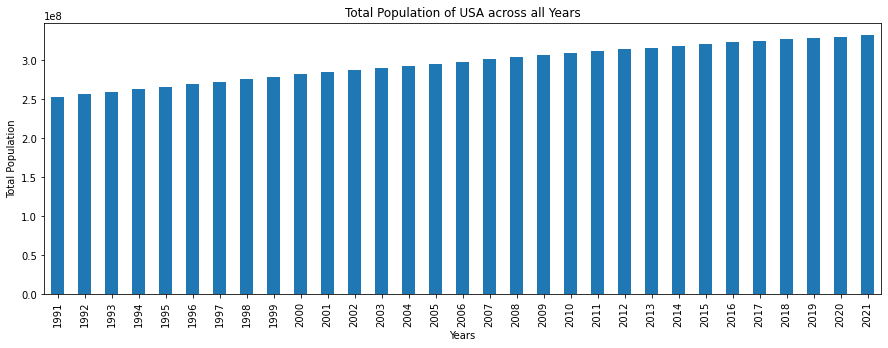

In [ ]:
ax = tot_df.plot(x='index', title='Total Population of USA across all Years', figsize=(15,5),
                                                      kind='bar', legend=False ,
                                                      rot=90)
ax.set_xlabel('Years')
ax.set_ylabel('Total Population')

So, if we normalize the data, it will not be different.

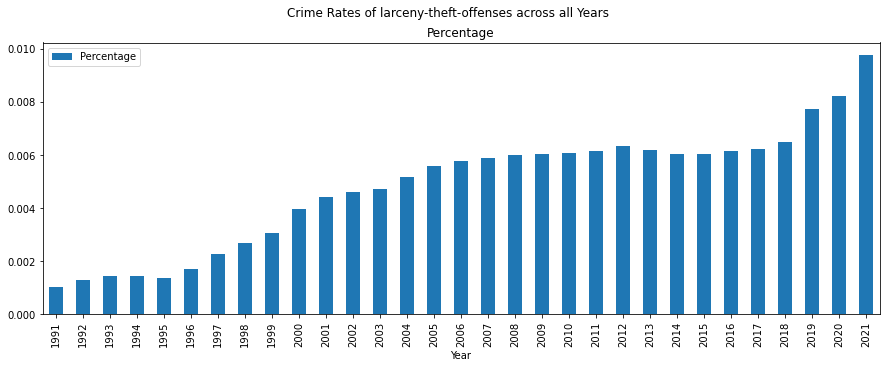

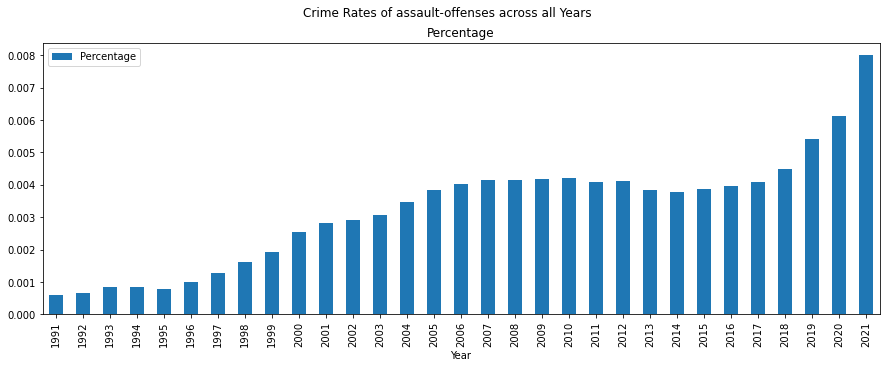

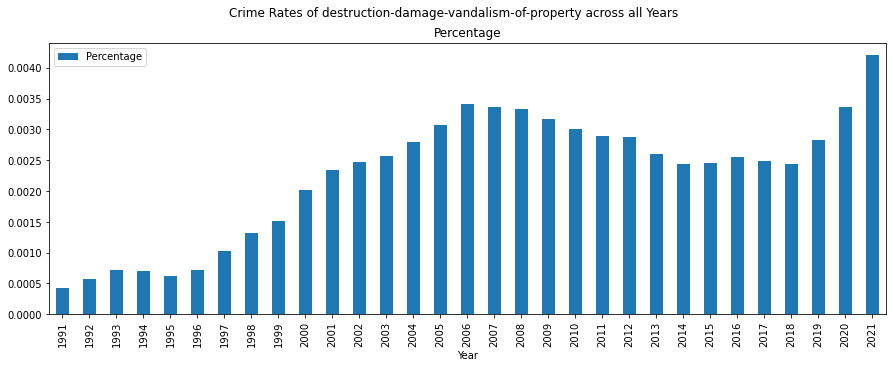

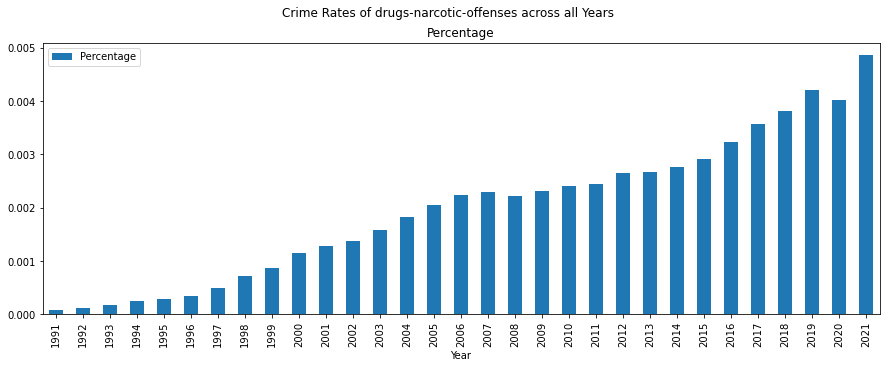

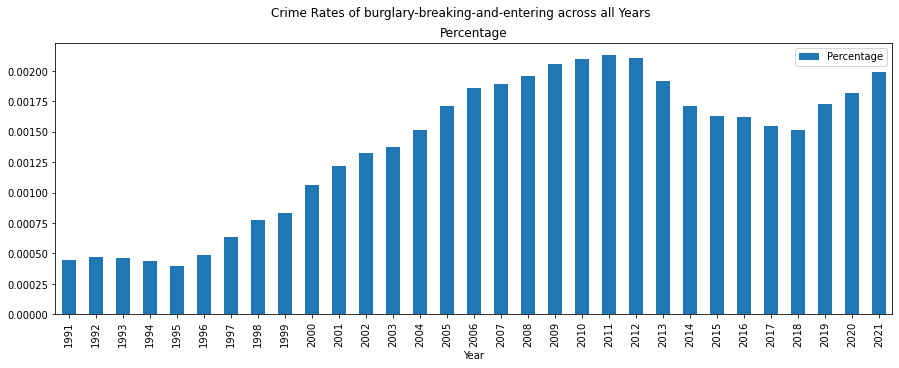

In [ ]:
for i in ["larceny-theft-offenses", "assault-offenses", "destruction-damage-vandalism-of-property", "drugs-narcotic-offenses","burglary-breaking-and-entering"]:
  plot2=crime_df[crime_df['Offense']==i].reset_index()
  plot2['Percentage'] = plot2['Count']/tot_df[0]
  ax = plot2[["Year","Percentage"]].plot(x='Year', kind='bar',  rot=90,title='Crime Rates of '+i+' across all Years',subplots=True,layout=(1,1), figsize=(15,5))

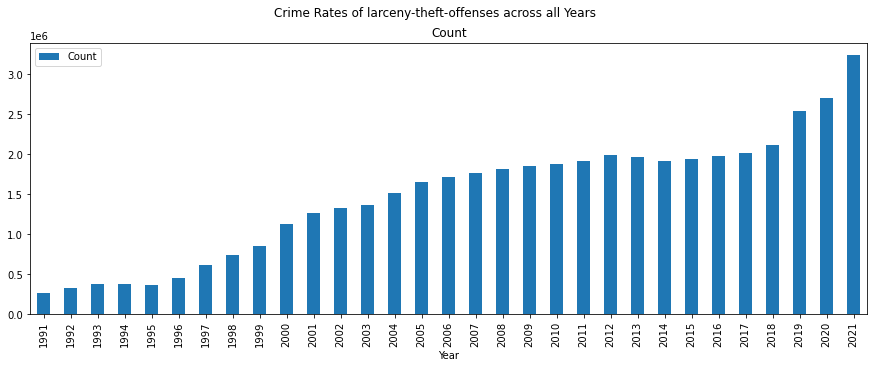

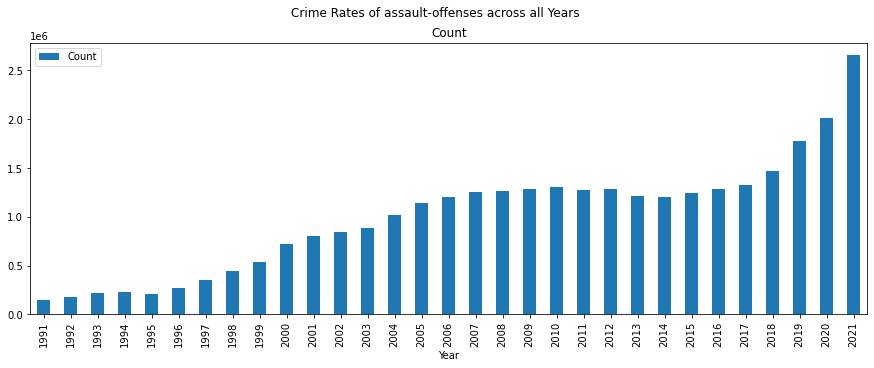

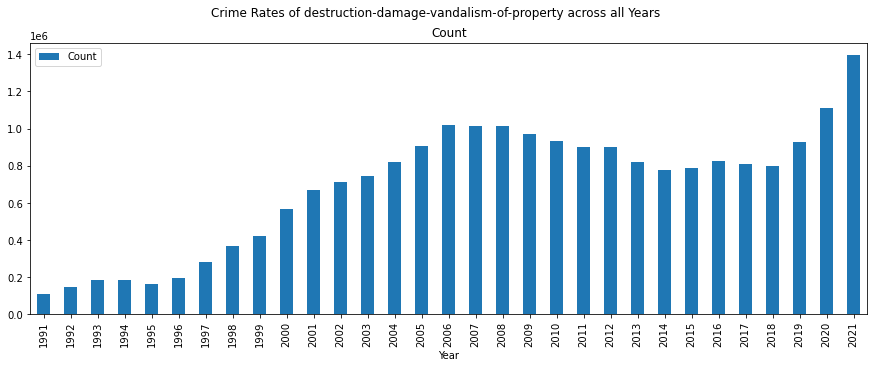

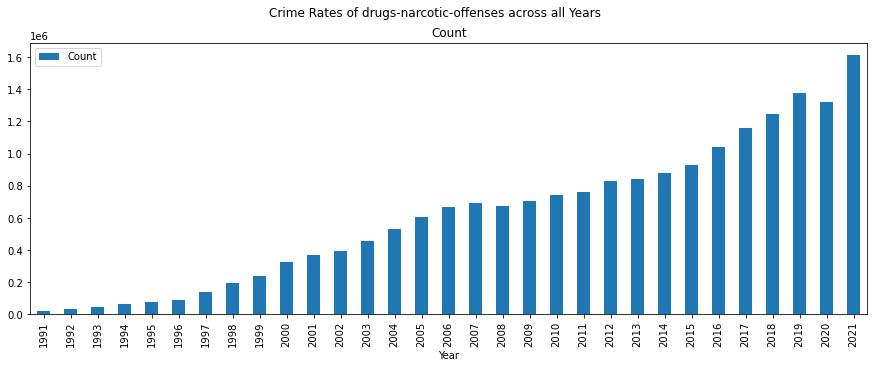

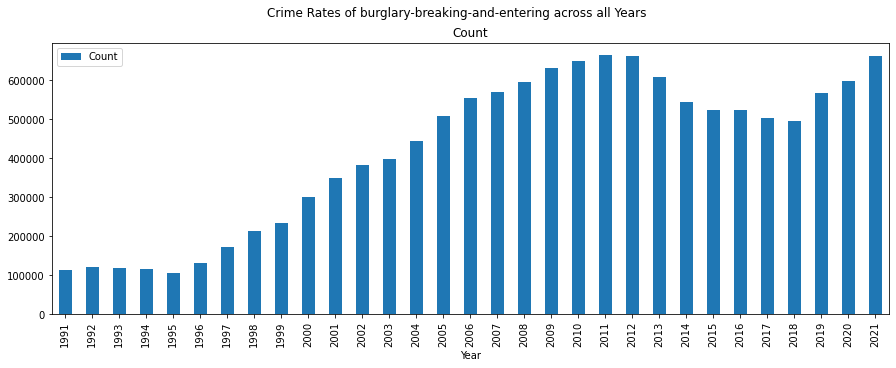

In [ ]:
for i in ["larceny-theft-offenses", "assault-offenses", "destruction-damage-vandalism-of-property", "drugs-narcotic-offenses","burglary-breaking-and-entering"]:
  plot2=crime_df[crime_df['Offense']==i]
  ax = plot2[["Year","Count"]].plot(x='Year', kind='bar',  rot=90,title='Crime Rates of '+i+' across all Years',subplots=True,layout=(1,1), figsize=(15,5))

The crime rates of the top 5 crime categories, which are "larceny-theft-offenses", "assault-offenses", "destruction-damage-vandalism-of-property", "drugs-narcotic-offenses", and "burglary-breaking-and-entering", are increasing along the time. However, some categories has reduced in the middle of 2010s except Drug/Narcotic Offenses. The normalization did not differ in the representation of the crime rates as the population increases approximately linearly.

## The average percentage of violent crimes relative to total crime per state over all available years

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stat/nibrs.csv',index_col=0)
violent_crimes = ['assault-offenses','homicide-offenses','robbery','kidnapping-abduction','sex-offenses']
violent_df = df[df['Offense'].isin(violent_crimes)]
violent_df.head()

Offense   State  Year  Count
1095  assault-offenses  Hawaii  2018   1364
1096  assault-offenses  Hawaii  2019   1413
1097  assault-offenses  Hawaii  2020   1364
1098  assault-offenses  Hawaii  2021   1505
1099  assault-offenses  Hawaii  2018   1384

In [ ]:
grouped_violent_df = violent_df.groupby(['Year','State'],group_keys=True,dropna=False).sum().reset_index()
grouped_violent_df

Year           State   Count
0    1991         Alabama   82561
1    1991        Illinois      15
2    1991    North Dakota    2639
3    1991  South Carolina   90211
4    1992         Alabama   70074
..    ...             ...     ...
906  2021        Virginia  104749
907  2021      Washington   87824
908  2021   West Virginia   14028
909  2021       Wisconsin   51590
910  2021         Wyoming    5993

[911 rows x 3 columns]

In [ ]:
grouped_df = df.groupby(['Year','State'],group_keys=True,dropna=False).sum().reset_index()
grouped_df

Year           State   Count
0    1991         Alabama  366716
1    1991        Illinois      55
2    1991            Iowa       3
3    1991    North Dakota   23216
4    1991  South Carolina  356592
..    ...             ...     ...
909  2021        Virginia  404851
910  2021      Washington  484832
911  2021   West Virginia   62891
912  2021       Wisconsin  268995
913  2021         Wyoming   23309

[914 rows x 3 columns]

As seen, there are some states that do not have violent crimes. Hence, we need to consider them in our calculations

In [ ]:
for i in range(len(grouped_df)):
  if (grouped_violent_df.iloc[i]['State'] != grouped_df.iloc[i]['State']):
    line = grouped_df[i:i+1]
    line['Count'] = 0
    grouped_violent_df = pd.concat([grouped_violent_df[:i], line, grouped_violent_df[i:]]).reset_index(drop=True)
grouped_violent_df

Year           State   Count
0    1991         Alabama   82561
1    1991        Illinois      15
2    1991            Iowa       0
3    1991    North Dakota    2639
4    1991  South Carolina   90211
..    ...             ...     ...
909  2021        Virginia  104749
910  2021      Washington   87824
911  2021   West Virginia   14028
912  2021       Wisconsin   51590
913  2021         Wyoming    5993

[914 rows x 3 columns]

In [ ]:
percentage = grouped_violent_df['Count']/grouped_df['Count']
percentage

0      0.225136
1      0.272727
2      0.000000
3      0.113672
4      0.252981
         ...   
909    0.258735
910    0.181143
911    0.223053
912    0.191788
913    0.257111
Name: Count, Length: 914, dtype: float64

In [ ]:
per_df = grouped_violent_df.copy()
per_df.rename(columns = {'Count':'Total Violent Crimes'}, inplace = True)
per_df['Total Crimes'] = grouped_df['Count']
per_df['Percentage'] = percentage
per_df

Year           State  Total Violent Crimes  Total Crimes  Percentage
0    1991         Alabama                 82561        366716    0.225136
1    1991        Illinois                    15            55    0.272727
2    1991            Iowa                     0             3    0.000000
3    1991    North Dakota                  2639         23216    0.113672
4    1991  South Carolina                 90211        356592    0.252981
..    ...             ...                   ...           ...         ...
909  2021        Virginia                104749        404851    0.258735
910  2021      Washington                 87824        484832    0.181143
911  2021   West Virginia                 14028         62891    0.223053
912  2021       Wisconsin                 51590        268995    0.191788
913  2021         Wyoming                  5993         23309    0.257111

[914 rows x 5 columns]

In [ ]:
per_df[per_df['State'] == 'Alabama'] 

Year    State  Total Violent Crimes  Total Crimes  Percentage
0    1991  Alabama                 82561        366716    0.225136
5    1992  Alabama                 70074        317517    0.220694
271  2006  Alabama                  1081          6184    0.174806
307  2007  Alabama                  1106          5941    0.186164
343  2008  Alabama                  1069          5512    0.193940
380  2009  Alabama                   983          5198    0.189111
417  2010  Alabama                  1029          4948    0.207963
454  2011  Alabama                   885          4894    0.180834
491  2012  Alabama                  1003          4853    0.206676
529  2013  Alabama                   844          5137    0.164298
568  2014  Alabama                   847          4542    0.186482
607  2015  Alabama                   933          5173    0.180360
646  2016  Alabama                   954          3689    0.258607
686  2017  Alabama                   836          3779    0.221223
726  2018  Alabama                   589          3116    0.189024
769  2019  Alabama                   911          4893    0.186184
816  2020  Alabama                  4517         17354    0.260286
863  2021  Alabama                 74290        243275    0.305375

In [ ]:
per_final_df = per_df.groupby('State',group_keys=True,dropna=False).mean().reset_index()
per_final_df

State         Year  Total Violent Crimes   Total Crimes  \
0                Alabama  2011.055556          13584.000000   56262.277778   
1                 Alaska  2021.000000           6352.000000   16285.000000   
2                Arizona  2012.500000           6061.277778   33226.333333   
3               Arkansas  2010.000000          46468.260870  193572.565217   
4             California  2021.000000          36281.000000  154575.000000   
5               Colorado  2007.285714          41832.214286  260301.964286   
6            Connecticut  2009.500000          23888.541667  105343.250000   
7               Delaware  2011.000000          24118.095238  102959.809524   
8   District of Columbia  2010.500000           2212.772727    5962.818182   
9                Florida  2021.000000            466.000000    1669.000000   
10               Georgia  2012.000000          28216.222222  105935.222222   
11                Hawaii  2019.500000          11629.500000   52541.750000   
12                 Idaho  2006.500000          18626.900000   97537.000000   
13              Illinois  2006.000000          12513.419355   46501.225806   
14               Indiana  2017.000000          19653.666667   78933.111111   
15                  Iowa  2006.000000          31190.903226  171898.354839   
16                Kansas  2010.500000          42848.500000  192085.227273   
17              Kentucky  2009.500000          23338.708333  131106.458333   
18             Louisiana  2012.000000          15557.631579   59923.473684   
19                 Maine  2012.000000           4242.368421   18699.842105   
20              Maryland  2018.500000          11226.166667   52228.833333   
21         Massachusetts  2007.500000          54925.785714  219672.928571   
22              Michigan  2008.000000         158202.111111  600194.481481   
23             Minnesota  2007.962963           4602.074074   24139.185185   
24           Mississippi  2015.000000           7878.538462   33731.692308   
25              Missouri  2013.500000          22866.750000  100213.062500   
26               Montana  2013.000000          12177.941176   65373.352941   
27              Nebraska  2009.500000           7392.333333   39773.500000   
28                Nevada  2020.000000          33591.666667  111351.000000   
29         New Hampshire  2011.500000          15871.800000   65926.150000   
30            New Jersey  2021.000000          19768.000000   80363.000000   
31            New Mexico  2019.500000          24932.500000  100697.000000   
32              New York  2020.000000          17727.666667   64972.000000   
33        North Carolina  2020.000000         139191.000000  647311.666667   
34          North Dakota  2006.000000           6712.548387   38766.258065   
35                  Ohio  2009.500000         135280.500000  524668.291667   
36              Oklahoma  2014.500000          21637.214286   98945.071429   
37                Oregon  2012.000000          22466.684211  146658.526316   
38          Pennsylvania  2016.500000           5076.600000   19230.300000   
39          Rhode Island  2012.500000          10742.888889   52332.333333   
40        South Carolina  2006.000000         120225.709677  444347.903226   
41          South Dakota  2010.500000           7606.818182   38429.590909   
42             Tennessee  2009.000000         154037.760000  573563.360000   
43                 Texas  2009.000000          97946.560000  407737.440000   
44                  Utah  2007.000000          26781.241379  167128.724138   
45               Vermont  2007.000000           3346.586207   23138.586207   
46              Virginia  2007.500000         100958.178571  443078.785714   
47            Washington  2013.000000          52773.235294  300418.764706   
48         West Virginia  2009.500000          20912.750000   87930.916667   
49             Wisconsin  2012.500000          32547.944444  154406.777778   
50               Wyoming  2020.000000    

Text(0, 0.5, 'Violent Crimes Percentage')

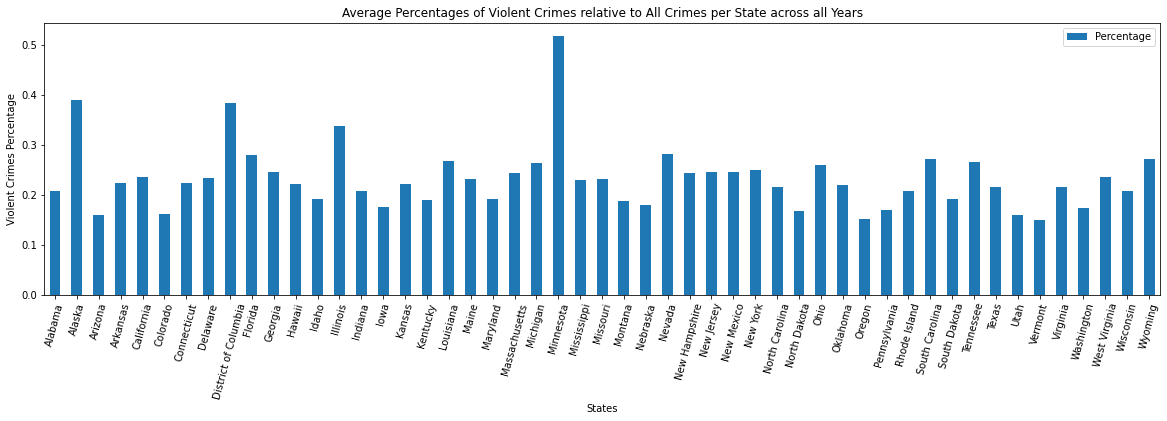

In [ ]:
ax = per_final_df[["State","Percentage"]].plot(x='State', title='Average Percentages of Violent Crimes relative to All Crimes per State across all Years', figsize=(20,5), kind='bar',  rot=75)
ax.set_xlabel('States')
ax.set_ylabel('Violent Crimes Percentage')

The average percentage of violent crimes over all years relative to all crime rates shows that the highest state in violent crimes is Minnesota of 50% while the lowest is Vermont. 

## National homicide rates, as well as total violent crime rates per year over all years

In [ ]:
violent_crimes = ['assault-offenses','homicide-offenses','robbery','kidnapping-abduction','sex-offenses']
violent_df = combined_df[combined_df['Offense'].isin(violent_crimes)]
violent_df

Offense                 State  Year  Count
1095   assault-offenses                Hawaii  2018   1364
1096   assault-offenses                Hawaii  2019   1413
1097   assault-offenses                Hawaii  2020   1364
1098   assault-offenses                Hawaii  2021   1505
1099   assault-offenses                Hawaii  2018   1384
...                 ...                   ...   ...    ...
34537      sex-offenses  District of Columbia  2010      2
34538      sex-offenses  District of Columbia  2016      2
34539      sex-offenses  District of Columbia  2017      1
34540      sex-offenses  District of Columbia  2018      1
34541      sex-offenses  District of Columbia  2021     15

[9858 rows x 4 columns]

In [ ]:
violent_df = violent_df[['Offense','Year','Count']].groupby('Year',group_keys=True,dropna=False).sum().reset_index()
violent_df

Year    Count
0   1991   175426
1   1992   201547
2   1993   249407
3   1994   258630
4   1995   231502
5   1996   301767
6   1997   396735
7   1998   507551
8   1999   610745
9   2000   821032
10  2001   923399
11  2002   968475
12  2003  1021354
13  2004  1169141
14  2005  1330863
15  2006  1415584
16  2007  1475712
17  2008  1483731
18  2009  1510214
19  2010  1522923
20  2011  1487574
21  2012  1511709
22  2013  1431238
23  2014  1410363
24  2015  1461609
25  2016  1514179
26  2017  1567245
27  2018  1739111
28  2019  2096156
29  2020  2351631
30  2021  3066716

In [ ]:
homicide_df = combined_df[combined_df['Offense'] =='homicide-offenses'].groupby(['Year'],group_keys=True,dropna=False).sum().reset_index()
homicide_df

Year  Count
0   1991   1208
1   1992    990
2   1993    946
3   1994    957
4   1995    710
5   1996    934
6   1997   1163
7   1998   1468
8   1999   1722
9   2000   2362
10  2001   2697
11  2002   2785
12  2003   2960
13  2004   3272
14  2005   4633
15  2006   4947
16  2007   5076
17  2008   4646
18  2009   4961
19  2010   5008
20  2011   5137
21  2012   5294
22  2013   5159
23  2014   5382
24  2015   6135
25  2016   6829
26  2017   7588
27  2018   7871
28  2019  10442
29  2020  14803
30  2021  19929

In [ ]:
rate_df = violent_df.copy()
rate_df.rename(columns = {'Count':'Total Violent Crimes'}, inplace = True)
rate_df['Total Homicide Offenses'] = homicide_df['Count']
rate_df

Year  Total Violent Crimes  Total Homicide Offenses
0   1991                175426                     1208
1   1992                201547                      990
2   1993                249407                      946
3   1994                258630                      957
4   1995                231502                      710
5   1996                301767                      934
6   1997                396735                     1163
7   1998                507551                     1468
8   1999                610745                     1722
9   2000                821032                     2362
10  2001                923399                     2697
11  2002                968475                     2785
12  2003               1021354                     2960
13  2004               1169141                     3272
14  2005               1330863                     4633
15  2006               1415584                     4947
16  2007               1475712                     5076
17  2008               1483731                     4646
18  2009               1510214                     4961
19  2010               1522923                     5008
20  2011               1487574                     5137
21  2012               1511709                     5294
22  2013               1431238                     5159
23  2014               1410363                     5382
24  2015               1461609                     6135
25  2016               1514179                     6829
26  2017               1567245                     7588
27  2018               1739111                     7871
28  2019               2096156                    10442
29  2020               2351631                    14803
30  2021               3066716                    19929

So, the data needs to be normalized as it is unbalanced.

In [ ]:
total = combined_df[['Year','Count']].groupby('Year').sum().reset_index()
total = total.rename(columns={'Count':'Total Crimes'})
total

Year  Total Crimes
0   1991        746582
1   1992        910599
2   1993       1048726
3   1994       1089774
4   1995       1024443
5   1996       1287847
6   1997       1776833
7   1998       2251732
8   1999       2620490
9   2000       3506328
10  2001       4026308
11  2002       4277483
12  2003       4516677
13  2004       5098676
14  2005       5750763
15  2006       6152264
16  2007       6312720
17  2008       6360344
18  2009       6420810
19  2010       6458555
20  2011       6470367
21  2012       6696959
22  2013       6464367
23  2014       6377487
24  2015       6567582
25  2016       6918300
26  2017       7148434
27  2018       7582767
28  2019       8924922
29  2020       9795119
30  2021      12102249

In [ ]:
rate_df['Total Violent Crimes'] = rate_df['Total Violent Crimes']/total['Total Crimes']
rate_df['Total Homicide Offenses'] = rate_df['Total Homicide Offenses']/total['Total Crimes']
rate_df

Year  Total Violent Crimes  Total Homicide Offenses
0   1991              0.234972                 0.001618
1   1992              0.221335                 0.001087
2   1993              0.237819                 0.000902
3   1994              0.237324                 0.000878
4   1995              0.225978                 0.000693
5   1996              0.234319                 0.000725
6   1997              0.223282                 0.000655
7   1998              0.225405                 0.000652
8   1999              0.233065                 0.000657
9   2000              0.234157                 0.000674
10  2001              0.229341                 0.000670
11  2002              0.226412                 0.000651
12  2003              0.226130                 0.000655
13  2004              0.229303                 0.000642
14  2005              0.231424                 0.000806
15  2006              0.230092                 0.000804
16  2007              0.233768                 0.000804
17  2008              0.233278                 0.000730
18  2009              0.235206                 0.000773
19  2010              0.235799                 0.000775
20  2011              0.229906                 0.000794
21  2012              0.225731                 0.000791
22  2013              0.221404                 0.000798
23  2014              0.221147                 0.000844
24  2015              0.222549                 0.000934
25  2016              0.218866                 0.000987
26  2017              0.219243                 0.001061
27  2018              0.229350                 0.001038
28  2019              0.234865                 0.001170
29  2020              0.240082                 0.001511
30  2021              0.253401                 0.001647

Text(0, 0.5, 'Total Homicide Offenses Percentage relative to Total Crimes')

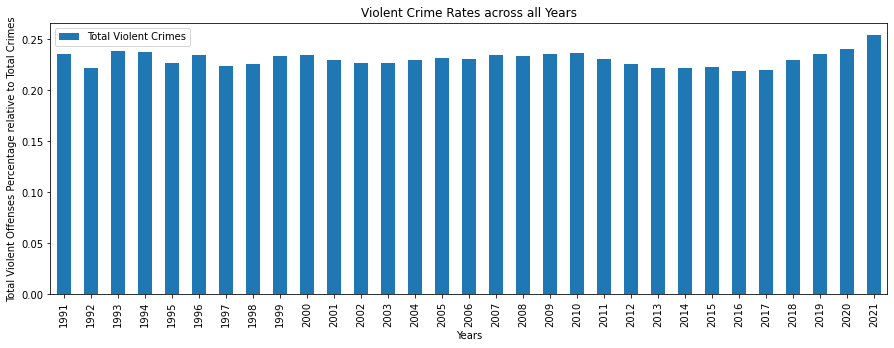

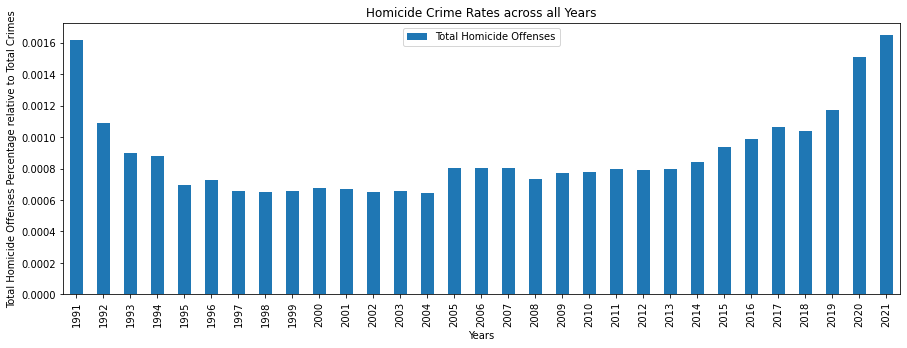

In [ ]:
ax1 = rate_df[["Year","Total Violent Crimes"]].plot(x='Year', title='Violent Crime Rates across all Years', figsize=(15,5),
                                                      kind='bar', 
                                                      rot=90)
ax2 = rate_df[["Year","Total Homicide Offenses"]].plot(x='Year', title='Homicide Crime Rates across all Years', figsize=(15,5),
                                                      kind='bar', 
                                                      rot=90)
ax1.set_xlabel('Years')
ax1.set_ylabel('Total Violent Offenses Percentage relative to Total Crimes')
ax2.set_xlabel('Years')
ax2.set_ylabel('Total Homicide Offenses Percentage relative to Total Crimes')

National homicide rates has been decreasing starting from 1991 till 1997, then it remained approximately constant till 2005. Then, it started to increase till it reached its maximum at 2021. However, the violent crime rates oscillated between 20%-25% along 30 years, which seems to be approximately constant as it has a little change along years.

## The frequency of non-fatal crime incidents in relation to victim demographics

In [ ]:
preprocessed_data2['totalcounts']=np.zeros(len(preprocessed_data2))
total_counts=preprocessed_data2.groupby(['race_ethnicity','age','sex'],group_keys=True).count().reset_index()
total_counts=total_counts[['race_ethnicity','age','sex','totalcounts']]
total_counts

preprocessed_data['counts']=np.zeros(len(preprocessed_data))
preprocessed_data['totalcounts']=np.zeros(len(preprocessed_data))
preprocessed_data['rates']=np.zeros(len(preprocessed_data))
req_4111=preprocessed_data.groupby(['race_ethnicity','age','sex'],group_keys=True).count().reset_index()
req_4111['totalcounts']=total_counts['totalcounts']
req_4111=req_4111[['age','sex','race_ethnicity','counts','totalcounts','rates']]
req_4111['rates']=req_4111['counts']/req_4111['totalcounts']
req_4111=req_4111.sort_values(by='rates',ascending=False).reset_index()

req_4111.to_csv('/content/drive/MyDrive/req_4111.csv')
req_4111

index          age     sex  \
0      50        18-24  female   
1      52        25-34  female   
2      57        50-64    male   
3      54        35-49  female   
4      55        35-49    male   
..    ...          ...     ...   
67     46  65 or older  female   
68     71  65 or older    male   
69     34  65 or older  female   
70     70  65 or older  female   
71     35  65 or older    male   

                                       race_ethnicity  counts  totalcounts  \
0                        Non-Hispanic-morethanonerace     102          197   
1                        Non-Hispanic-morethanonerace     125          261   
2                        Non-Hispanic-morethanonerace      97          223   
3                        Non-Hispanic-morethanonerace     133          350   
4                        Non-Hispanic-morethanonerace     104          280   
..                                                ...     ...          ...   
67                                 Non-Hispanic-black     153         8909   
68                                 Non-Hispanic-white     920        59488   
69  Non-Hispanic-Asian/NativeHawaiian/OtherPacific...      29         2252   
70                                 Non-Hispanic-white     969        81288   
71  Non-Hispanic-Asian/NativeHawaiian/OtherPacific...      17         1713   

       rates  
0   0.517766  
1   0.478927  
2   0.434978  
3   0.380000  
4   0.371429  
..       ...  
67  0.017174  
68  0.015465  
69  0.012877  
70  0.011921  
71  0.009924  

[72 rows x 7 columns]

In [ ]:
data={'demographic':req_4111['age']+req_4111['sex']+req_4111['race_ethnicity'],'rates':req_4111['rates']}
df = pd.DataFrame(data=data)
df

demographic     rates
0             18-24femaleNon-Hispanic-morethanonerace  0.517766
1             25-34femaleNon-Hispanic-morethanonerace  0.478927
2               50-64maleNon-Hispanic-morethanonerace  0.434978
3             35-49femaleNon-Hispanic-morethanonerace  0.380000
4               35-49maleNon-Hispanic-morethanonerace  0.371429
..                                                ...       ...
67                65 or olderfemaleNon-Hispanic-black  0.017174
68                  65 or oldermaleNon-Hispanic-white  0.015465
69  65 or olderfemaleNon-Hispanic-Asian/NativeHawa...  0.012877
70                65 or olderfemaleNon-Hispanic-white  0.011921
71  65 or oldermaleNon-Hispanic-Asian/NativeHawaii...  0.009924

[72 rows x 2 columns]

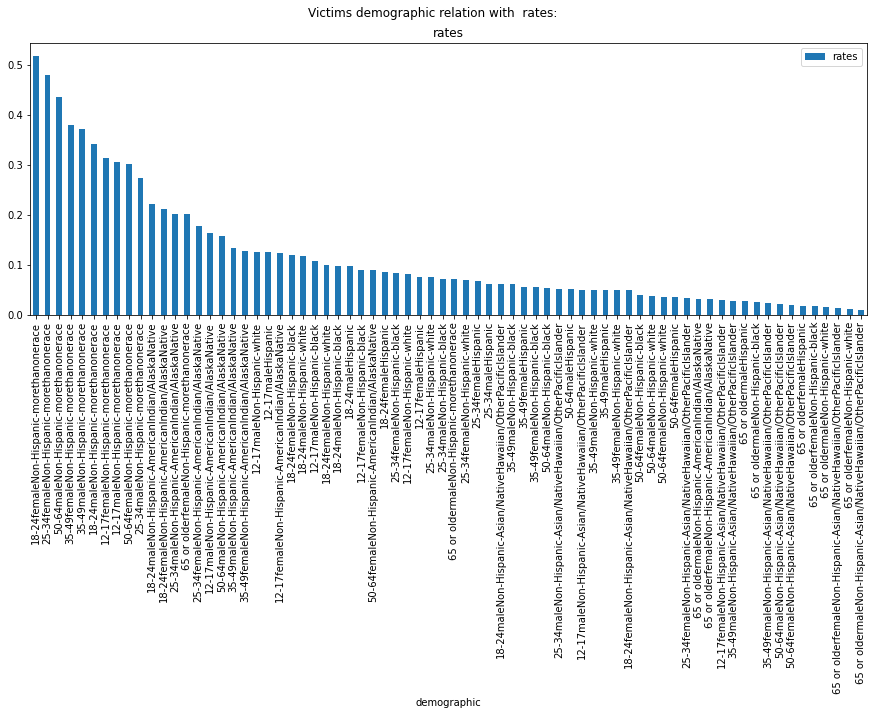

In [ ]:
ax = df[["demographic","rates"]].plot(x='demographic', kind='bar',  rot=90,title='Victims demographic relation with  rates: ',subplots=True,layout=(1,1),figsize=(15,5))

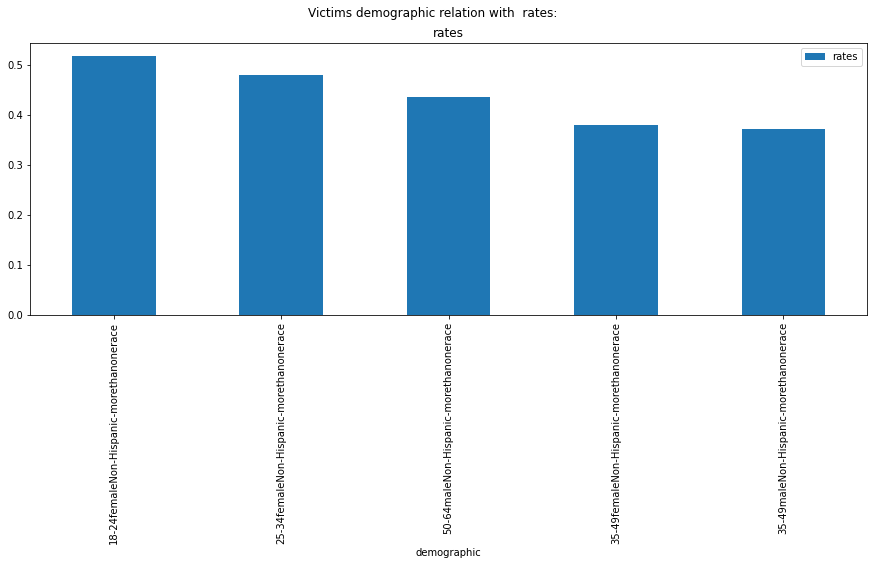

In [ ]:
ax = df[["demographic","rates"]][0:5].plot(x='demographic', kind='bar',  rot=90,title='Victims demographic relation with  rates: ',subplots=True,layout=(1,1),figsize=(15,5))

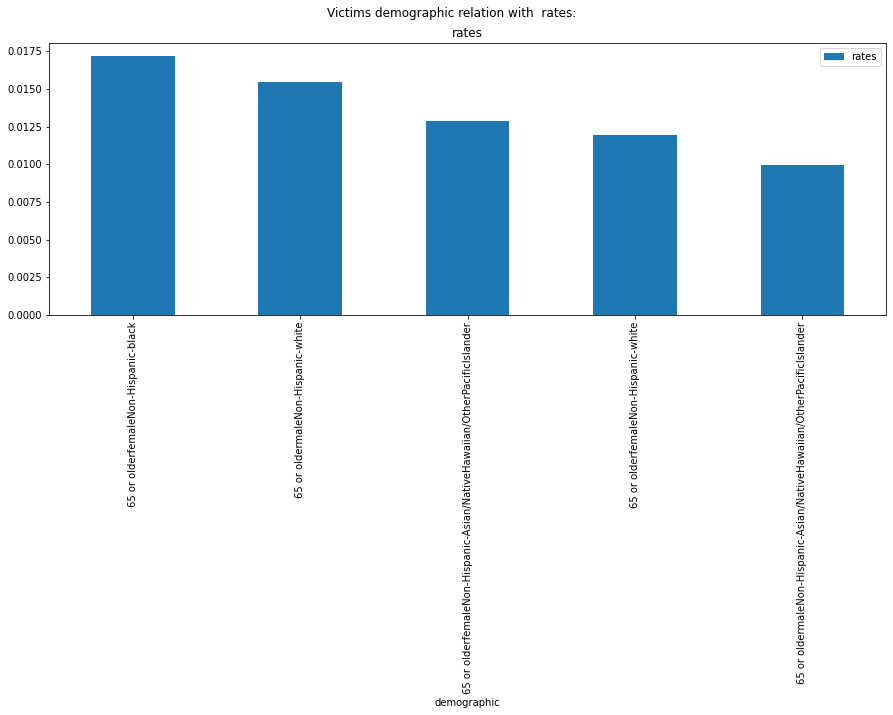

In [ ]:
ax = df[["demographic","rates"]][-5:].plot(x='demographic', kind='bar',  rot=90,title='Victims demographic relation with  rates: ',subplots=True,layout=(1,1),figsize=(15,5))

It is apparent that non Hispanic with more than one race are the most targeted victims (females 18-49 years, and males 25-49) and the lowest targeted victims are older than 65 years non Haspanic males and females of different races (black,white,Asian).

Here, are some combinations and relationships between variables

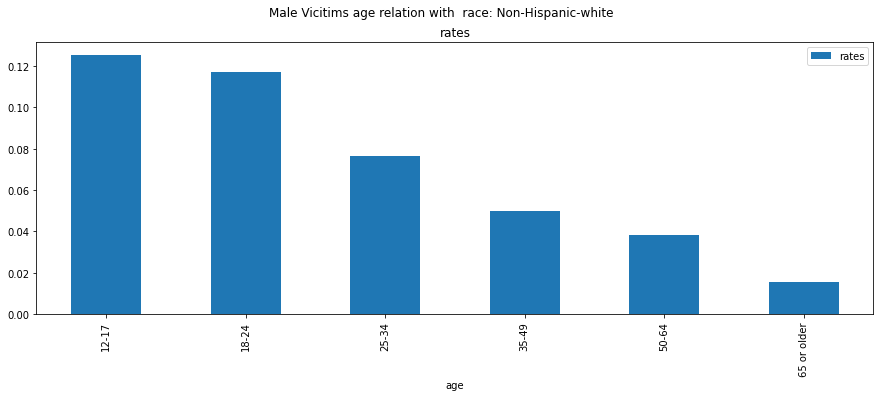

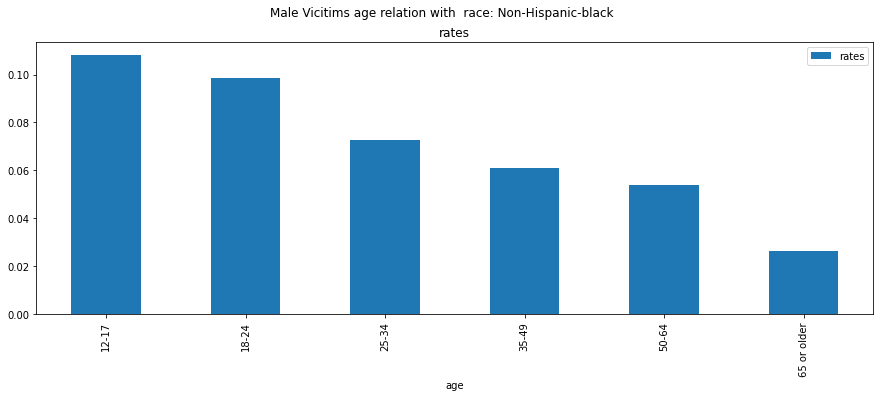

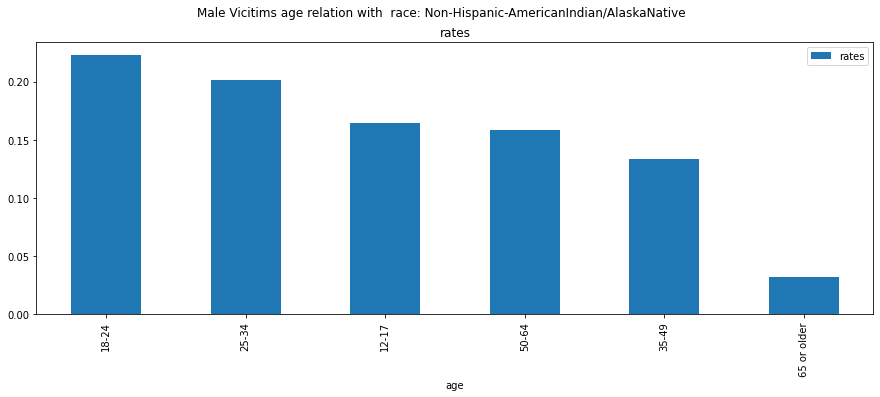

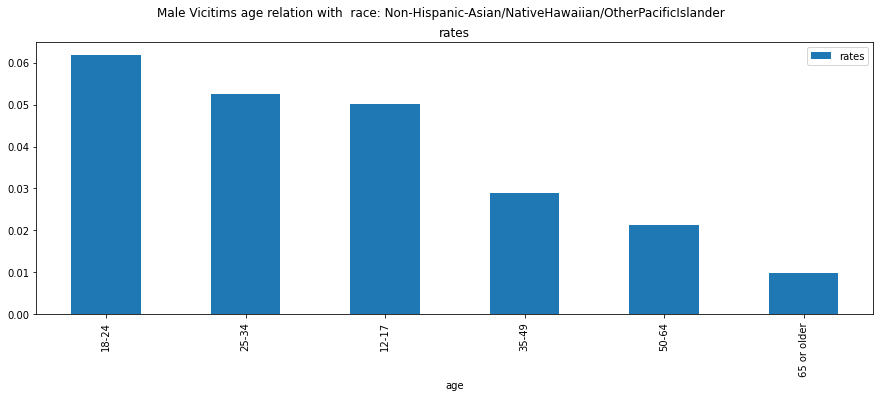

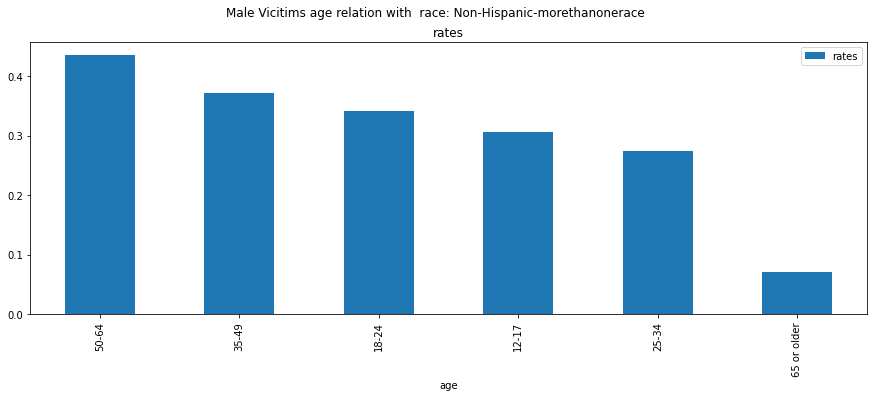

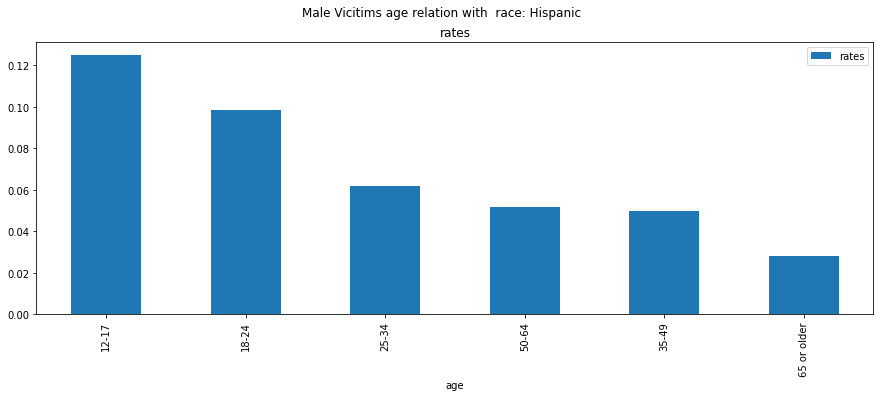

In [ ]:
for i in ['Non-Hispanic-white', 'Non-Hispanic-black', 'Non-Hispanic-AmericanIndian/AlaskaNative','Non-Hispanic-Asian/NativeHawaiian/OtherPacificIslander','Non-Hispanic-morethanonerace','Hispanic']:
  plot2=req_4111[req_4111['race_ethnicity']==i]
  plot2=plot2[plot2['sex']=='male']
  ax = plot2[["age","rates"]].plot(x='age', kind='bar',  rot=90,title='Male Vicitims age relation with  race: '+i,subplots=True,layout=(1,1),figsize=(15,5))

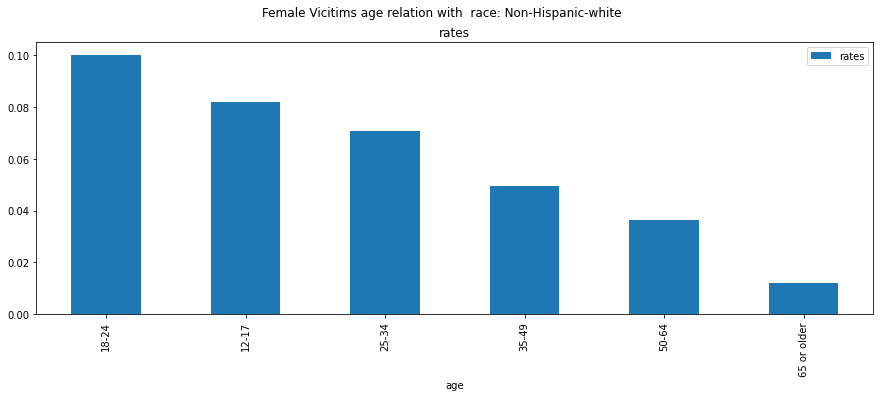

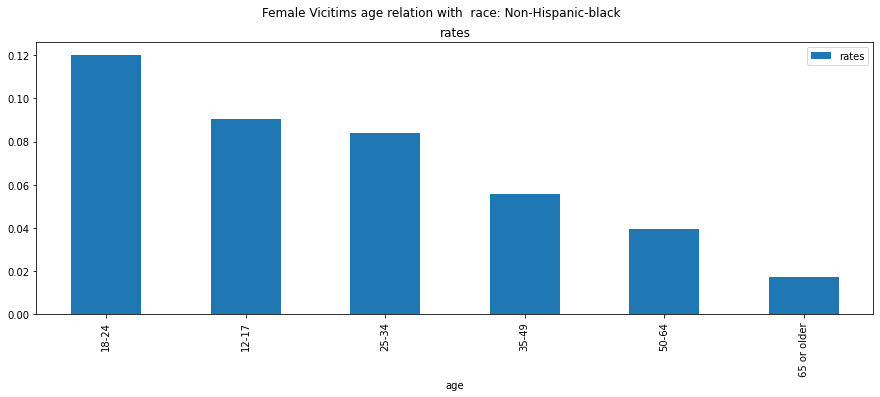

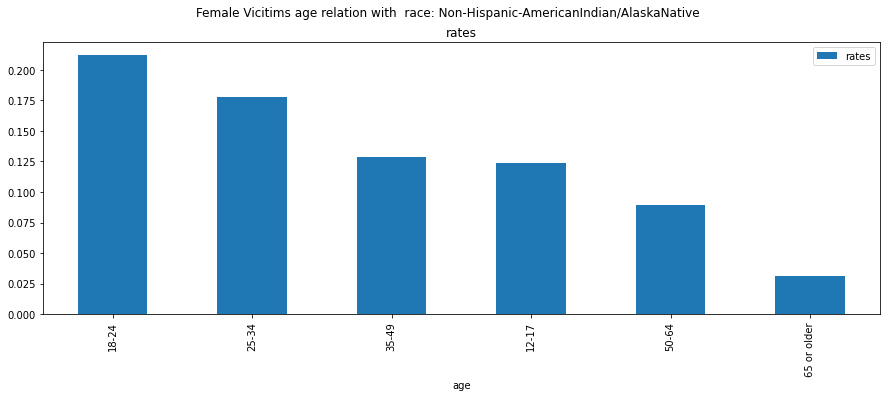

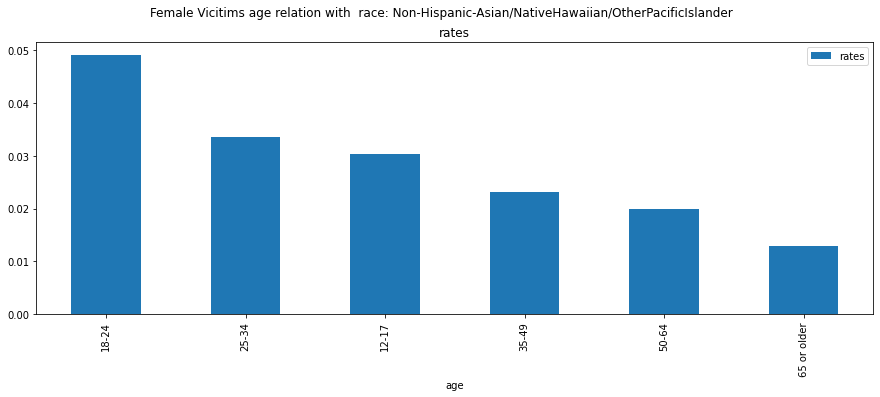

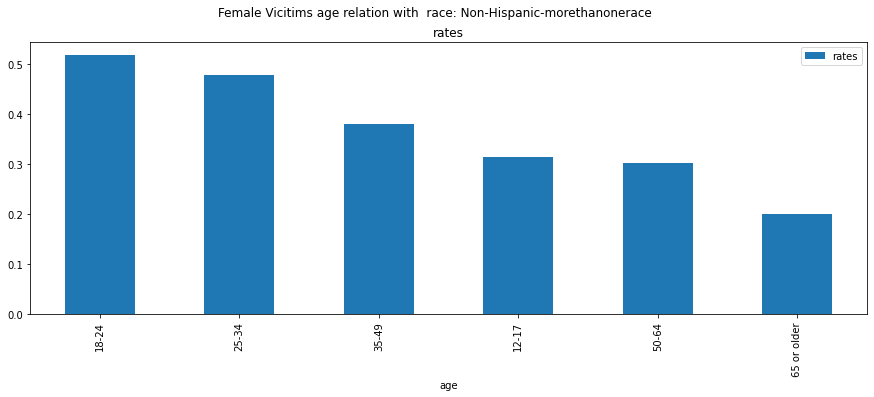

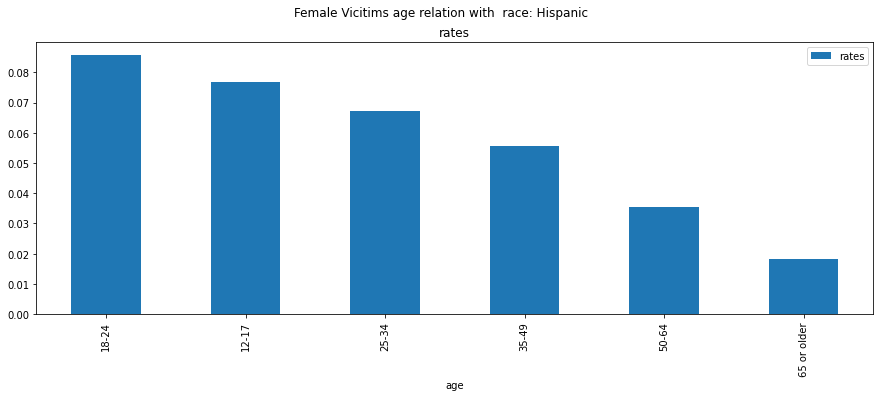

In [ ]:
import matplotlib.pyplot as plt
for i in ['Non-Hispanic-white', 'Non-Hispanic-black', 'Non-Hispanic-AmericanIndian/AlaskaNative','Non-Hispanic-Asian/NativeHawaiian/OtherPacificIslander','Non-Hispanic-morethanonerace','Hispanic']:
  plot2=req_4111[req_4111['race_ethnicity']==i]
  plot2=plot2[plot2['sex']=='female']
  ax = plot2[["age","rates"]].plot(x='age', kind='bar',  rot=90,title='Female Vicitims age relation with  race: '+i,subplots=True,layout=(1,1),figsize=(15,5))

## The frequency of non-fatal crime incidents in relation to offender demographics

In [ ]:
preprocessed_data['counts']=np.zeros(len(preprocessed_data))
preprocessed_data['sum']=np.zeros(len(preprocessed_data))
preprocessed_data['rates']=np.zeros(len(preprocessed_data))

req_5111=preprocessed_data.groupby(['offtracenew','offenderage','offendersex'],group_keys=True).count().reset_index()
req_5111=req_5111[['offtracenew','offenderage','offendersex','counts','sum','rates']]
male_sum=req_5111[req_5111['offendersex']=='Male']['sum'].sum()
female_sum=req_5111[req_5111['offendersex']=='Female']['sum'].sum()
req_5111['rates']=req_5111['counts']/req_5111['counts'].sum()
req_5111['rates']=req_5111['counts']/req_5111['counts'].sum()
req_5111

offtracenew                         offenderage  \
0                   Hispanic                       11 or younger   
1                   Hispanic                       11 or younger   
2                   Hispanic                               12-17   
3                   Hispanic                               12-17   
4                   Hispanic                               12-17   
..                       ...                                 ...   
165  Unknown race/ ethnicity  Multiple offenders of various ages   
166  Unknown race/ ethnicity                             Residue   
167  Unknown race/ ethnicity                             Residue   
168  Unknown race/ ethnicity                             Residue   
169  Unknown race/ ethnicity                             Residue   

                        offendersex  counts  sum     rates  
0                            Female       4    4  0.000063  
1                              Male      32   32  0.000504  
2    Both male and female offenders      11   11  0.000173  
3                            Female      74   74  0.001166  
4                              Male     197  197  0.003104  
..                              ...     ...  ...       ...  
165                         Unknown       4    4  0.000063  
166  Both male and female offenders      23   23  0.000362  
167                          Female     143  143  0.002253  
168                            Male     648  648  0.010210  
169                         Unknown     461  461  0.007264  

[170 rows x 6 columns]

In [ ]:
data={'demographic':req_5111['offenderage']+req_5111['offendersex']+req_5111['offtracenew'],'rates':req_5111['rates']}
df2 = pd.DataFrame(data=data)
df2=df2.sort_values('rates')
df2

demographic     rates
45      11 or youngerMaleMixed race group of offenders  0.000016
83   Multiple offenders of various agesFemaleNon-Hi...  0.000016
85   ResidueFemaleNon-Hispanic Asian/ Native Hawaii...  0.000016
69   Multiple offenders of various agesBoth male an...  0.000016
87   ResidueUnknownNon-Hispanic Asian/ Native Hawai...  0.000016
..                                                 ...       ...
38   Multiple offenders of various agesMaleInvalid ...  0.043095
132                  30 or olderMaleNon-Hispanic white  0.058646
26                      12-17MaleInvalid until 2012 Q1  0.098086
30                      18-29MaleInvalid until 2012 Q1  0.179374
34                30 or olderMaleInvalid until 2012 Q1  0.182652

[170 rows x 2 columns]

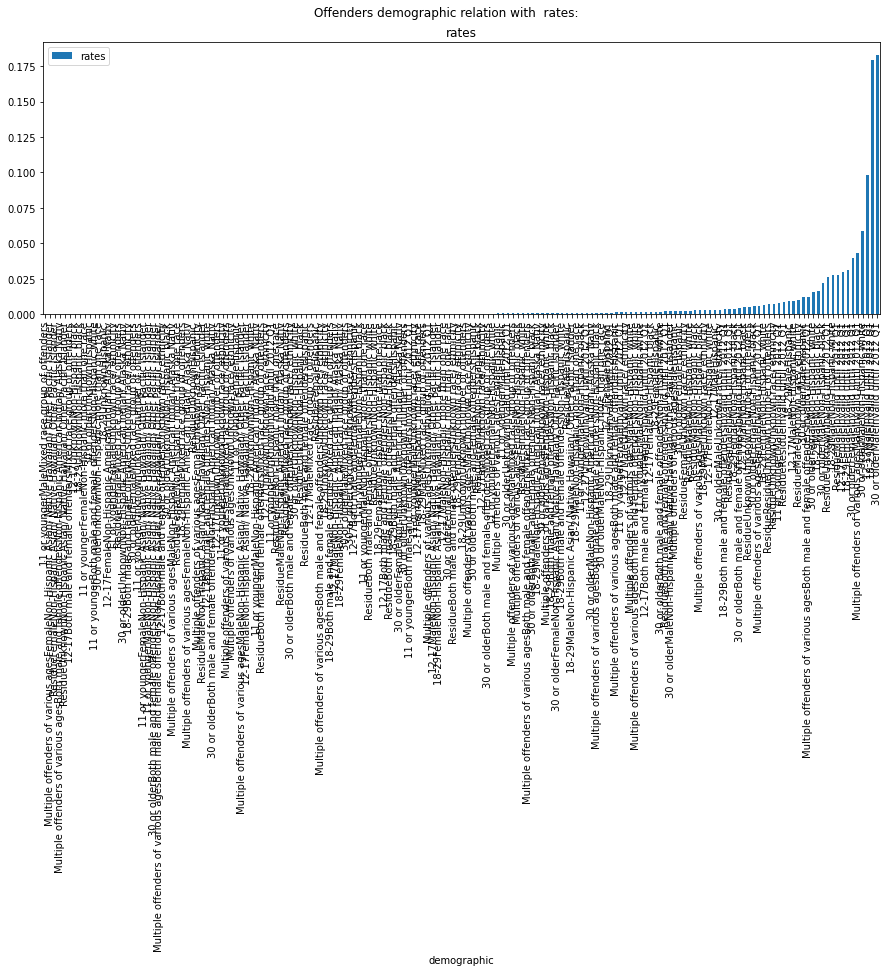

In [ ]:
ax = df2[["demographic","rates"]].plot(x='demographic', kind='bar',  rot=90,title='Offenders demographic relation with  rates: ',subplots=True,layout=(1,1),figsize=(15,5))

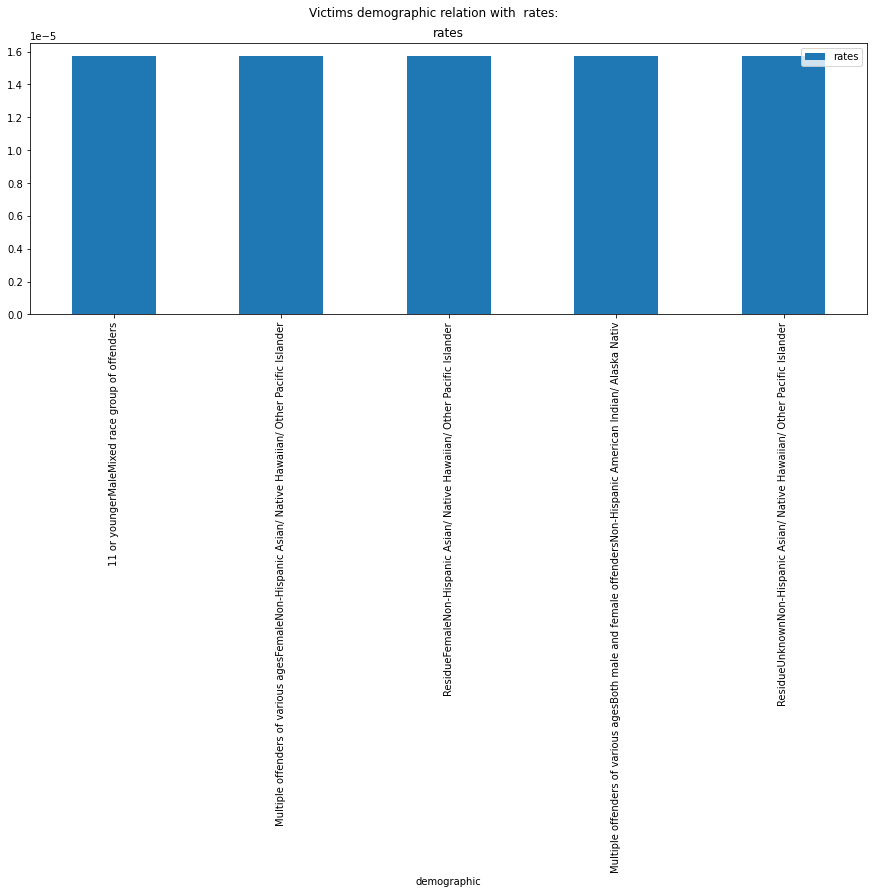

In [ ]:
ax = df2[["demographic","rates"]][0:5].plot(x='demographic', kind='bar',  rot=90,title='Victims demographic relation with  rates: ',subplots=True,layout=(1,1),figsize=(15,5))

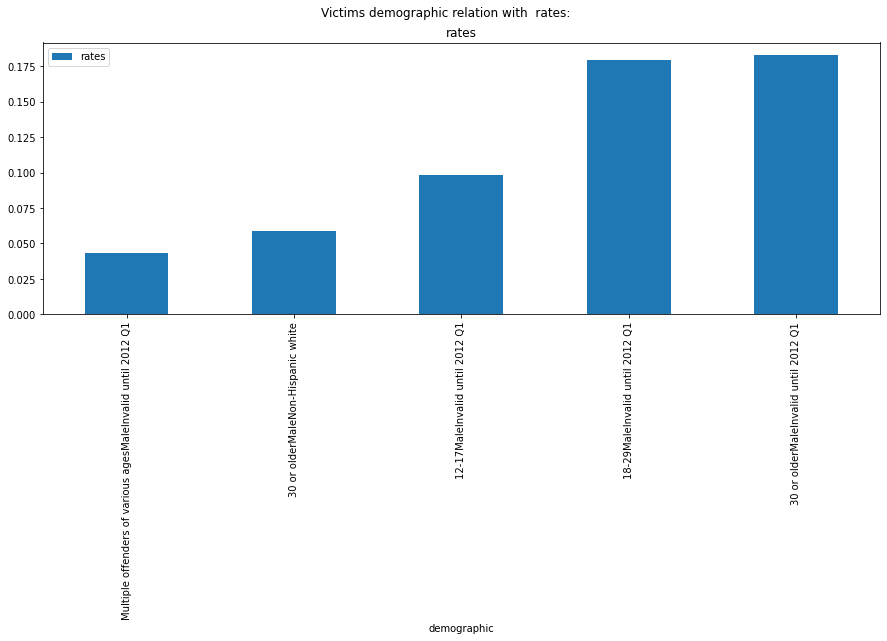

In [ ]:
ax = df2[["demographic","rates"]][-5:].plot(x='demographic', kind='bar',  rot=90,title='Victims demographic relation with  rates: ',subplots=True,layout=(1,1),figsize=(15,5))

It is apparent that non Hispanic with more than one race are the most targeted offenders (females 18-49 years, and males 25-49) and the lowest targeted victims are older than 65 years non Haspanic males and females of different races (black,white,Asian).

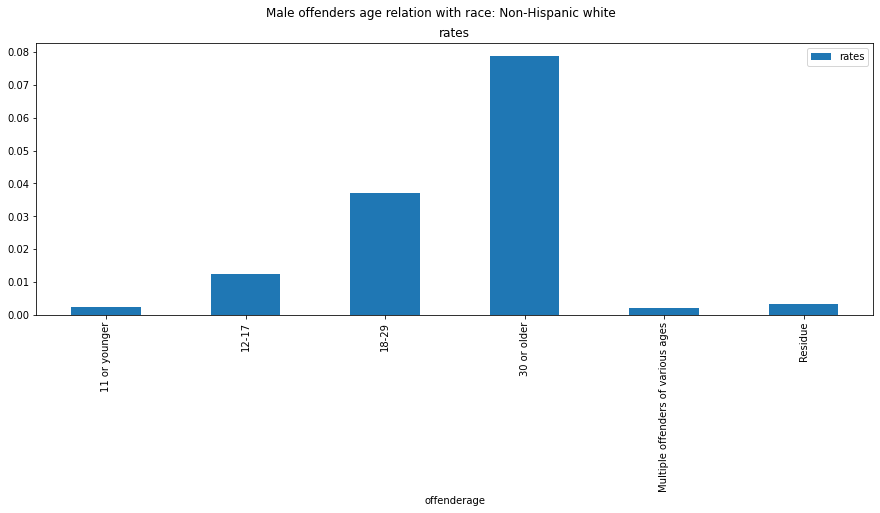

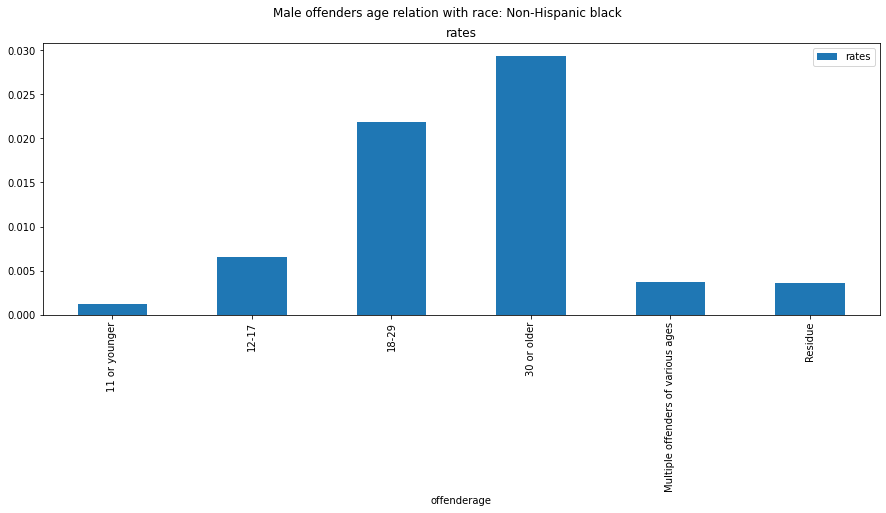

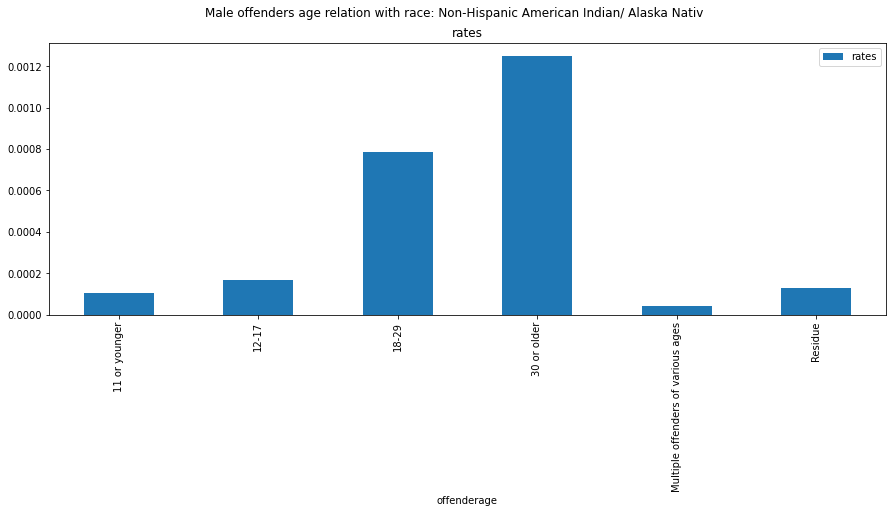

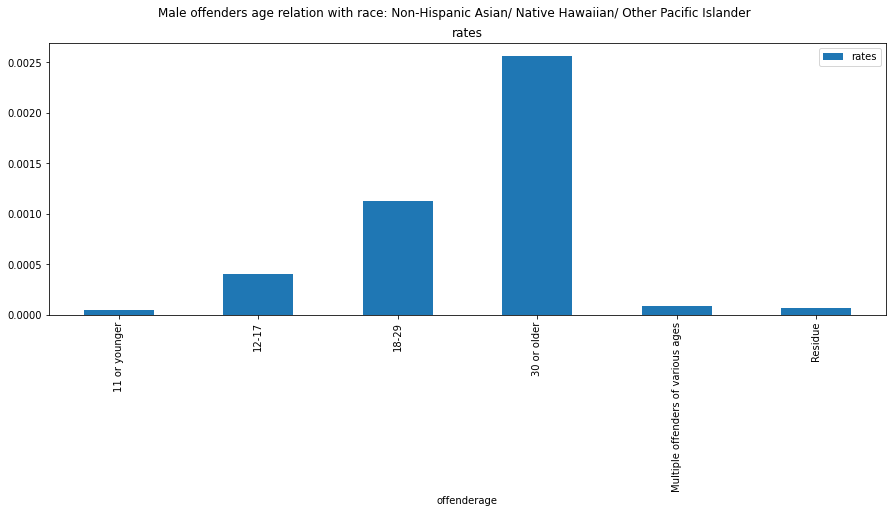

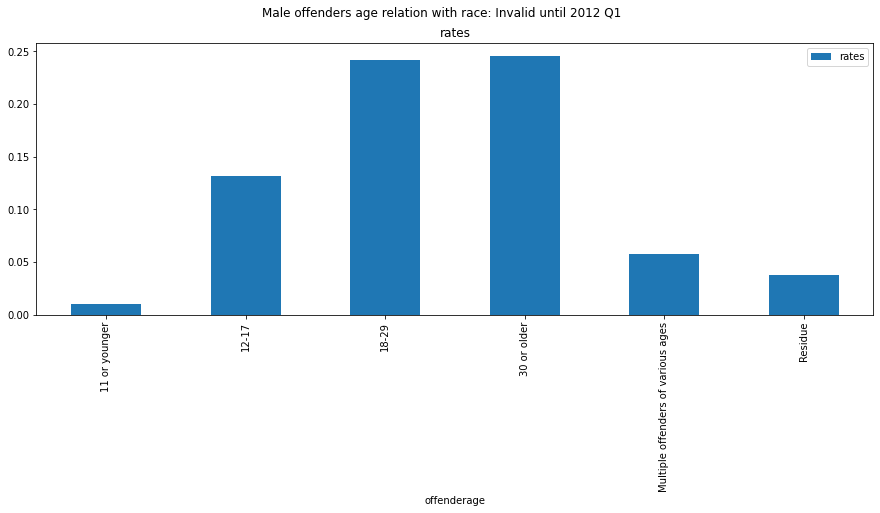

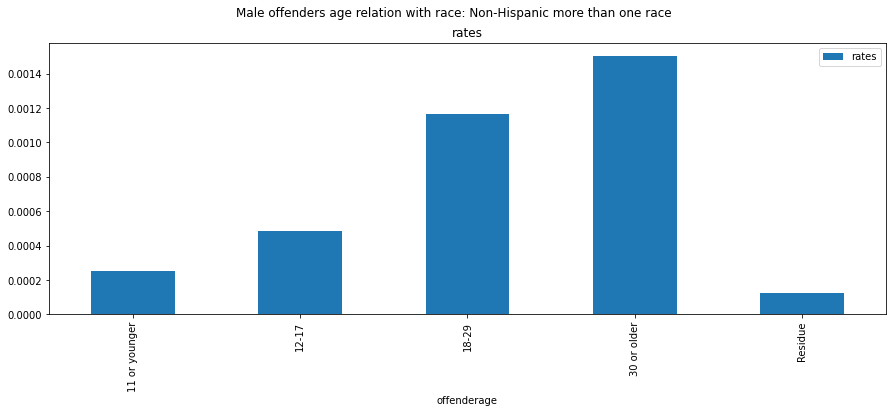

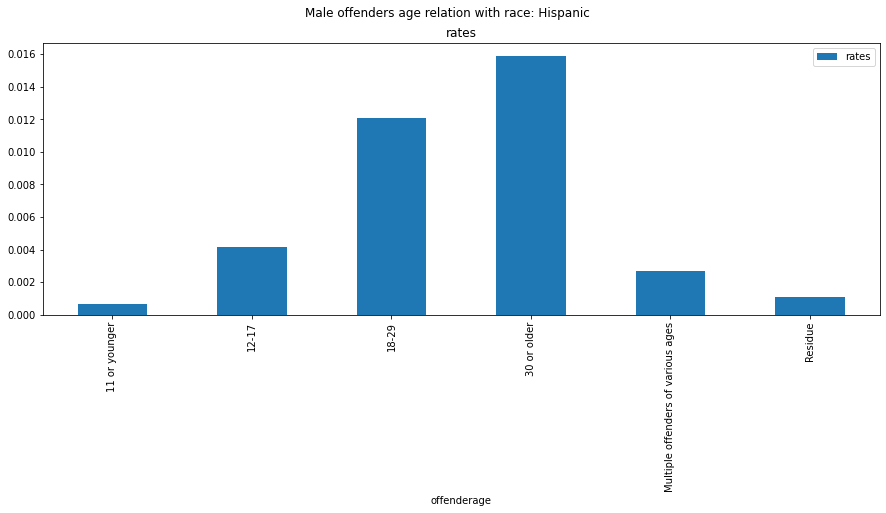

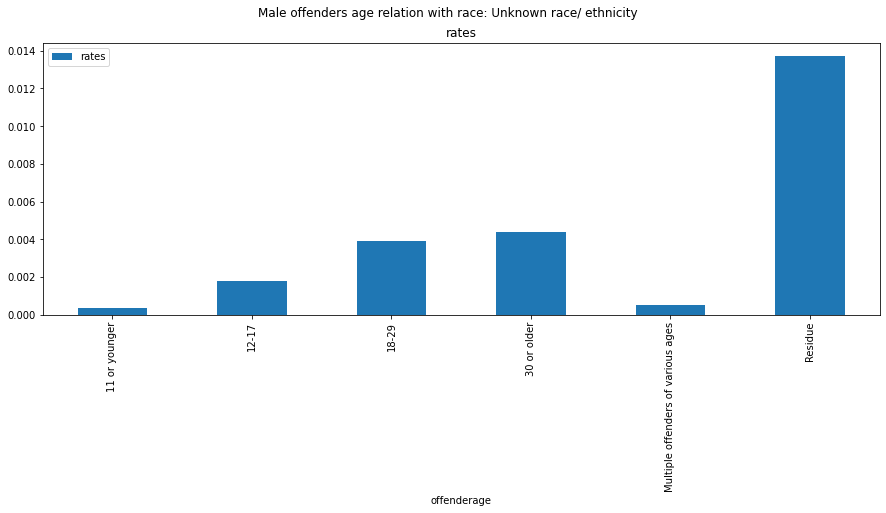

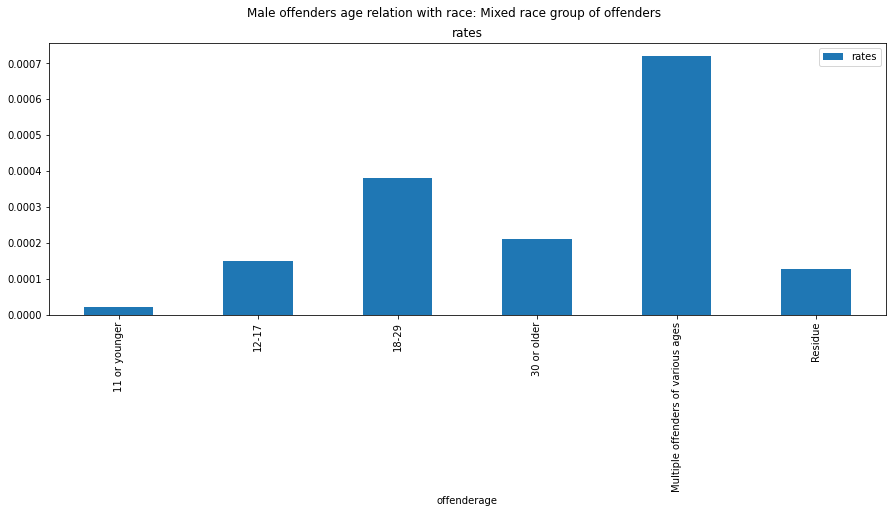

In [ ]:
for i in ['Non-Hispanic white','Non-Hispanic black', 'Non-Hispanic American Indian/ Alaska Nativ', 'Non-Hispanic Asian/ Native Hawaiian/ Other Pacific Islander','Invalid until 2012 Q1','Non-Hispanic more than one race','Hispanic','Unknown race/ ethnicity','Mixed race group of offenders']:
  plot2=req_5111[req_5111['offtracenew']==i]
  plot2=plot2[plot2['offendersex']=='Male']
  ax = plot2[["offenderage","rates"]].plot(x='offenderage', kind='bar',  rot=90,title='Male offenders age relation with race: '+i,subplots=True,layout=(1,1),figsize=(15,5))

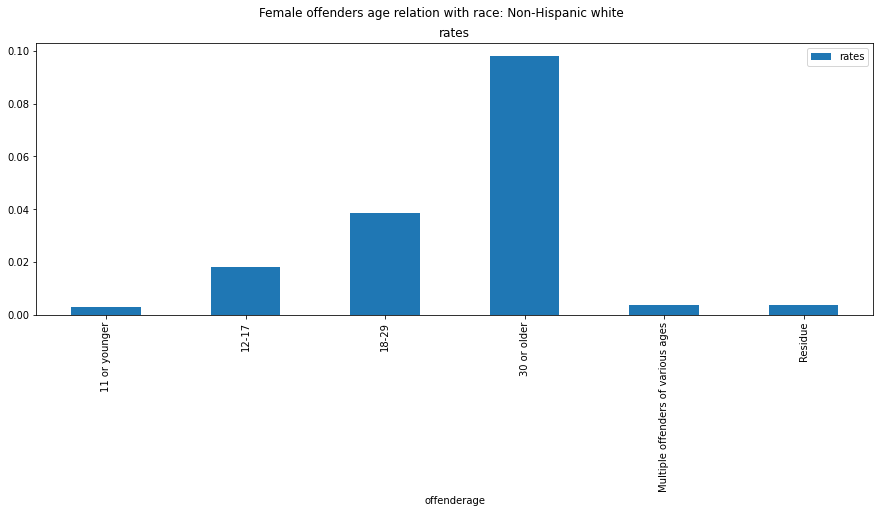

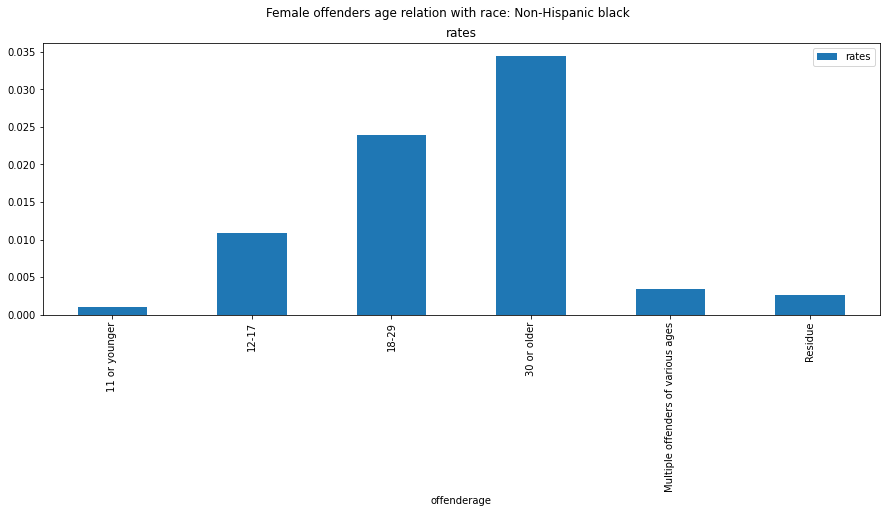

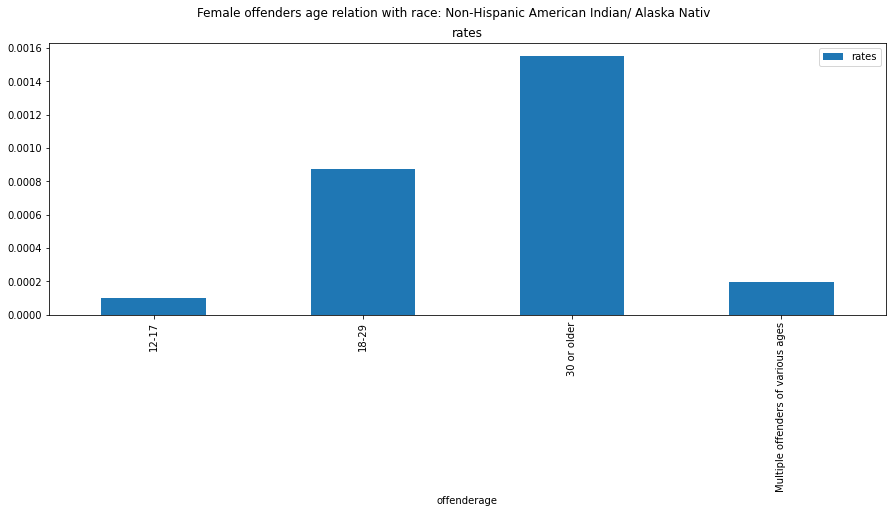

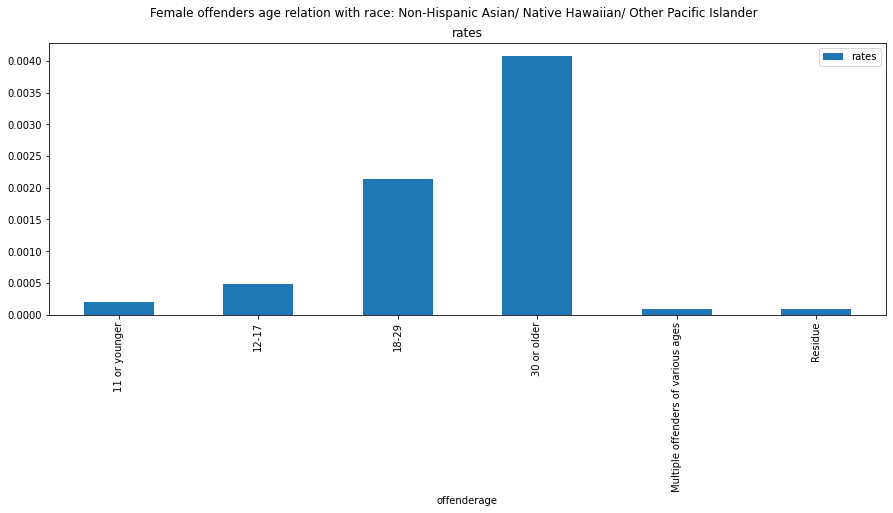

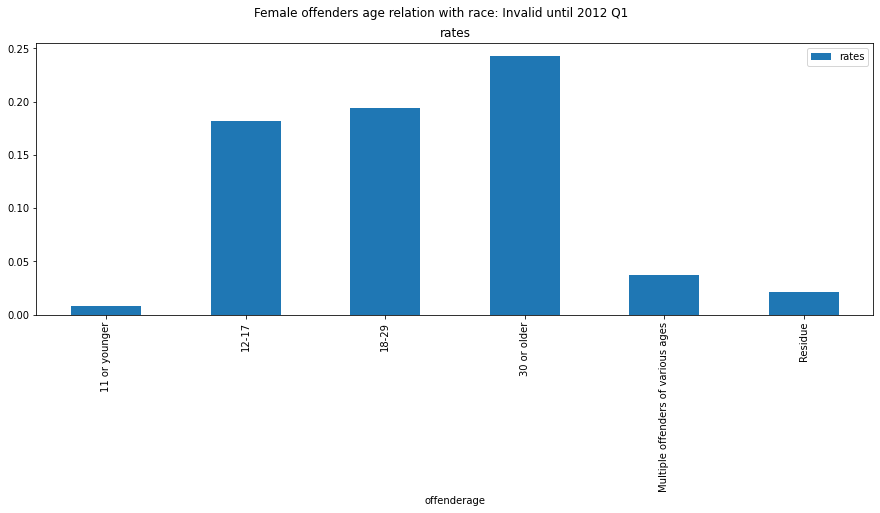

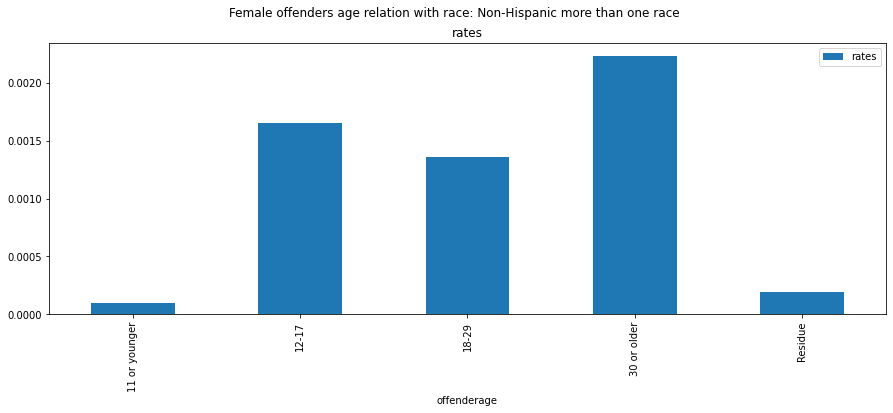

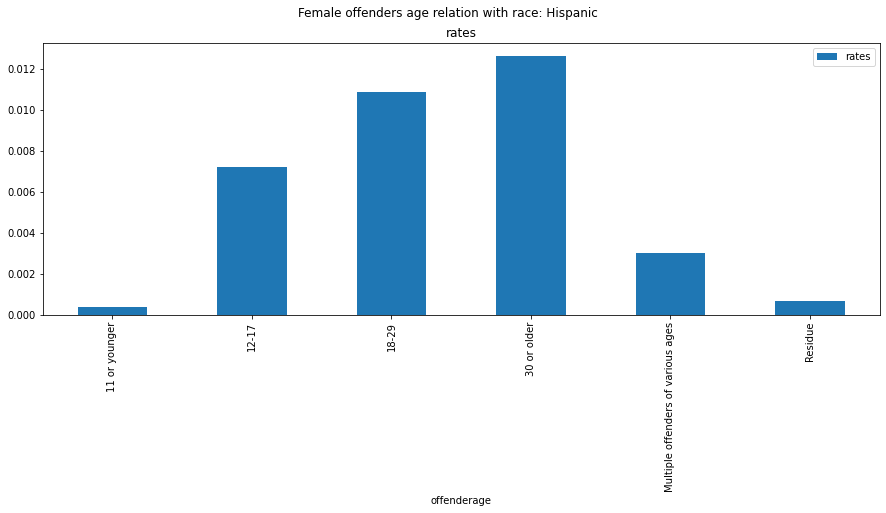

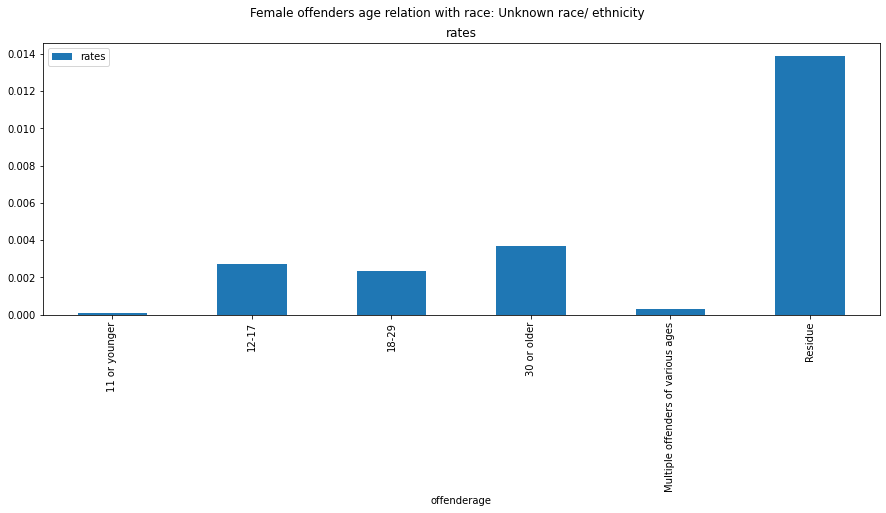

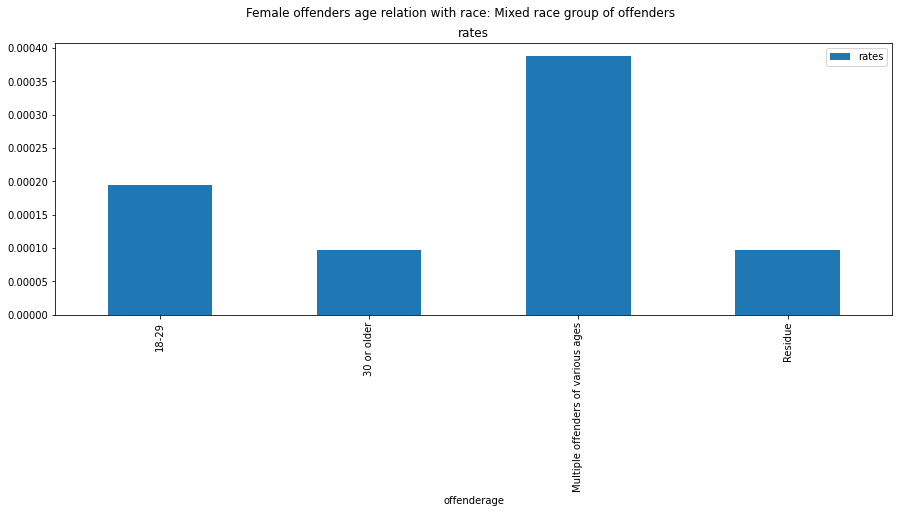

In [ ]:
for i in ['Non-Hispanic white','Non-Hispanic black', 'Non-Hispanic American Indian/ Alaska Nativ', 'Non-Hispanic Asian/ Native Hawaiian/ Other Pacific Islander','Invalid until 2012 Q1','Non-Hispanic more than one race','Hispanic','Unknown race/ ethnicity','Mixed race group of offenders']:
  plot2=req_5111[req_5111['offtracenew']==i]
  plot2=plot2[plot2['offendersex']=='Female']
  ax = plot2[["offenderage","rates"]].plot(x='offenderage', kind='bar',  rot=90,title='Female offenders age relation with race: '+i,subplots=True,layout=(1,1),figsize=(15,5))

## The relationship between the victim’s education level, their gross household income, and their rate of victimization

In [ ]:
preprocessed_data2['totalcounts']=np.zeros(len(preprocessed_data2))
total_counts=preprocessed_data2.groupby(['Respondent_education_level','household_with_imputed_data'],group_keys=True).count().reset_index()
total_counts=total_counts[['Respondent_education_level','household_with_imputed_data','totalcounts']]
total_counts

preprocessed_data['counts']=np.zeros(len(preprocessed_data))
preprocessed_data['totalcounts']=np.zeros(len(preprocessed_data))
preprocessed_data['rates']=np.zeros(len(preprocessed_data))


preprocessed_data['counts']=np.zeros(len(preprocessed_data))
req_6=preprocessed_data.groupby(['Respondent_education_level','household_with_imputed_data']).count().reset_index()
req_6['totalcounts']=total_counts['totalcounts']
req_6=req_6[['Respondent_education_level','household_with_imputed_data','counts','totalcounts','rates']]
req_6['rates']=req_6['counts']/req_6['totalcounts']
req_6=req_6.sort_values(by='rates',ascending=False).reset_index()
req_6.to_csv('/content/drive/MyDrive/req6.csv')
req_6

index Respondent_education_level household_with_imputed_data  counts  \
0       7                    College                lessThan7500    1848   
1       4                    College                  7500-14999    2293   
2      23                High school                lessThan7500    3242   
3      11               Grade school                 50000-74999     188   
4      29              Middle school                 75000OrMore    1026   
5      10               Grade school                 35000-49999     208   
6      26              Middle school                 35000-49999    1072   
7      27              Middle school                 50000-74999     967   
8      25              Middle school                 25000-34999     974   
9       0                    College                 15000-24999    2892   
10     13               Grade school                 75000OrMore     146   
11      9               Grade school                 25000-34999     174   
12     20                High school                  7500-14999    3692   
13     24              Middle school                 15000-24999    1070   
14      1                    College                 25000-34999    3002   
15     31              Middle school                lessThan7500     630   
16     28              Middle school                  7500-14999     932   
17      2                    College                 35000-49999    4038   
18     16                High school                 15000-24999    4040   
19     21                High school                 75000OrMore    2408   
20     17                High school                 25000-34999    3393   
21      5                    College                 75000OrMore    6361   
22      3                    College                 50000-74999    4411   
23      8               Grade school                 15000-24999     198   
24     47                    Residue                lessThan7500      48   
25     19                High school                 50000-74999    2852   
26     18                High school                 35000-49999    3341   
27     12               Grade school                  7500-14999     204   
28     42                    Residue                 35000-49999      70   
29     30              Middle school                     Unknown     786   
30     14               Grade school                     Unknown     173   
31     15               Grade school                lessThan7500     127   
32     41                    Residue                 25000-34999      53   
33     36               No schooling                  7500-14999      30   
34     40                    Residue                 15000-24999      55   
35     44                    Residue                  7500-14999      46   
36      6                    College                     Unknown    2852   
37     22                High school                     Unknown    3244   
38     39               No schooling                lessThan7500      24   
39     43                    Residue                 50000-74999      48   
40     45                    Residue                 75000OrMore      69   
41     37               No schooling                 75000OrMore       3   
42     33               No schooling                 25000-34999       8   
43     34               No schooling                 35000-49999       7   
44     32               No schooling                 15000-24999      14   
45     46                    Residue                     Unknown     195   
46     38               No schooling                     Unknown      10   
47     35               No schooling                 50000-74999       1   

    totalcounts     rates  
0         11736  0.157464  
1         18403  0.124599  
2         26413  0.122743  
3          1918  0.098019  
4         10983  0.093417  
5          2252  0.092362  
6         11928  0.089873  
7         10943  0.088367  
8         11319  0.086050  

In [ ]:
data={'demographic':req_6['Respondent_education_level']+req_6['household_with_imputed_data'].astype('string') ,'rates':req_6['rates']}
df4 = pd.DataFrame(data=data)
df4=df4.sort_values('rates')
df4

demographic     rates
47    No schooling50000-74999  0.005650
46        No schoolingUnknown  0.011377
45             ResidueUnknown  0.011784
44    No schooling15000-24999  0.022508
43    No schooling35000-49999  0.024648
42    No schooling25000-34999  0.024691
41    No schooling75000OrMore  0.025862
40         Residue75000OrMore  0.031364
39         Residue50000-74999  0.031558
38   No schoolinglessThan7500  0.032129
37         High schoolUnknown  0.033574
36             CollegeUnknown  0.035670
35          Residue7500-14999  0.035798
34         Residue15000-24999  0.036232
33     No schooling7500-14999  0.036765
32         Residue25000-34999  0.037482
31   Grade schoollessThan7500  0.038345
30        Grade schoolUnknown  0.041980
29       Middle schoolUnknown  0.042441
28         Residue35000-49999  0.043970
27     Grade school7500-14999  0.046972
26     High school35000-49999  0.047761
25     High school50000-74999  0.049563
24        ResiduelessThan7500  0.049741
23    Grade school15000-24999  0.051229
22         College50000-74999  0.051760
21         College75000OrMore  0.052194
20     High school25000-34999  0.052970
19     High school75000OrMore  0.055745
18     High school15000-24999  0.057445
17         College35000-49999  0.059543
16    Middle school7500-14999  0.060461
15  Middle schoollessThan7500  0.066979
14         College25000-34999  0.068347
13   Middle school15000-24999  0.069050
12      High school7500-14999  0.073769
11    Grade school25000-34999  0.073948
10    Grade school75000OrMore  0.083524
9          College15000-24999  0.085099
8    Middle school25000-34999  0.086050
7    Middle school50000-74999  0.088367
6    Middle school35000-49999  0.089873
5     Grade school35000-49999  0.092362
4    Middle school75000OrMore  0.093417
3     Grade school50000-74999  0.098019
2     High schoollessThan7500  0.122743
1           College7500-14999  0.124599
0         CollegelessThan7500  0.157464

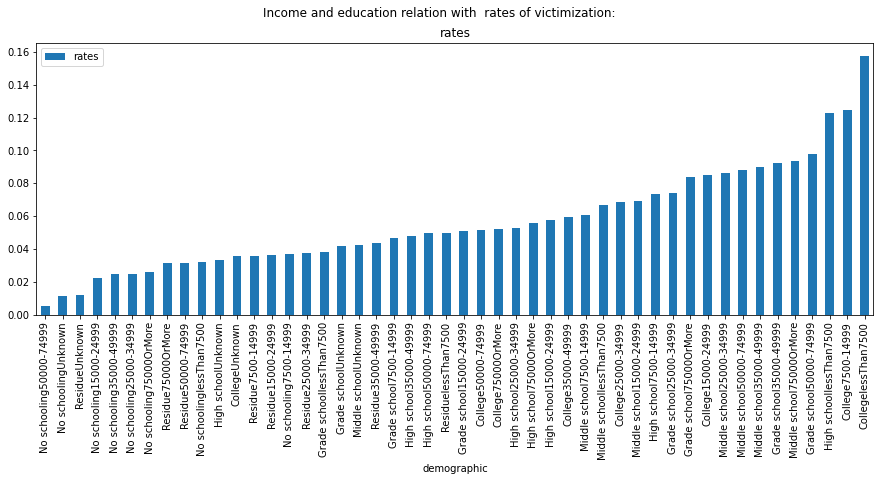

In [ ]:
ax = df4[["demographic","rates"]].plot(x='demographic', kind='bar',  rot=90,title='Income and education relation with  rates of victimization: ',subplots=True,layout=(1,1),figsize=(15,5))

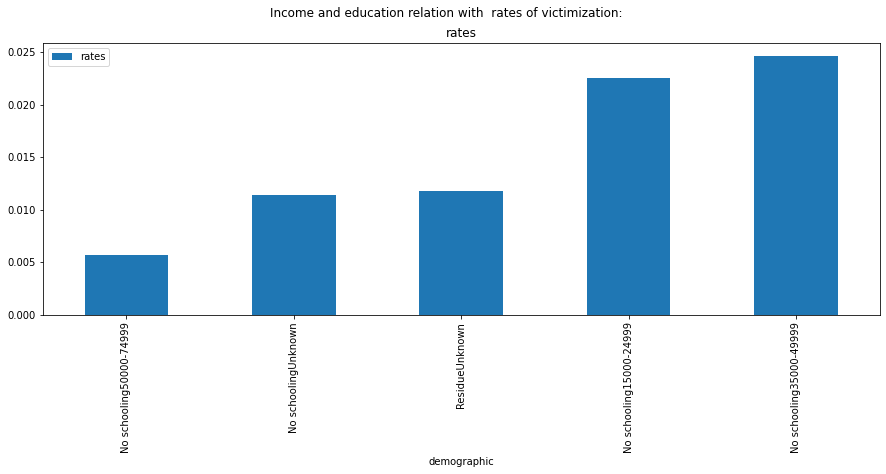

In [ ]:
ax = df4[["demographic","rates"]][0:5].plot(x='demographic', kind='bar',  rot=90,title='Income and education relation with  rates of victimization: ',subplots=True,layout=(1,1),figsize=(15,5))

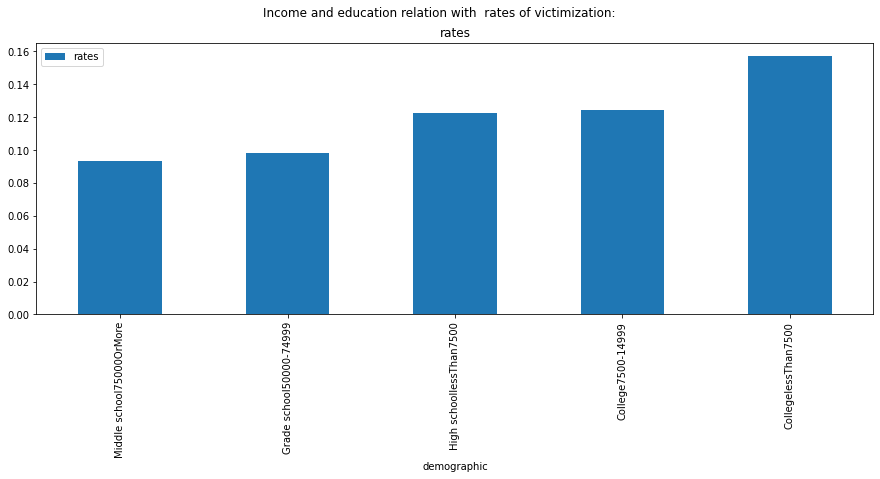

In [ ]:
ax = df4[["demographic","rates"]][-5:].plot(x='demographic', kind='bar',  rot=90,title='Income and education relation with  rates of victimization: ',subplots=True,layout=(1,1),figsize=(15,5))

As shown, being in a college with a moderate income (between 7500-15000) are the most frequent victims, while victims who had no schooling and high income are the least frequent

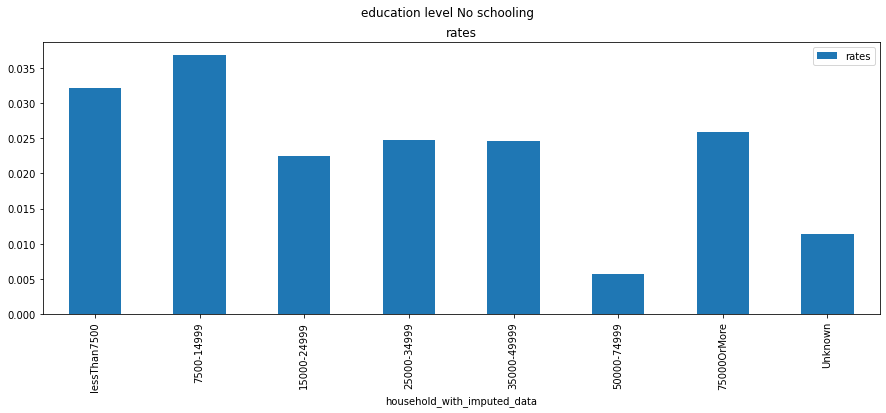

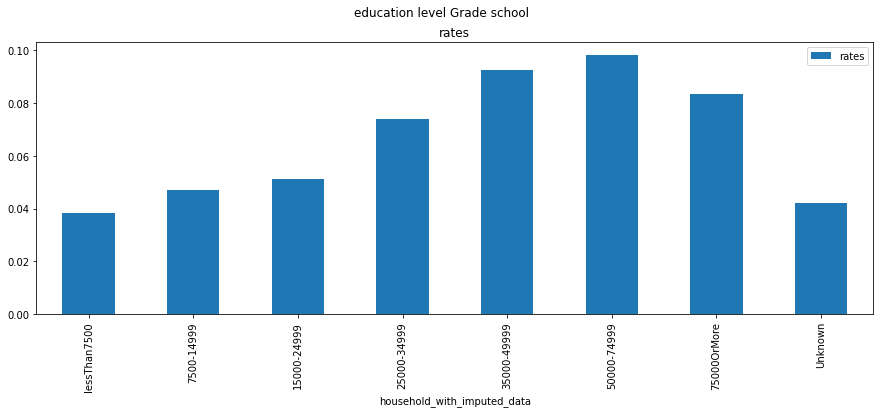

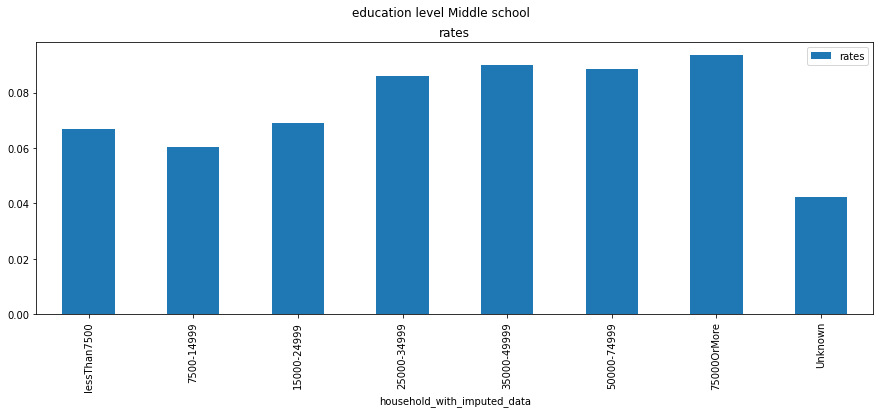

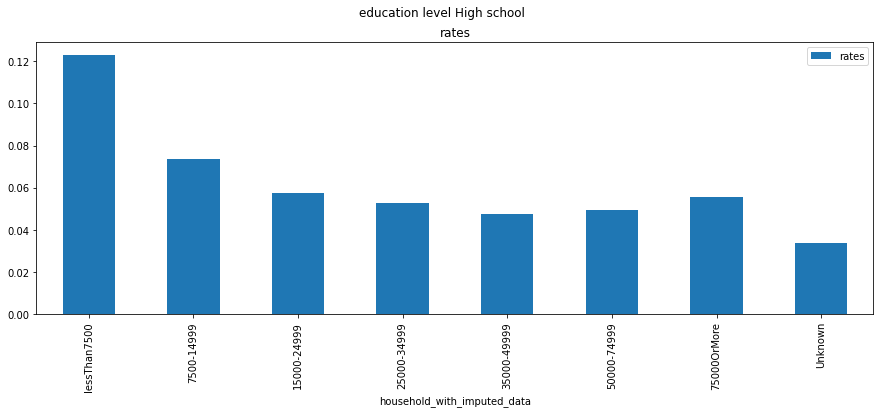

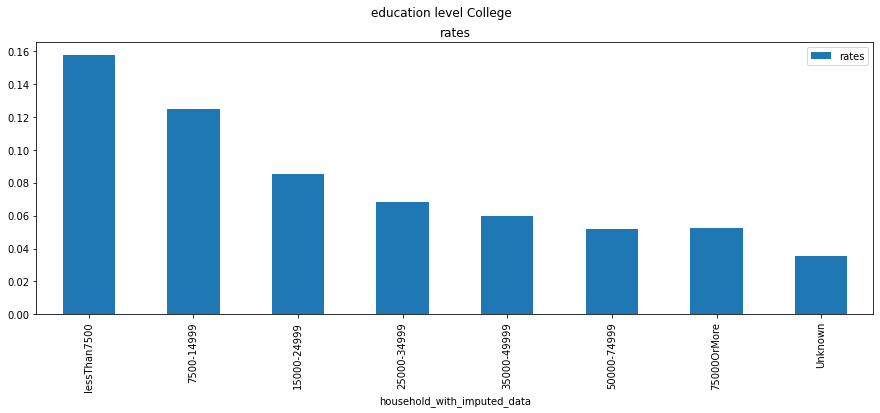

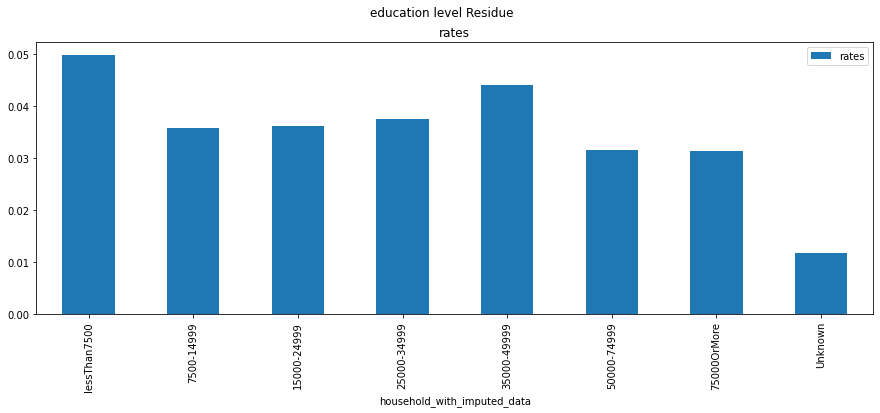

In [ ]:
req_6=pd.read_csv('/content/drive/MyDrive/req6.csv')
import matplotlib.pyplot as plt
req_6.household_with_imputed_data=req_6.household_with_imputed_data.astype('category')
req_6.household_with_imputed_data=req_6.household_with_imputed_data.cat.set_categories(['lessThan7500', '7500-14999', '15000-24999','25000-34999','35000-49999','50000-74999','75000OrMore','Unknown'])
for i in [ 'No schooling', 'Grade school',  'Middle school','High school','College','Residue']:
  plot2=req_6[req_6['Respondent_education_level']==i].sort_values(by="household_with_imputed_data")

  ax = plot2[["household_with_imputed_data","rates"]].plot(x='household_with_imputed_data', kind='bar',  rot=90,title='education level '+i,subplots=True,layout=(1,1),figsize=(15,5))

# Part 3: Answering Questions

## Which type of non-fatal crime is the most under-reported? Is there an association between the offender-victim relationship and the likelihood of a crime being reported?

In [ ]:
preprocessed_data['counts']=np.zeros(len(preprocessed_data))
Q_1=preprocessed_data[preprocessed_data['reported_to_police']=='No'].groupby(['type_of_crime']).count().reset_index('type_of_crime')
Q_1=Q_1[['type_of_crime','counts']].sort_values('counts')
Q_1.to_csv('/content/drive/MyDrive/Q_1.csv')
Q_1

type_of_crime  counts
1  Personal theft/larceny    1235
2     Rape/sexual assault    2104
3                 Robbery    2665
0      Aggravated assault    4861
4          Simple assault   22836

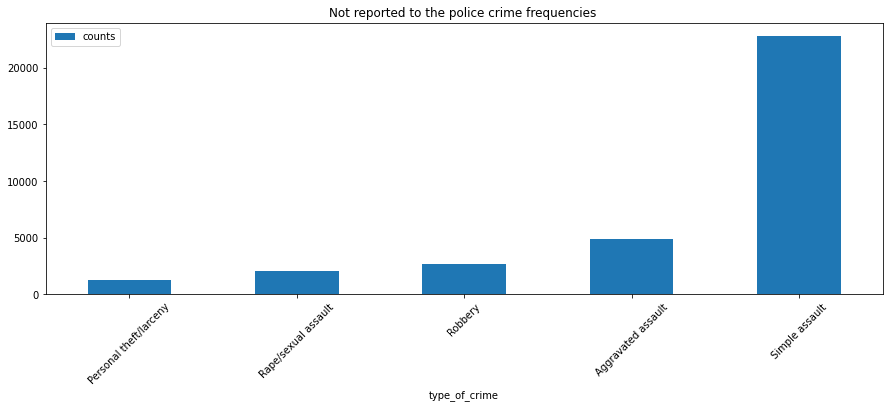

In [ ]:
ax = Q_1[["type_of_crime","counts"]].plot(x='type_of_crime', kind='bar',  rot=45,title='Not reported to the police crime frequencies ',figsize=(15,5))

Simple assault is the most under-reported type of crime.



In [ ]:
preprocessed_data['counts']=np.zeros(len(preprocessed_data))
Q_12=preprocessed_data[preprocessed_data['reported_to_police'].isin(['No','Yes'])].groupby(['reported_to_police','relation_with_offender']).count().reset_index('reported_to_police')
Q_12=Q_12[['reported_to_police','counts']].reset_index()
Q_12.to_csv('/content/drive/MyDrive/Q_12.csv')
Q_12

relation_with_offender reported_to_police  counts
0   Do not know number of offenders                 No    1450
1          Do not know relationship                 No    1299
2                         Intimates                 No    3313
3                   Other relatives                 No    1757
4                         Strangers                 No   14140
5    Well known/casual acquaintance                 No   11742
6   Do not know number of offenders                Yes     950
7          Do not know relationship                Yes    1224
8                         Intimates                Yes    3941
9                   Other relatives                Yes    2080
10                        Strangers                Yes   12983
11   Well known/casual acquaintance                Yes    7606

In [ ]:
p=Q_12[Q_12['reported_to_police']=='Yes'].sort_values('counts')
p

relation_with_offender reported_to_police  counts
6   Do not know number of offenders                Yes     950
7          Do not know relationship                Yes    1224
9                   Other relatives                Yes    2080
8                         Intimates                Yes    3941
11   Well known/casual acquaintance                Yes    7606
10                        Strangers                Yes   12983

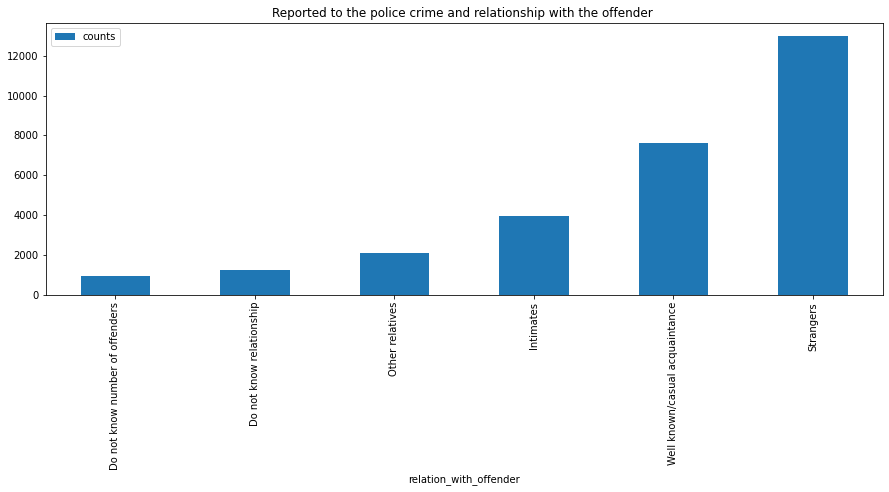

In [ ]:
ax = p[["relation_with_offender","counts"]].plot(x='relation_with_offender', kind='bar',  rot=90,title='Reported to the police crime and relationship with the offender ',figsize=(15,5))

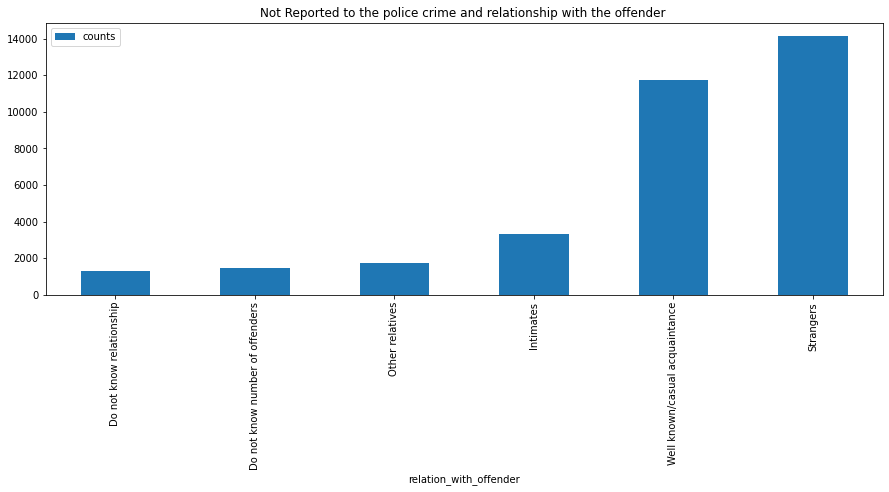

In [ ]:
p2=Q_12[Q_12['reported_to_police']=='No'].sort_values('counts')
ax = p2[["relation_with_offender","counts"]].plot(x='relation_with_offender', kind='bar',  rot=90,title='Not Reported to the police crime and relationship with the offender ',figsize=(15,5))

As shown, there is no association between the offender type and reporting of the crime.

## Who are the people (the demographic segment) that appear to be most at risk of violent victimization? Who is the least at risk?

In [ ]:
preprocessed_data2['totalcounts']=np.zeros(len(preprocessed_data2))
total_counts=preprocessed_data2.groupby(['race_ethnicity','age','sex'],group_keys=True).count().reset_index()
total_counts=total_counts[['race_ethnicity','age','sex','totalcounts']]
total_counts

preprocessed_data['counts']=np.zeros(len(preprocessed_data))
preprocessed_data['totalcounts']=np.zeros(len(preprocessed_data))
preprocessed_data['rates']=np.zeros(len(preprocessed_data))
req_4111=preprocessed_data.groupby(['race_ethnicity','age','sex'],group_keys=True).count().reset_index()
req_4111['totalcounts']=total_counts['totalcounts']
req_4111=req_4111[['age','sex','race_ethnicity','counts','totalcounts','rates']]
req_4111['rates']=req_4111['counts']/req_4111['totalcounts']
req_4111=req_4111.sort_values(by='rates',ascending=False).reset_index()

req_4111.to_csv('/content/drive/MyDrive/req_4111.csv')
req_4111

index          age     sex  \
0      50        18-24  female   
1      52        25-34  female   
2      57        50-64    male   
3      54        35-49  female   
4      55        35-49    male   
..    ...          ...     ...   
67     46  65 or older  female   
68     71  65 or older    male   
69     34  65 or older  female   
70     70  65 or older  female   
71     35  65 or older    male   

                                       race_ethnicity  counts  totalcounts  \
0                        Non-Hispanic-morethanonerace     102          197   
1                        Non-Hispanic-morethanonerace     125          261   
2                        Non-Hispanic-morethanonerace      97          223   
3                        Non-Hispanic-morethanonerace     133          350   
4                        Non-Hispanic-morethanonerace     104          280   
..                                                ...     ...          ...   
67                                 Non-Hispanic-black     153         8909   
68                                 Non-Hispanic-white     920        59488   
69  Non-Hispanic-Asian/NativeHawaiian/OtherPacific...      29         2252   
70                                 Non-Hispanic-white     969        81288   
71  Non-Hispanic-Asian/NativeHawaiian/OtherPacific...      17         1713   

       rates  
0   0.517766  
1   0.478927  
2   0.434978  
3   0.380000  
4   0.371429  
..       ...  
67  0.017174  
68  0.015465  
69  0.012877  
70  0.011921  
71  0.009924  

[72 rows x 7 columns]

In [ ]:
data={'demographic':req_4111['age']+req_4111['sex']+req_4111['race_ethnicity'],'rates':req_4111['rates']}
df = pd.DataFrame(data=data)
df

demographic     rates
0             18-24femaleNon-Hispanic-morethanonerace  0.517766
1             25-34femaleNon-Hispanic-morethanonerace  0.478927
2               50-64maleNon-Hispanic-morethanonerace  0.434978
3             35-49femaleNon-Hispanic-morethanonerace  0.380000
4               35-49maleNon-Hispanic-morethanonerace  0.371429
..                                                ...       ...
67                65 or olderfemaleNon-Hispanic-black  0.017174
68                  65 or oldermaleNon-Hispanic-white  0.015465
69  65 or olderfemaleNon-Hispanic-Asian/NativeHawa...  0.012877
70                65 or olderfemaleNon-Hispanic-white  0.011921
71  65 or oldermaleNon-Hispanic-Asian/NativeHawaii...  0.009924

[72 rows x 2 columns]

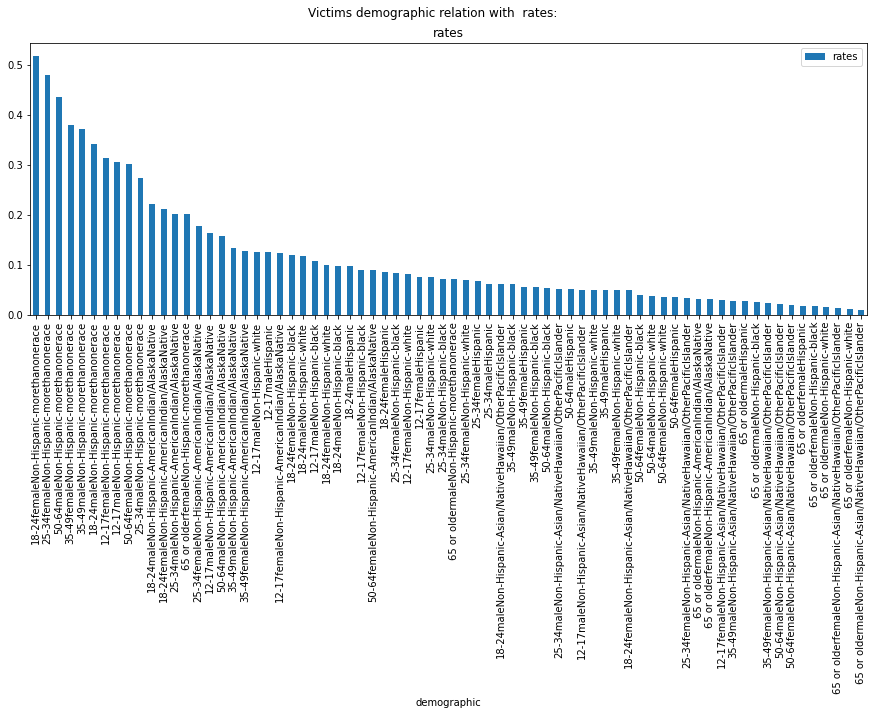

In [ ]:
ax = df[["demographic","rates"]].plot(x='demographic', kind='bar',  rot=90,title='Victims demographic relation with  rates: ',subplots=True,layout=(1,1),figsize=(15,5))

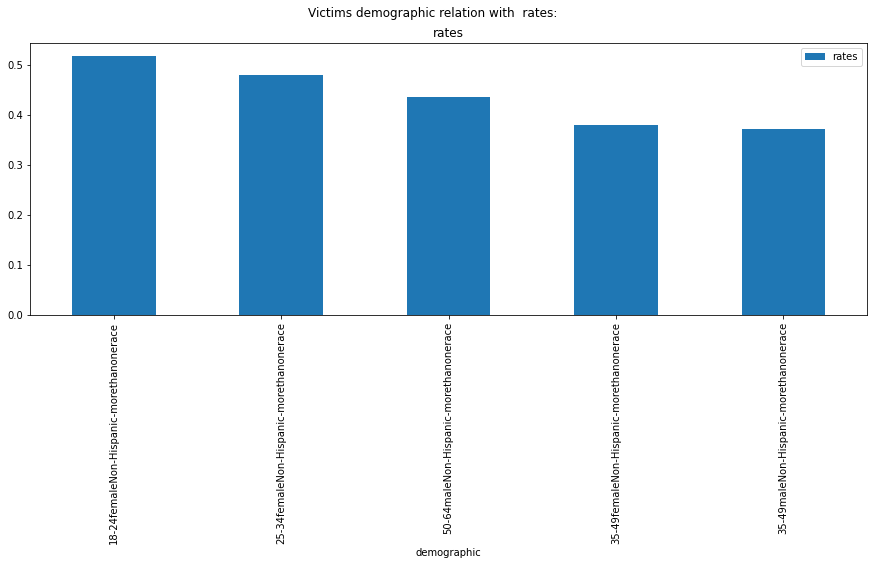

In [ ]:
ax = df[["demographic","rates"]][0:5].plot(x='demographic', kind='bar',  rot=90,title='Victims demographic relation with  rates: ',subplots=True,layout=(1,1),figsize=(15,5))

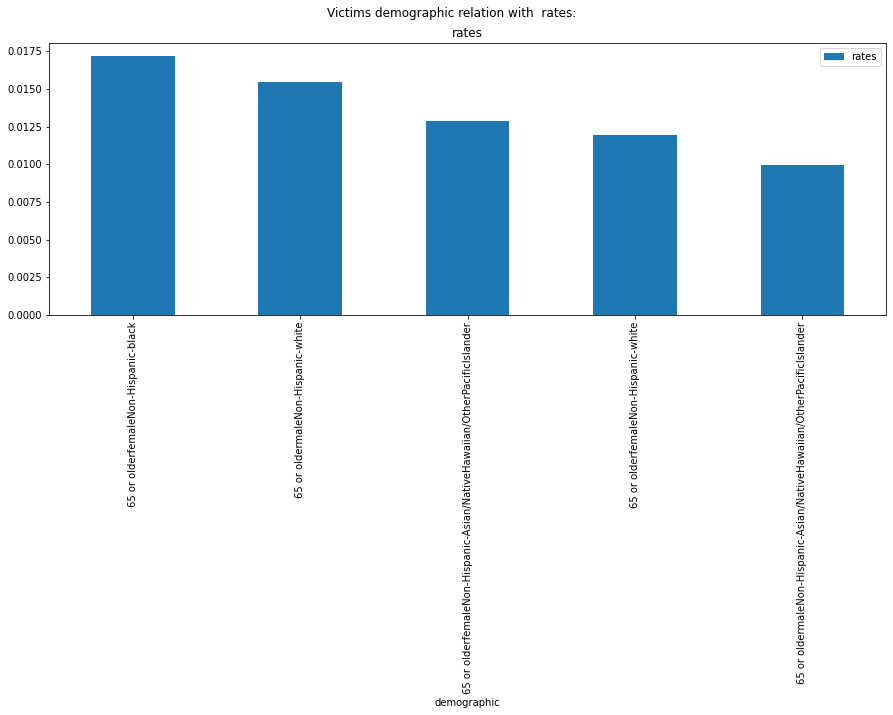

In [ ]:
ax = df[["demographic","rates"]][-5:].plot(x='demographic', kind='bar',  rot=90,title='Victims demographic relation with  rates: ',subplots=True,layout=(1,1),figsize=(15,5))

Non Hispanic females of more than one race of 18-24 years are the most people at risk of violent victimization, while non Hispanic Asian males of 65 years or more are the least at risk of violent victimization.

In [ ]:
preprocessed_data2['totalcounts']=np.zeros(len(preprocessed_data2))
total_counts=preprocessed_data2.groupby(['race_ethnicity','age','sex'],group_keys=True).count().reset_index()
total_counts=total_counts[['race_ethnicity','age','sex','totalcounts']]
total_counts

preprocessed_data['counts']=np.zeros(len(preprocessed_data))
preprocessed_data['totalcounts']=np.zeros(len(preprocessed_data))
preprocessed_data['rates']=np.zeros(len(preprocessed_data))
Q2=preprocessed_data[preprocessed_data['aggregate_type_of_crime']=='Violent crime'].groupby(['race_ethnicity','age','sex'],group_keys=True).count().reset_index()
Q2['totalcounts']=total_counts['totalcounts']
Q2=Q2[['age','sex','race_ethnicity','counts','totalcounts','rates']]
Q2['rates']=Q2['counts']/Q2['totalcounts']
Q2=Q2.sort_values(by='rates',ascending=False).reset_index()

Q2.to_csv('/content/drive/MyDrive/Q2.csv')
Q2

index          age     sex  \
0      50        18-24  female   
1      52        25-34  female   
2      57        50-64    male   
3      54        35-49  female   
4      55        35-49    male   
..    ...          ...     ...   
67     10  65 or older  female   
68     71  65 or older    male   
69     70  65 or older  female   
70     35  65 or older    male   
71     34  65 or older  female   

                                       race_ethnicity  counts  totalcounts  \
0                        Non-Hispanic-morethanonerace      96          197   
1                        Non-Hispanic-morethanonerace     123          261   
2                        Non-Hispanic-morethanonerace      93          223   
3                        Non-Hispanic-morethanonerace     131          350   
4                        Non-Hispanic-morethanonerace     102          280   
..                                                ...     ...          ...   
67                                           Hispanic      75         5062   
68                                 Non-Hispanic-white     848        59488   
69                                 Non-Hispanic-white     812        81288   
70  Non-Hispanic-Asian/NativeHawaiian/OtherPacific...      15         1713   
71  Non-Hispanic-Asian/NativeHawaiian/OtherPacific...      19         2252   

       rates  
0   0.487310  
1   0.471264  
2   0.417040  
3   0.374286  
4   0.364286  
..       ...  
67  0.014816  
68  0.014255  
69  0.009989  
70  0.008757  
71  0.008437  

[72 rows x 7 columns]

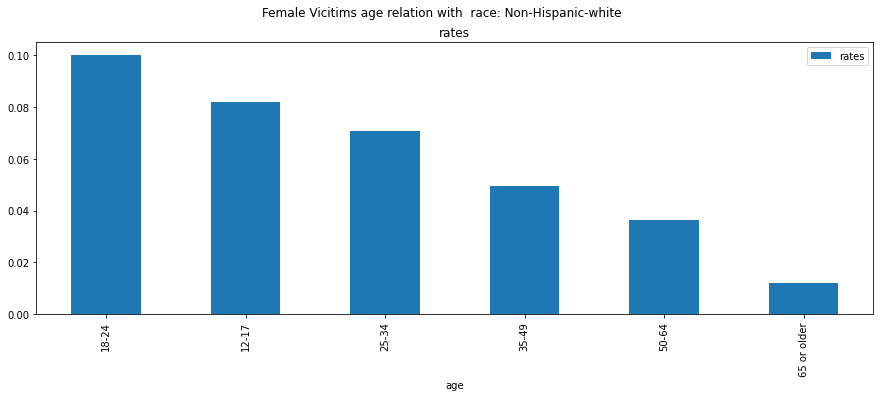

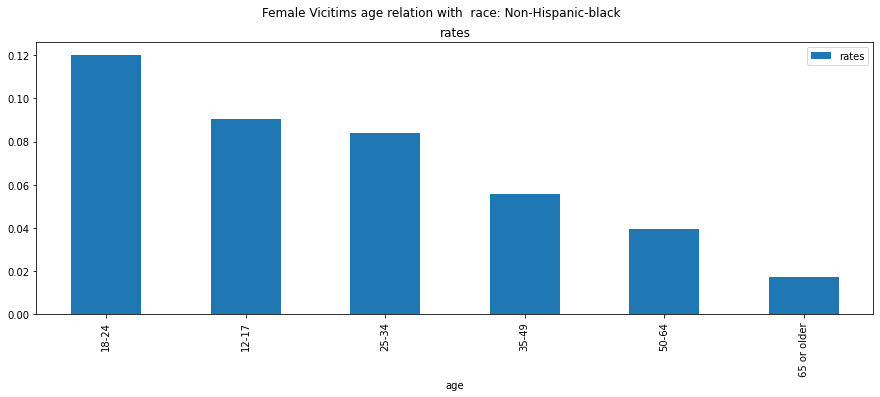

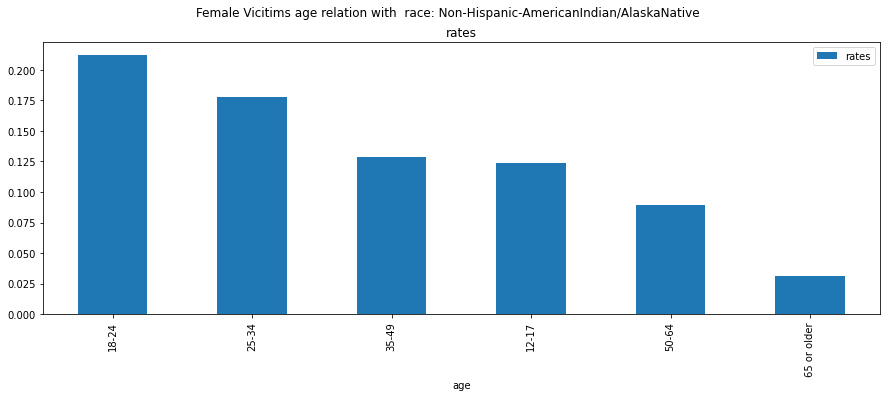

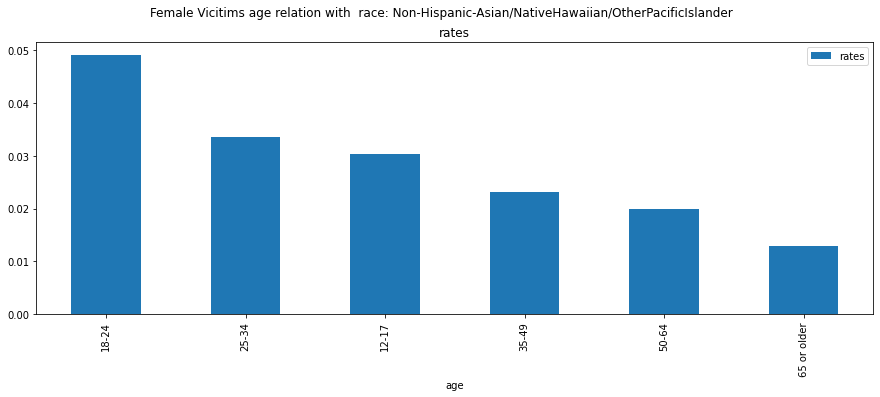

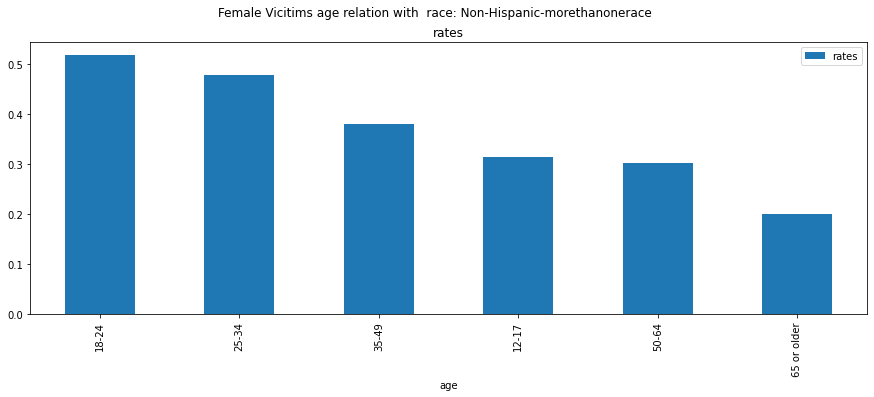

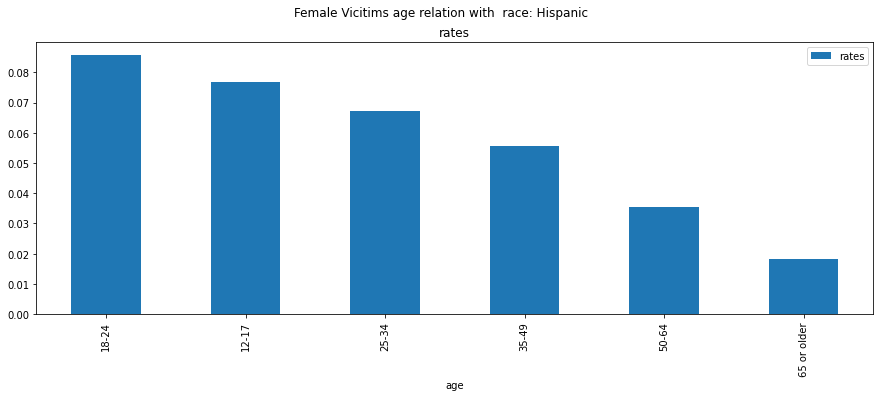

In [ ]:
for i in ['Non-Hispanic-white', 'Non-Hispanic-black', 'Non-Hispanic-AmericanIndian/AlaskaNative','Non-Hispanic-Asian/NativeHawaiian/OtherPacificIslander','Non-Hispanic-morethanonerace','Hispanic']:
  plot2=req_4111[req_4111['race_ethnicity']==i]
  plot2=plot2[plot2['sex']=='female']
  ax = plot2[["age","rates"]].plot(x='age', kind='bar',  rot=90,title='Female Vicitims age relation with  race: '+i,subplots=True,layout=(1,1),figsize=(15,5))

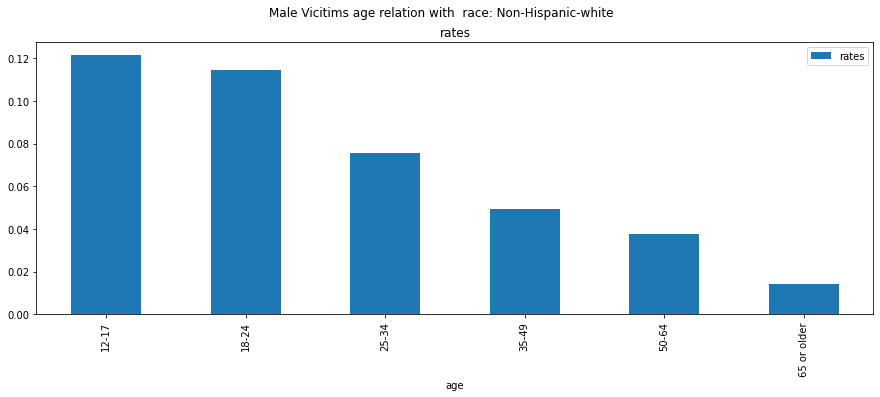

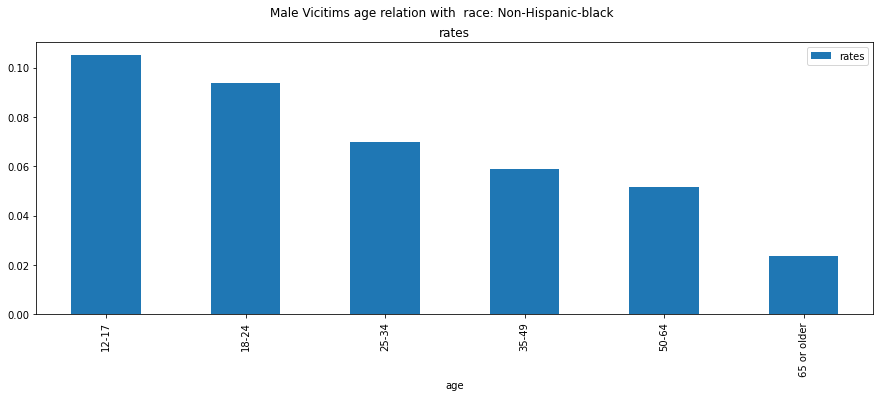

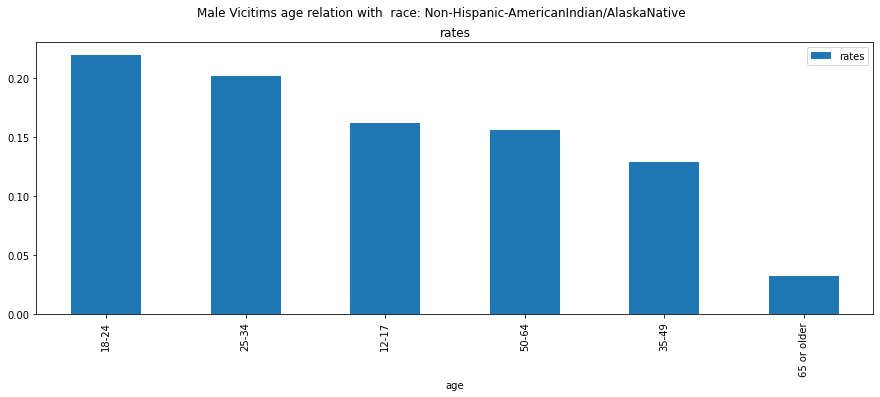

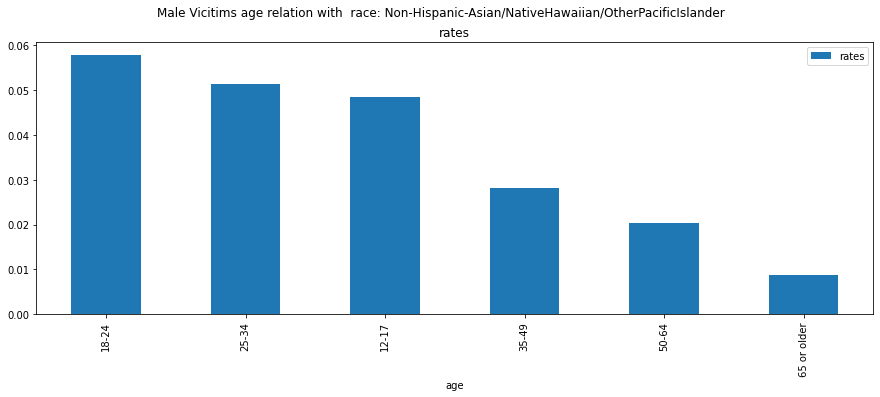

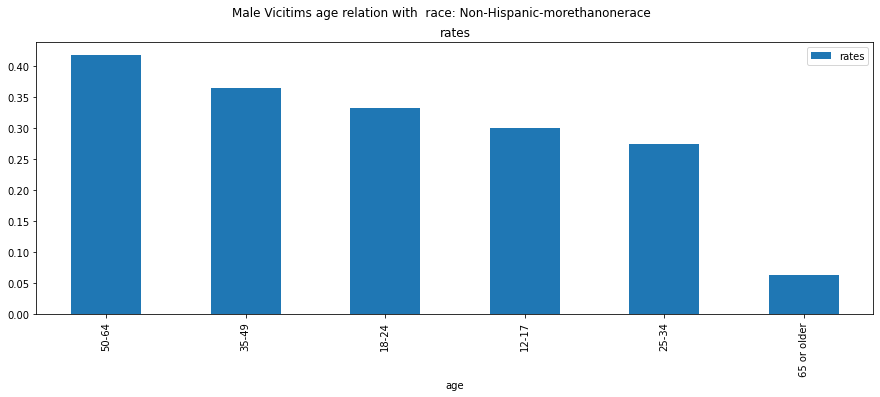

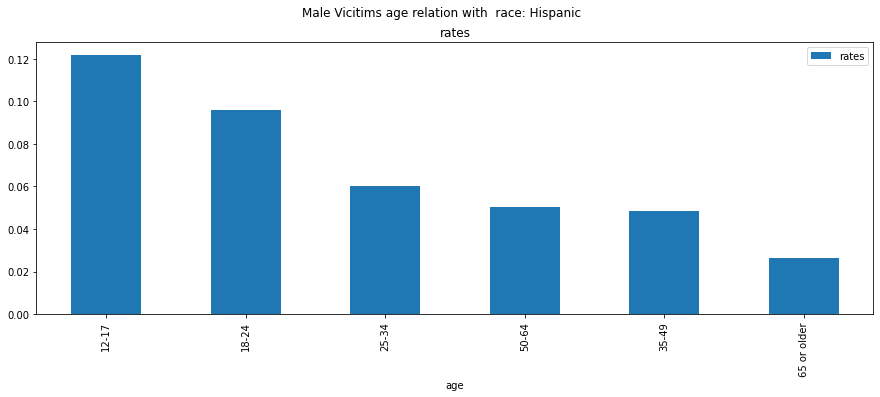

In [ ]:
for i in ['Non-Hispanic-white', 'Non-Hispanic-black', 'Non-Hispanic-AmericanIndian/AlaskaNative','Non-Hispanic-Asian/NativeHawaiian/OtherPacificIslander','Non-Hispanic-morethanonerace','Hispanic']:
  plot2=Q2[Q2['race_ethnicity']==i]
  plot2=plot2[plot2['sex']=='male']
  ax = plot2[["age","rates"]].plot(x='age', kind='bar',  rot=90,title='Male Vicitims age relation with  race: '+i,subplots=True,layout=(1,1),figsize=(15,5))

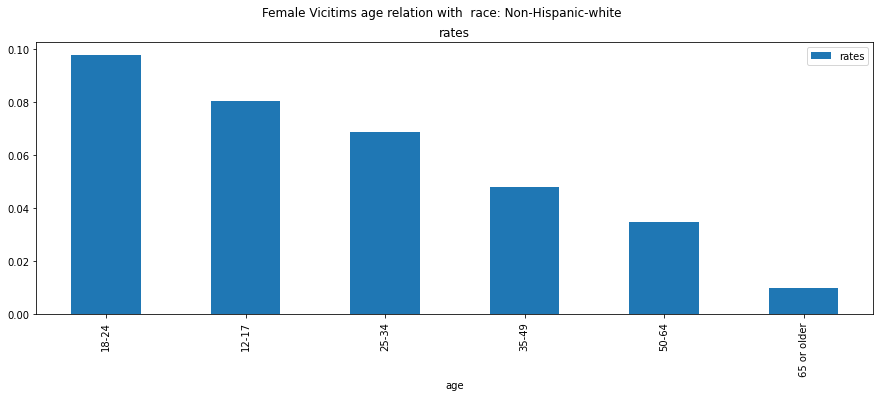

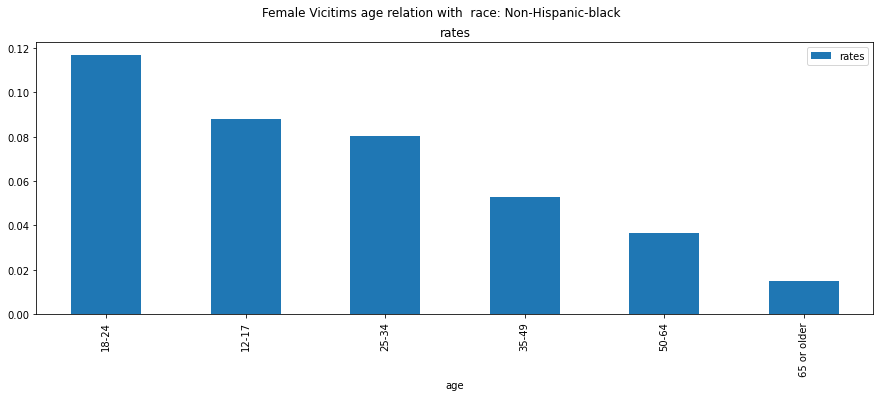

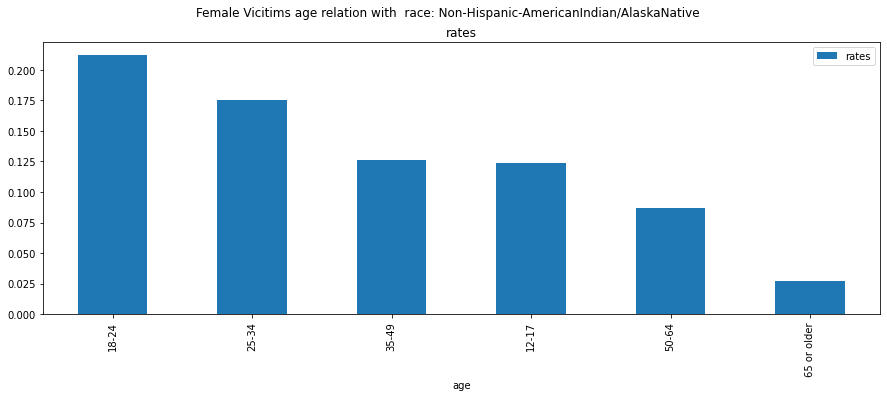

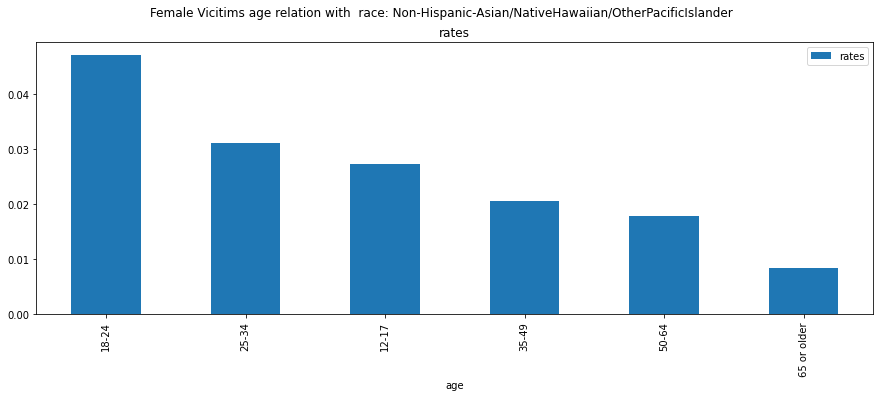

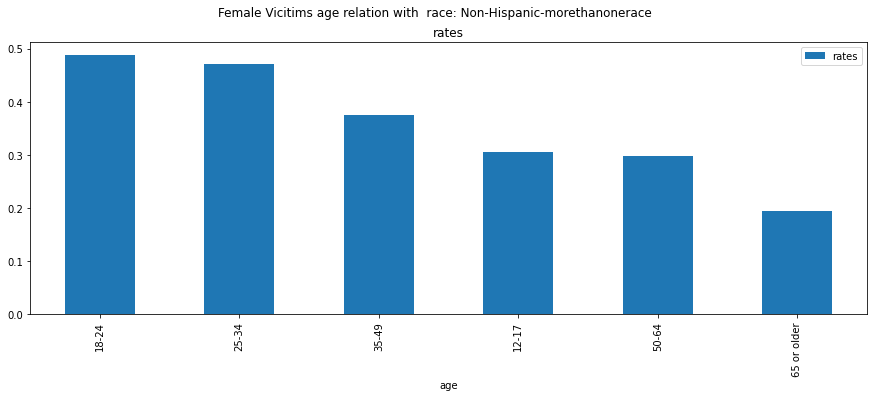

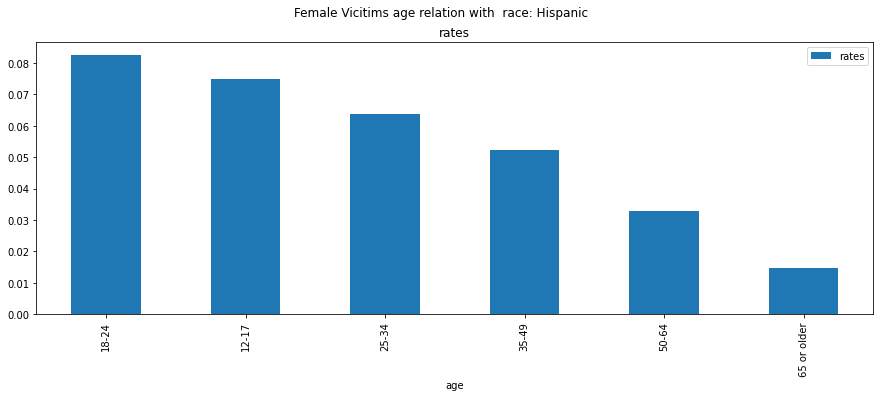

In [ ]:
for i in ['Non-Hispanic-white', 'Non-Hispanic-black', 'Non-Hispanic-AmericanIndian/AlaskaNative','Non-Hispanic-Asian/NativeHawaiian/OtherPacificIslander','Non-Hispanic-morethanonerace','Hispanic']:
  plot2=Q2[Q2['race_ethnicity']==i]
  plot2=plot2[plot2['sex']=='female']
  ax = plot2[["age","rates"]].plot(x='age', kind='bar',  rot=90,title='Female Vicitims age relation with  race: '+i,subplots=True,layout=(1,1),figsize=(15,5))

In [ ]:
preprocessed_data['counts']=np.zeros(len(preprocessed_data))
preprocessed_data['sum']=np.zeros(len(preprocessed_data))
preprocessed_data['rates']=np.zeros(len(preprocessed_data))
preprocessed_data2['sum']=np.zeros(len(preprocessed_data2))


gender_sum=preprocessed_data2.groupby(['sex'],group_keys=True).count().reset_index()
males_sum=gender_sum.loc[gender_sum['sex']=='male','sum']
females_sum=gender_sum.loc[gender_sum['sex']=='female','sum']



preprocessed_data['rates']=np.zeros(len(preprocessed_data))
Q_21=preprocessed_data.groupby(['sex']).count().reset_index('sex')
Q_21=Q_21[['sex','rates']].reset_index()
Q_21.loc[Q_21['sex']=='male','rates']=Q_21[Q_21['sex']=='male']['rates']/males_sum
Q_21.loc[Q_21['sex']=='female','rates']=Q_21[Q_21['sex']=='female']['rates']/females_sum

Q_21.to_csv('/content/drive/MyDrive/Q_21.csv')
Q_21

index     sex     rates
0      0  female  0.053120
1      1    male  0.062748

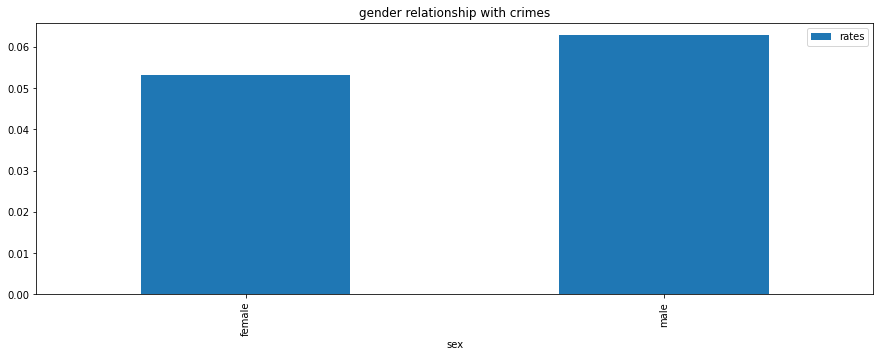

In [ ]:
ax = Q_21[["sex","rates"]].plot(x='sex', kind='bar',  rot=90,title='gender relationship with crimes',figsize=(15,5))

## Of all victims of non-fatal crimes who suffer an injury, which demographic is the most likely to receive medical attention at the scene? Which is the least likely?

In [ ]:
preprocessed_data['counts']=np.zeros(len(preprocessed_data))
preprocessed_data['rates']=np.zeros(len(preprocessed_data))
Q39=preprocessed_data[preprocessed_data['injury']=='Injured'].groupby(['race_ethnicity','age','sex']).count().reset_index()
Q39=Q39['sum']
Q30=preprocessed_data[preprocessed_data['treatment']=='Treated at scene, home, medical office, or other location']
Q30=preprocessed_data[preprocessed_data['injury']=='Injured'].groupby(['race_ethnicity','age','sex'],group_keys=True).count().reset_index()
Q30=Q30[['age','sex','race_ethnicity','counts','rates']]
Q30['rates']=Q30['counts']/Q39.sum()
Q30=Q30.sort_values(by='rates',ascending=False).reset_index()

Q30

index          age     sex  \
0      66        35-49  female   
1      67        35-49    male   
2      61        12-17    male   
3      65        25-34    male   
4      64        25-34  female   
..    ...          ...     ...   
67     34  65 or older  female   
68     35  65 or older    male   
69     59  65 or older    male   
70     22  65 or older  female   
71     23  65 or older    male   

                                       race_ethnicity  counts     rates  
0                                  Non-Hispanic-white    5759  0.370449  
1                                  Non-Hispanic-white    5574  0.358549  
2                                  Non-Hispanic-white    4854  0.312235  
3                                  Non-Hispanic-white    4710  0.302972  
4                                  Non-Hispanic-white    4544  0.292294  
..                                                ...     ...       ...  
67  Non-Hispanic-Asian/NativeHawaiian/OtherPacific...      29  0.001865  
68  Non-Hispanic-Asian/NativeHawaiian/OtherPacific...      17  0.001094  
69                       Non-Hispanic-morethanonerace       9  0.000579  
70           Non-Hispanic-AmericanIndian/AlaskaNative       8  0.000515  
71           Non-Hispanic-AmericanIndian/AlaskaNative       6  0.000386  

[72 rows x 6 columns]

In [ ]:
data={'demographic':Q30['age']+Q30['sex']+Q30['race_ethnicity'],'rates':Q30['rates']}
df3 = pd.DataFrame(data=data)
df3

demographic     rates
0                       35-49femaleNon-Hispanic-white  0.370449
1                         35-49maleNon-Hispanic-white  0.358549
2                         12-17maleNon-Hispanic-white  0.312235
3                         25-34maleNon-Hispanic-white  0.302972
4                       25-34femaleNon-Hispanic-white  0.292294
..                                                ...       ...
67  65 or olderfemaleNon-Hispanic-Asian/NativeHawa...  0.001865
68  65 or oldermaleNon-Hispanic-Asian/NativeHawaii...  0.001094
69        65 or oldermaleNon-Hispanic-morethanonerace  0.000579
70  65 or olderfemaleNon-Hispanic-AmericanIndian/A...  0.000515
71  65 or oldermaleNon-Hispanic-AmericanIndian/Ala...  0.000386

[72 rows x 2 columns]

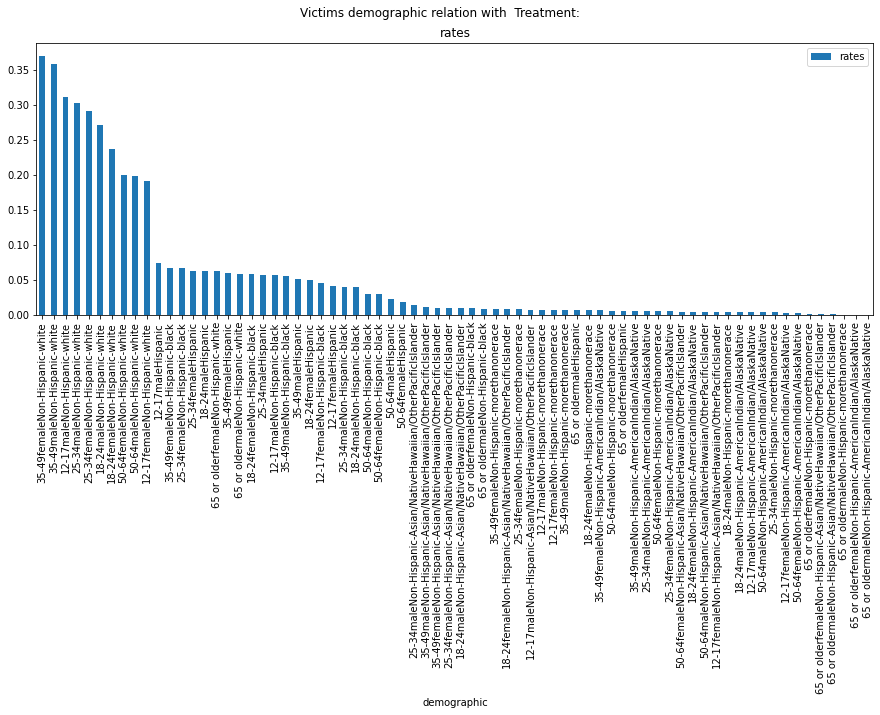

In [ ]:
ax = df3[["demographic","rates"]].plot(x='demographic', kind='bar',  rot=90,title='Victims demographic relation with  Treatment: ',subplots=True,layout=(1,1),figsize=(15,5))

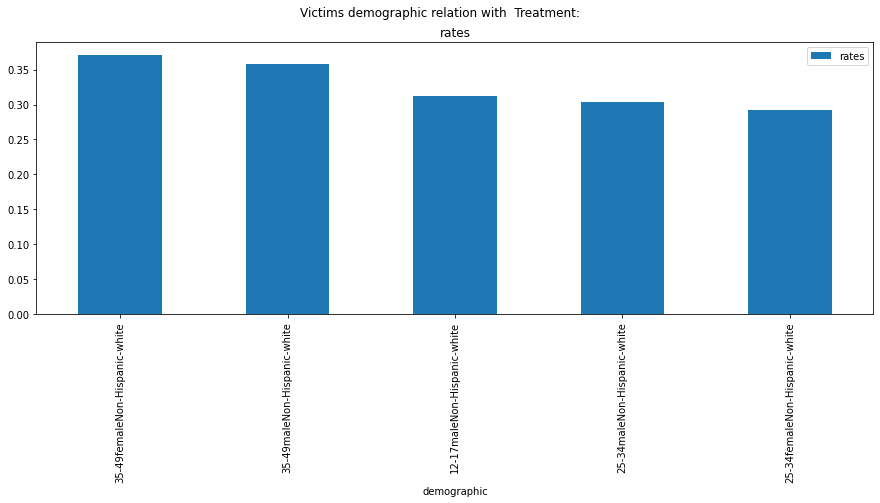

In [ ]:
ax = df3[["demographic","rates"]][0:5].plot(x='demographic', kind='bar',  rot=90,title='Victims demographic relation with  Treatment: ',subplots=True,layout=(1,1),figsize=(15,5))

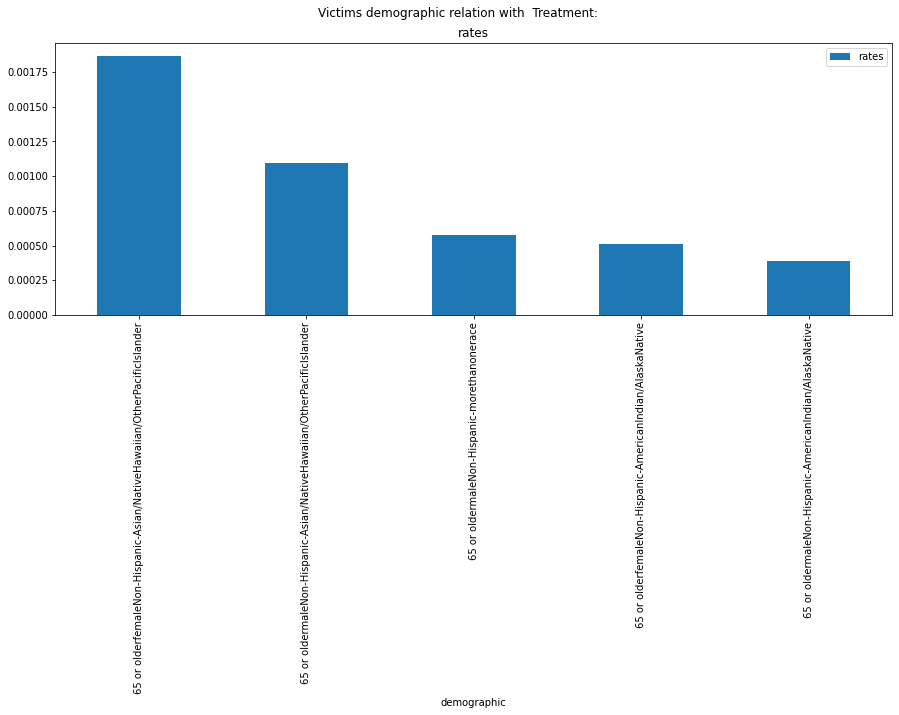

In [ ]:
ax = df3[["demographic","rates"]][-5:].plot(x='demographic', kind='bar',  rot=90,title='Victims demographic relation with  Treatment: ',subplots=True,layout=(1,1),figsize=(15,5))

Non-Hispanic white females of age 35-49 are most likely to be medically attended while suffering from an injury, while the 65-year-old or more non-hipasodic American men are least likely to receive medical attention whilst their injury.

In [ ]:
import numpy as np
preprocessed_data['counts']=np.zeros(len(preprocessed_data))
preprocessed_data['rates']=np.zeros(len(preprocessed_data))
Q_3=preprocessed_data[preprocessed_data['injury']=='Injured'].groupby(['age']).count().reset_index()

Q_36=preprocessed_data[preprocessed_data['treatment']=='Treated at scene, home, medical office, or other location'].groupby(['age']).count().reset_index()
#summ=sum('counts')
Q_36['rates']=Q_36['counts']/Q_3['counts'].sum()
Q_36=Q_36[['age','counts','rates']].sort_values('rates')
Q_36.to_csv('/content/drive/MyDrive/Q_36.csv')
Q_36

age  counts     rates
5  65 or older     222  0.014280
4        50-64     791  0.050881
0        12-17    1151  0.074038
1        18-24    1290  0.082980
2        25-34    1598  0.102792
3        35-49    1690  0.108710

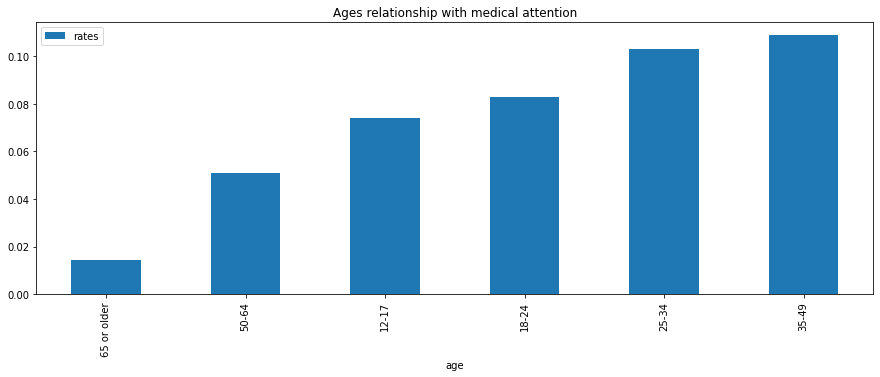

In [ ]:
ax = Q_36[["age","rates"]].plot(x='age', kind='bar',  rot=90,title='Ages relationship with medical attention',figsize=(15,5))

In [ ]:
import numpy as np
preprocessed_data['counts']=np.zeros(len(preprocessed_data))
preprocessed_data['rates']=np.zeros(len(preprocessed_data))
Q_31=preprocessed_data[preprocessed_data['injury']=='Injured']
Q_31=preprocessed_data[preprocessed_data['treatment']=='Treated at scene, home, medical office, or other location'].groupby(['sex']).count().reset_index()
Q_31['rates']=Q_31['counts']/Q_31['counts'].sum()
Q_31=Q_31[['sex','rates']].reset_index()
Q_31.to_csv('/content/drive/MyDrive/Q_31.csv')
Q_31

index     sex     rates
0      0  female  0.519579
1      1    male  0.480421

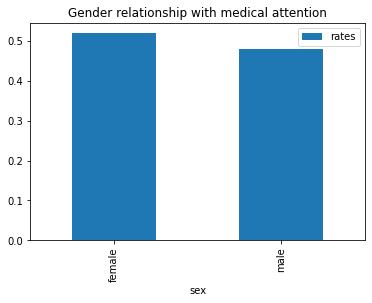

In [ ]:
ax = Q_31[["sex","rates"]].plot(x='sex', kind='bar',  rot=90,title='Gender relationship with medical attention')

In [ ]:
import numpy as np
preprocessed_data['counts']=np.zeros(len(preprocessed_data))
preprocessed_data['rates']=np.zeros(len(preprocessed_data))
Q_32=preprocessed_data[preprocessed_data['injury']=='Injured']
Q_32=preprocessed_data[preprocessed_data['treatment']=='Treated at scene, home, medical office, or other location'].groupby(['race_ethnicity']).count().reset_index('race_ethnicity')
Q_32['rates']=Q_32['counts']/Q_32['counts'].sum()
Q_32=Q_32[['race_ethnicity','rates']].reset_index()
Q_32.to_csv('/content/drive/MyDrive/Q_32.csv')
Q_32

index                                     race_ethnicity     rates
0      0                                           Hispanic  0.137793
1      1           Non-Hispanic-AmericanIndian/AlaskaNative  0.016612
2      2  Non-Hispanic-Asian/NativeHawaiian/OtherPacific...  0.020617
3      3                                 Non-Hispanic-black  0.164195
4      4                       Non-Hispanic-morethanonerace  0.017502
5      5                                 Non-Hispanic-white  0.643281

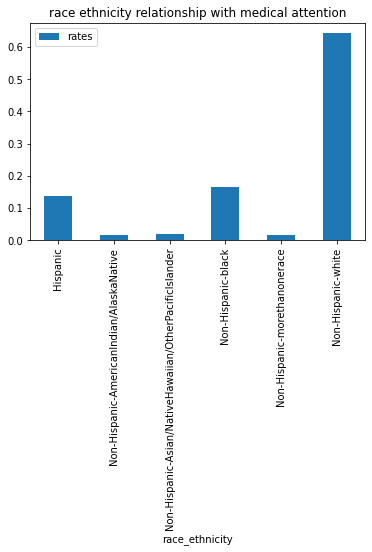

In [ ]:
ax = Q_32[["race_ethnicity","rates"]].plot(x='race_ethnicity', kind='bar',  rot=90,title='race ethnicity relationship with medical attention')

## Which class of crimes is associated with the highest rate of same-offense-recidivism?

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown --id 1QbFY6CrXnMW561p3lZ8gyra9Jfn4AJBK
df = pd.read_csv("/content/NIJ_s_Recidivism_Challenge_Full_Dataset.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1QbFY6CrXnMW561p3lZ8gyra9Jfn4AJBK
To: /content/NIJ_s_Recidivism_Challenge_Full_Dataset.csv
100% 7.42M/7.42M [00:00<00:00, 67.7MB/s]


In [ ]:
df.columns

Index(['ID', 'Gender', 'Race', 'Age_at_Release', 'Residence_PUMA',
       'Gang_Affiliated', 'Supervision_Risk_Score_First',
       'Supervision_Level_First', 'Education_Level', 'Dependents',
       'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony',
       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
       'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_PPViolationCharges',
       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop',
       'Prior_Conviction_Episodes_Drug',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole',
       'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed',
     

In [ ]:
df_p3 = df.copy()

In [ ]:
# drop unnecessary columns
cols = ['Prison_Offense', 'Recidivism_Within_3years']
df_p3 = df_p3[cols]
df_p3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Prison_Offense            22558 non-null  object
 1   Recidivism_Within_3years  25835 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 227.2+ KB


In [ ]:
df_p3.isnull().sum()

Prison_Offense              3277
Recidivism_Within_3years       0
dtype: int64

In [ ]:
df_p3.Prison_Offense.unique()

array(['Drug', 'Violent/Non-Sex', 'Property', 'Other', 'Violent/Sex'],
      dtype=object)

In [ ]:
df_p3['Prison_Offense'] = df_p3["Prison_Offense"].fillna(df_p3['Prison_Offense'].mode()[0])

<ipython-input-89-3ed0bda53d87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p3['Prison_Offense'] = df_p3["Prison_Offense"].fillna(df_p3['Prison_Offense'].mode()[0])


In [ ]:
df_p3.isnull().sum()

Prison_Offense              0
Recidivism_Within_3years    0
dtype: int64

In [ ]:
df_p3['counts']=np.zeros(len(df_p3))
Q_4=df_p3[df_p3['Recidivism_Within_3years']==True].groupby(['Prison_Offense']).count().reset_index('Prison_Offense')
Q_4=Q_4[['Prison_Offense','counts']].sort_values('counts')

<ipython-input-96-2fcb43480bce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p3['counts']=np.zeros(len(df_p3))


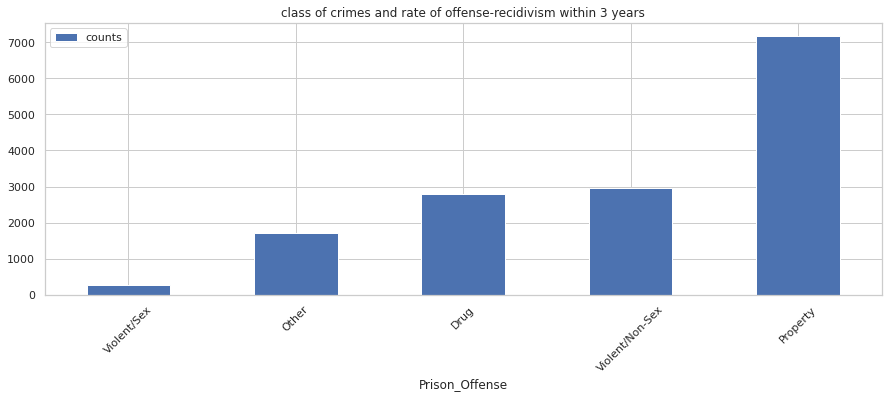

In [ ]:
ax = Q_4[["Prison_Offense","counts"]].plot(x='Prison_Offense', kind='bar',  rot=45,title='class of crimes and rate of offense-recidivism within 3 years',figsize=(15,5))

## Are prisoners who are younger at the time of release more or less likely to reoffend than those who are older?

In [ ]:
df_p3_4 = df.copy()

In [ ]:
# drop unnecessary columns
cols = ['Age_at_Release', 'Recidivism_Within_3years']
df_p3_4 = df_p3_4[cols]
df_p3_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age_at_Release            25835 non-null  object
 1   Recidivism_Within_3years  25835 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 227.2+ KB


In [ ]:
df_p3_4.Age_at_Release.unique()

array(['43-47', '33-37', '48 or older', '38-42', '18-22', '23-27',
       '28-32'], dtype=object)

In [ ]:
df_p3_4.isnull().sum()

Age_at_Release              0
Recidivism_Within_3years    0
dtype: int64

In [ ]:
df_p3_4['counts']=np.zeros(len(df_p3_4))
Q_5=df_p3_4[df_p3['Recidivism_Within_3years']==True].groupby(['Age_at_Release']).count().reset_index('Age_at_Release')
Q_5=Q_5[['Age_at_Release','counts']].sort_values('counts')

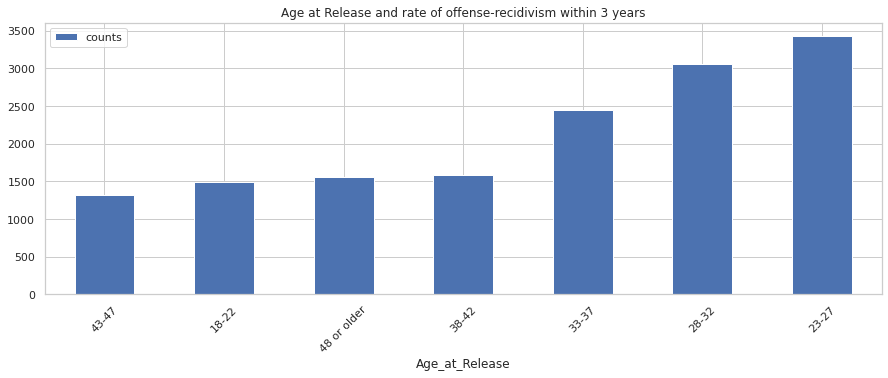

In [ ]:
ax = Q_5[["Age_at_Release","counts"]].plot(x='Age_at_Release', kind='bar',  rot=45,title='Age at Release and rate of offense-recidivism within 3 years',figsize=(15,5))

# Part 4: Hypothesis Testing

## Calculating the average strictness per state across the all years (1991-2020)

In [ ]:
df2 = df1_categorized.groupby('state').strictness.mean()
df2 = df2.to_frame()
df2.rename(columns = {'state':'state', 'strictness':'avg_strictness'}, inplace = True)

In [ ]:
df2.head()

avg_strictness
state                     
Alabama          12.166667
Alaska            5.466667
Arizona          10.833333
Arkansas         12.333333
California       86.633333

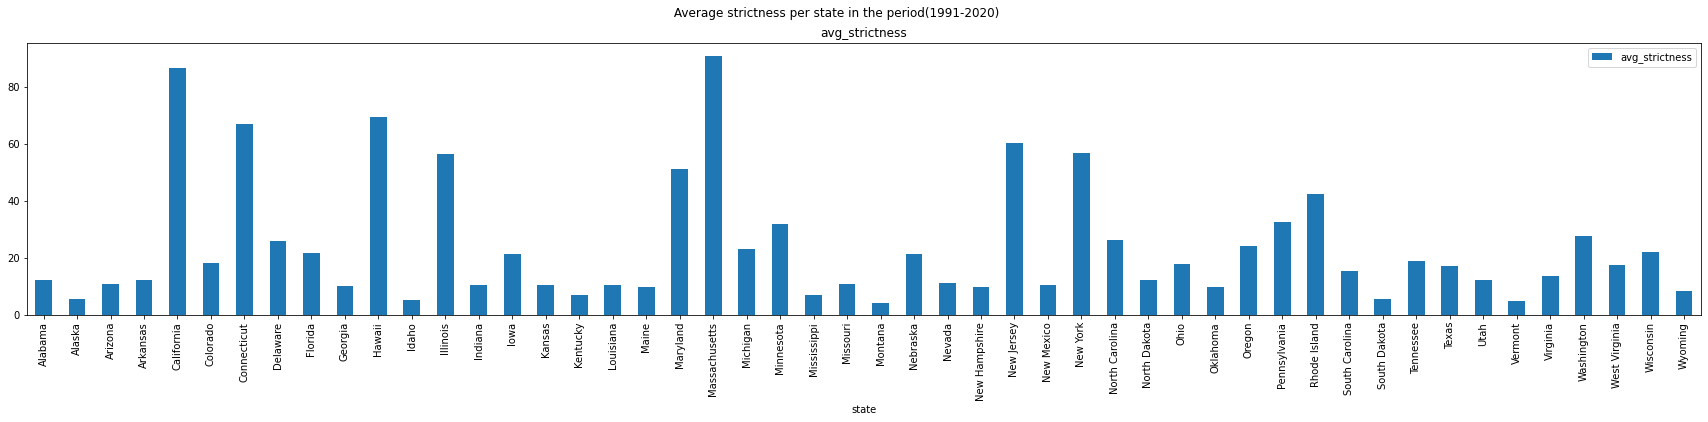

In [ ]:
ax = df2[["state","avg_strictness"]].plot(x='state', kind='bar',  rot=90,title=' Average strictness per state in the period(1991-2020) ',subplots=True,layout=(1,1),figsize=(30,5))

In [ ]:
#adding a column called heavily stricted that takes values either 0 or 1 
df2.loc[df2['avg_strictness'] >= df2.avg_strictness.mean(), ['Heavily_stricted']] = '0'
df2.loc[df2['avg_strictness'] <= df2.avg_strictness.mean(), ['Heavily_stricted']] = '1'


In [ ]:
df2 = df2.reset_index()
df2

state  avg_strictness Heavily_stricted
0          Alabama       12.166667                1
1           Alaska        5.466667                1
2          Arizona       10.833333                1
3         Arkansas       12.333333                1
4       California       86.633333                0
5         Colorado       18.066667                1
6      Connecticut       67.066667                0
7         Delaware       25.766667                0
8          Florida       21.800000                1
9          Georgia       10.166667                1
10          Hawaii       69.500000                0
11           Idaho        5.166667                1
12        Illinois       56.633333                0
13         Indiana       10.433333                1
14            Iowa       21.533333                1
15          Kansas       10.366667                1
16        Kentucky        6.833333                1
17       Louisiana       10.633333                1
18           Maine        9.933333                1
19        Maryland       51.166667                0
20   Massachusetts       90.833333                0
21        Michigan       23.200000                1
22       Minnesota       31.800000                0
23     Mississippi        7.166667                1
24        Missouri       11.000000                1
25         Montana        4.266667                1
26        Nebraska       21.500000                1
27          Nevada       11.033333                1
28   New Hampshire        9.766667                1
29      New Jersey       60.500000                0
30      New Mexico       10.400000                1
31        New York       56.900000                0
32  North Carolina       26.200000                0
33    North Dakota       12.400000                1
34            Ohio       17.700000                1
35        Oklahoma        9.800000                1
36          Oregon       24.033333                0
37    Pennsylvania       32.766667                0
38    Rhode Island       42.533333                0
39  South Carolina       15.366667                1
40    South Dakota        5.700000                1
41       Tennessee       19.033333                1
42           Texas       17.166667                1
43            Utah       12.233333                1
44         Vermont        4.866667                1
45        Virginia       13.500000                1
46      Washington       27.800000                0
47   West Virginia       17.366667                1
48       Wisconsin       22.166667                1
49         Wyoming        8.466667                1

In [ ]:
#appending the the violent crimes column to the data set
df2['Total Violent Crimes'] = per_final_df['Total Violent Crimes']
df2

state  avg_strictness Heavily_stricted  Total Violent Crimes
0          Alabama       12.166667                1          12120.666667
1           Alaska        5.466667                1           5447.000000
2          Arizona       10.833333                1           5391.722222
3         Arkansas       12.333333                1          42505.521739
4       California       86.633333                0          30789.000000
5         Colorado       18.066667                1          33655.642857
6      Connecticut       67.066667                0          21042.000000
7         Delaware       25.766667                0          20992.380952
8          Florida       21.800000                1           1508.318182
9          Georgia       10.166667                1            421.000000
10          Hawaii       69.500000                0          25137.666667
11           Idaho        5.166667                1           9686.250000
12        Illinois       56.633333                0          16692.400000
13         Indiana       10.433333                1          10885.806452
14            Iowa       21.533333                1          16691.777778
15          Kansas       10.366667                1          28063.709677
16        Kentucky        6.833333                1          39013.636364
17       Louisiana       10.633333                1          19495.541667
18           Maine        9.933333                1          14623.052632
19        Maryland       51.166667                0           3828.157895
20   Massachusetts       90.833333                0           8508.166667
21        Michigan       23.200000                1          49323.250000
22       Minnesota       31.800000                0         136593.222222
23     Mississippi        7.166667                1           3890.360000
24        Missouri       11.000000                1           7264.153846
25         Montana        4.266667                1          18970.500000
26        Nebraska       21.500000                1          10682.294118
27          Nevada       11.033333                1           6633.708333
28   New Hampshire        9.766667                1          29703.666667
29      New Jersey       60.500000                0          14253.650000
30      New Mexico       10.400000                1          17298.000000
31        New York       56.900000                0          20785.750000
32  North Carolina       26.200000                0          16028.333333
33    North Dakota       12.400000                1         123361.000000
34            Ohio       17.700000                1           6050.516129
35        Oklahoma        9.800000                1         115341.791667
36          Oregon       24.033333                0          19400.642857
37    Pennsylvania       32.766667                0          19161.105263
38    Rhode Island       42.533333                0           4210.500000
39  South Carolina       15.366667                1           9390.888889
40    South Dakota        5.700000                1         107554.322581
41       Tennessee       19.033333                1           6813.227273
42           Texas       17.166667                1         136523.160000
43            Utah       12.233333                1          83981.080000
44         Vermont        4.866667                1          22723.068966
45        Virginia       13.500000                1           3016.206897
46      Washington       27.800000                0          88978.607143
47   West Virginia       17.366667                1          44319.411765
48       Wisconsin       22.166667                1          19038.416667
49         Wyoming        8.466667                1          23722.222222

In [ ]:
#dividing the states according to their categeory (heavily stricted - not heavily stricted)
df2_heavy = df2[df2['Heavily_stricted'] == '1']
df2_not_heavy = df2[df2['Heavily_stricted'] == '0']
df2_heavy


state  avg_strictness Heavily_stricted  Total Violent Crimes
0          Alabama       12.166667                1          12120.666667
1           Alaska        5.466667                1           5447.000000
2          Arizona       10.833333                1           5391.722222
3         Arkansas       12.333333                1          42505.521739
5         Colorado       18.066667                1          33655.642857
8          Florida       21.800000                1           1508.318182
9          Georgia       10.166667                1            421.000000
11           Idaho        5.166667                1           9686.250000
13         Indiana       10.433333                1          10885.806452
14            Iowa       21.533333                1          16691.777778
15          Kansas       10.366667                1          28063.709677
16        Kentucky        6.833333                1          39013.636364
17       Louisiana       10.633333                1          19495.541667
18           Maine        9.933333                1          14623.052632
21        Michigan       23.200000                1          49323.250000
23     Mississippi        7.166667                1           3890.360000
24        Missouri       11.000000                1           7264.153846
25         Montana        4.266667                1          18970.500000
26        Nebraska       21.500000                1          10682.294118
27          Nevada       11.033333                1           6633.708333
28   New Hampshire        9.766667                1          29703.666667
30      New Mexico       10.400000                1          17298.000000
33    North Dakota       12.400000                1         123361.000000
34            Ohio       17.700000                1           6050.516129
35        Oklahoma        9.800000                1         115341.791667
39  South Carolina       15.366667                1           9390.888889
40    South Dakota        5.700000                1         107554.322581
41       Tennessee       19.033333                1           6813.227273
42           Texas       17.166667                1         136523.160000
43            Utah       12.233333                1          83981.080000
44         Vermont        4.866667                1          22723.068966
45        Virginia       13.500000                1           3016.206897
47   West Virginia       17.366667                1          44319.411765
48       Wisconsin       22.166667                1          19038.416667
49         Wyoming        8.466667                1          23722.222222

In [ ]:
df2_not_heavy

state  avg_strictness Heavily_stricted  Total Violent Crimes
4       California       86.633333                0          30789.000000
6      Connecticut       67.066667                0          21042.000000
7         Delaware       25.766667                0          20992.380952
10          Hawaii       69.500000                0          25137.666667
12        Illinois       56.633333                0          16692.400000
19        Maryland       51.166667                0           3828.157895
20   Massachusetts       90.833333                0           8508.166667
22       Minnesota       31.800000                0         136593.222222
29      New Jersey       60.500000                0          14253.650000
31        New York       56.900000                0          20785.750000
32  North Carolina       26.200000                0          16028.333333
36          Oregon       24.033333                0          19400.642857
37    Pennsylvania       32.766667                0          19161.105263
38    Rhode Island       42.533333                0           4210.500000
46      Washington       27.800000                0          88978.607143

## **4.1**

**Claim:** U.S. states that implement stricter firearm control laws, have lower violent crime rates on average.

**Note:** I will divide the states into two categories, heavily strict states and less strict states and the threshold that decides will be the mean of the average strictness per state across all years.

**Null hypothesis H0:** there will be no difference in the average crime rate between heavily strict states and the other states.

**The test:** the test used here is the T-test as we are comparing the means of two different groups.

In [ ]:
from scipy.stats import ttest_ind

test_res = ttest_ind(df2_heavy['Total Violent Crimes'],
                     df2_not_heavy['Total Violent Crimes'],
                     alternative = 'less' )
print(f"p-value: {test_res[1]:.03f}")

p-value: 0.544


**Test result:** the p-value = 0.544, which means that the null hypothesis cannot be rejected. Therefore, we can deduce that the american society has a violent behaviour regardless of laws being strict or not.

## **4.2**

**Claim**: Black people are assigned a high risk score compared to white people.

**Note:** I will divide the criminals from the dataset "Recidivism data for the state of Georgia [2013-2015]" into two categories; Blacks and Whites.

**Null hypothesis H0:** there will be no difference in the Supervision Risk Score between Black and White people.

**The test:** the test used here is the T-test as we are comparing the means of two different populations.

In [ ]:


test_res = ttest_ind(df_black.dropna()['Supervision_Risk_Score_First'], df_white.dropna()['Supervision_Risk_Score_First'],alternative = 'less')
print(f"p-value: {test_res[1]}")

p-value: 0.9999999998138163


**Test result:** the p-value = 0.9999999998138163, which means that the null hypothesis cannot be rejected. Therefore, we cannot say that the blacks are assigned a high risk score compared to the whites.

# Part 5: Regression Analysis

## Task Description
Use The recidivism in Georgia dataset to fit a regression model that predicts the
Offender’s supervision risk score based on :
- All prior convictions.
- Offender’s race.
- Offender’s gang affiliation.
- Offender’s age at release.

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown --id 1QbFY6CrXnMW561p3lZ8gyra9Jfn4AJBK
df = pd.read_csv("/content/NIJ_s_Recidivism_Challenge_Full_Dataset.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1QbFY6CrXnMW561p3lZ8gyra9Jfn4AJBK
To: /content/NIJ_s_Recidivism_Challenge_Full_Dataset.csv
100% 7.42M/7.42M [00:00<00:00, 67.7MB/s]


## Data Preprocessing

In [ ]:
columns_of_interest = ['Race', 'Age_at_Release', 'Gang_Affiliated', 'Supervision_Risk_Score_First',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop',
       'Prior_Conviction_Episodes_Drug',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges']

In [ ]:
df.shape

(25835, 54)

In [ ]:
df_reg = df[columns_of_interest]
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Race                                               25835 non-null  object 
 1   Age_at_Release                                     25835 non-null  object 
 2   Gang_Affiliated                                    22668 non-null  object 
 3   Supervision_Risk_Score_First                       25360 non-null  float64
 4   Prior_Conviction_Episodes_Felony                   25835 non-null  object 
 5   Prior_Conviction_Episodes_Misd                     25835 non-null  object 
 6   Prior_Conviction_Episodes_Viol                     25835 non-null  bool   
 7   Prior_Conviction_Episodes_Prop                     25835 non-null  object 
 8   Prior_Conviction_Episodes_Drug                     25835 non-null  object 
 9   Prior_

In [ ]:
df_reg.head(10)

Race Age_at_Release Gang_Affiliated  Supervision_Risk_Score_First  \
0  BLACK          43-47           False                           3.0   
1  BLACK          33-37           False                           6.0   
2  BLACK    48 or older           False                           7.0   
3  WHITE          38-42           False                           7.0   
4  WHITE          33-37           False                           4.0   
5  WHITE          38-42           False                           5.0   
6  BLACK    48 or older           False                           2.0   
7  BLACK          38-42           False                           5.0   
8  BLACK          43-47             NaN                           7.0   
9  BLACK          43-47           False                           5.0   

  Prior_Conviction_Episodes_Felony Prior_Conviction_Episodes_Misd  \
0                        3 or more                              3   
1                        3 or more                      4 or more   
2                        3 or more                              2   
3                        3 or more                      4 or more   
4                                1                              0   
5                                1                              0   
6                        3 or more                              1   
7                                1                      4 or more   
8                                2                      4 or more   
9                        3 or more                      4 or more   

   Prior_Conviction_Episodes_Viol Prior_Conviction_Episodes_Prop  \
0                           False                              2   
1                            True                              0   
2                            True                              1   
3                           False                      3 or more   
4                            True                              0   
5                           False                              2   
6                           False                      3 or more   
7                            True                              0   
8                           False                      3 or more   
9                            True                      3 or more   

  Prior_Conviction_Episodes_Drug  \
0                      2 or more   
1                      2 or more   
2                      2 or more   
3                      2 or more   
4                              1   
5                              0   
6                              0   
7                      2 or more   
8                      2 or more   
9                      2 or more   

   Prior_Conviction_Episodes_PPViolationCharges  \
0                                         False   
1                                          True   
2                                         False   
3                                         False   
4                                         False   
5                                         False   
6                                          True   
7                                          True   
8                                          True   
9                                          True   

   Prior_Conviction_Episodes_DomesticViolenceCharges  \
0                                              False   
1                                               True   
2                                               True   
3                                              False   
4                                              False   
5                                              False   
6                                              False   
7                                              False   
8                                              False   
9                                               True   

   Prior_Conviction_Episodes_GunCharges  
0                                 False  
1                              

### Checking Null Values

In [ ]:
df_reg.isna().sum()

Race                                                    0
Age_at_Release                                          0
Gang_Affiliated                                      3167
Supervision_Risk_Score_First                          475
Prior_Conviction_Episodes_Felony                        0
Prior_Conviction_Episodes_Misd                          0
Prior_Conviction_Episodes_Viol                          0
Prior_Conviction_Episodes_Prop                          0
Prior_Conviction_Episodes_Drug                          0
Prior_Conviction_Episodes_PPViolationCharges            0
Prior_Conviction_Episodes_DomesticViolenceCharges       0
Prior_Conviction_Episodes_GunCharges                    0
dtype: int64

**Fill Nulls**

In [ ]:
# fill the missing values for categorical terms - mode
df_reg['Gang_Affiliated'] = df_reg["Gang_Affiliated"].fillna(df_reg['Gang_Affiliated'].mode()[0])
# fill the missing values for numerical terms - mean
df_reg['Supervision_Risk_Score_First'] = df_reg['Supervision_Risk_Score_First'].fillna(df_reg['Supervision_Risk_Score_First'].mean())

<ipython-input-17-ab776640e8a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['Gang_Affiliated'] = df_reg["Gang_Affiliated"].fillna(df_reg['Gang_Affiliated'].mode()[0])
<ipython-input-17-ab776640e8a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['Supervision_Risk_Score_First'] = df_reg['Supervision_Risk_Score_First'].fillna(df_reg['Supervision_Risk_Score_First'].mean())


In [ ]:
df_reg.isna().sum()

Race                                                 0
Age_at_Release                                       0
Gang_Affiliated                                      0
Supervision_Risk_Score_First                         0
Prior_Conviction_Episodes_Felony                     0
Prior_Conviction_Episodes_Misd                       0
Prior_Conviction_Episodes_Viol                       0
Prior_Conviction_Episodes_Prop                       0
Prior_Conviction_Episodes_Drug                       0
Prior_Conviction_Episodes_PPViolationCharges         0
Prior_Conviction_Episodes_DomesticViolenceCharges    0
Prior_Conviction_Episodes_GunCharges                 0
dtype: int64

In [ ]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Race                                               25835 non-null  object 
 1   Age_at_Release                                     25835 non-null  object 
 2   Gang_Affiliated                                    25835 non-null  bool   
 3   Supervision_Risk_Score_First                       25835 non-null  float64
 4   Prior_Conviction_Episodes_Felony                   25835 non-null  object 
 5   Prior_Conviction_Episodes_Misd                     25835 non-null  object 
 6   Prior_Conviction_Episodes_Viol                     25835 non-null  bool   
 7   Prior_Conviction_Episodes_Prop                     25835 non-null  object 
 8   Prior_Conviction_Episodes_Drug                     25835 non-null  object 
 9   Prior_

In [ ]:
df_reg.shape

(25835, 12)

### One Hot Encoding

In [ ]:
df_reg.Race.value_counts()

BLACK    14847
WHITE    10988
Name: Race, dtype: int64

In [ ]:
df_reg.Age_at_Release.value_counts()

23-27          5176
28-32          4982
33-37          4271
48 or older    3727
38-42          2993
43-47          2620
18-22          2066
Name: Age_at_Release, dtype: int64

In [ ]:
df_reg.Gang_Affiliated.value_counts()

False    21897
True      3938
Name: Gang_Affiliated, dtype: int64

In [ ]:
df_reg.Prior_Conviction_Episodes_Felony.value_counts()

0            7539
1            6963
3 or more    6959
2            4374
Name: Prior_Conviction_Episodes_Felony, dtype: int64

In [ ]:
df_reg.Prior_Conviction_Episodes_Misd.value_counts()

0            7819
4 or more    5982
1            5387
2            3888
3            2759
Name: Prior_Conviction_Episodes_Misd, dtype: int64

In [ ]:
df_reg.Prior_Conviction_Episodes_Viol.value_counts()

False    17447
True      8388
Name: Prior_Conviction_Episodes_Viol, dtype: int64

In [ ]:
df_reg.Prior_Conviction_Episodes_Prop.value_counts()

0            11198
1             5896
3 or more     5435
2             3306
Name: Prior_Conviction_Episodes_Prop, dtype: int64

In [ ]:
df_reg.Prior_Conviction_Episodes_Drug.value_counts()

0            12586
2 or more     6760
1             6489
Name: Prior_Conviction_Episodes_Drug, dtype: int64

In [ ]:
# transform the categorical variable 
# Get one hot encoding of columns 'Race'
one_hot = pd.get_dummies(df_reg['Race'],prefix='Race' )
# Drop column as it is now encoded
df_reg = df_reg.drop('Race',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop te baseline dummy 'WHITE'
col_baseline_dummy = df_reg['Race_WHITE']
df_reg= df_reg.drop(columns= ['Race_WHITE'])

# transform the categorical variable 
# Get one hot encoding of columns 'Age_at_Release'
one_hot = pd.get_dummies(df_reg['Age_at_Release'],prefix='Age_at_Release' )
# Drop column as it is now encoded
df_reg = df_reg.drop('Age_at_Release',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop te baseline dummy 'WHITE'
col_baseline_dummy = df_reg['Age_at_Release_18-22']
df_reg= df_reg.drop(columns= ['Age_at_Release_18-22'])

# transform the categorical variable 
# Get one hot encoding of columns 'Gang_Affiliated'
one_hot = pd.get_dummies(df_reg['Gang_Affiliated'],prefix='Gang_Affiliated' )
# Drop column as it is now encoded
df_reg = df_reg.drop('Gang_Affiliated',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop te baseline dummy 'False'
col_baseline_dummy = df_reg['Gang_Affiliated_False']
df_reg= df_reg.drop(columns= ['Gang_Affiliated_False'])

# transform the categorical variable 
# Get one hot encoding of columns 'Prior_Conviction_Episodes_Felony'
one_hot = pd.get_dummies(df_reg['Prior_Conviction_Episodes_Felony'],prefix='Prior_Conviction_Episodes_Felony' )
# Drop column as it is now encoded
df_reg = df_reg.drop('Prior_Conviction_Episodes_Felony',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop te baseline dummy '3 or more'
col_baseline_dummy = df_reg['Prior_Conviction_Episodes_Felony_3 or more']
df_reg= df_reg.drop(columns= ['Prior_Conviction_Episodes_Felony_3 or more'])


# transform the categorical variable 
# Get one hot encoding of columns 'Prior_Conviction_Episodes_Misd'
one_hot = pd.get_dummies(df_reg['Prior_Conviction_Episodes_Misd'],prefix='Prior_Conviction_Episodes_Misd' )
# Drop column as it is now encoded
df_reg = df_reg.drop('Prior_Conviction_Episodes_Misd',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop te baseline dummy '4 or more'
col_baseline_dummy = df_reg['Prior_Conviction_Episodes_Misd_4 or more']
df_reg= df_reg.drop(columns= ['Prior_Conviction_Episodes_Misd_4 or more'])

# transform the categorical variable 
# Get one hot encoding of columns 'Prior_Conviction_Episodes_Viol'
one_hot = pd.get_dummies(df_reg['Prior_Conviction_Episodes_Viol'],prefix='Prior_Conviction_Episodes_Viol' )
# Drop column as it is now encoded
df_reg = df_reg.drop('Prior_Conviction_Episodes_Viol',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop te baseline dummy 'False'
col_baseline_dummy = df_reg['Prior_Conviction_Episodes_Viol_False']
df_reg= df_reg.drop(columns= ['Prior_Conviction_Episodes_Viol_False'])

# transform the categorical variable 
# Get one hot encoding of columns 'Prior_Conviction_Episodes_Prop'
one_hot = pd.get_dummies(df_reg['Prior_Conviction_Episodes_Prop'],prefix='Prior_Conviction_Episodes_Prop' )
# Drop column as it is now encoded
df_reg = df_reg.drop('Prior_Conviction_Episodes_Prop',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop te baseline dummy '3 or more'
col_baseline_dummy = df_reg['Prior_Conviction_Episodes_Prop_3 or more']
df_reg= df_reg.drop(columns= ['Prior_Conviction_Episodes_Prop_3 or more'])

# transform the categorical variable 
# Get one hot encoding of columns 'Prior_Conviction_Episodes_Drug'
one_hot = pd.get_dummies(df_reg['Prior_Conviction_Episodes_Drug'],prefix='Prior_Conviction_Episodes_Drug' )
# Drop column as it is now encoded
df_reg = df_reg.drop('Prior_Conviction_Episodes_Drug',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop te baseline dummy '2 or more'
col_baseline_dummy = df_reg['Prior_Conviction_Episodes_Drug_2 or more']
df_reg= df_reg.drop(columns= ['Prior_Conviction_Episodes_Drug_2 or more'])

one_hot = pd.get_dummies(df_reg['Prior_Conviction_Episodes_PPViolationCharges'],prefix='Prior_Conviction_Episodes_PPViolationCharges' )
df_reg = df_reg.drop('Prior_Conviction_Episodes_PPViolationCharges',axis = 1)
df_reg = df_reg.join(one_hot)
one_hot = pd.get_dummies(df_reg['Prior_Conviction_Episodes_DomesticViolenceCharges'],prefix='Prior_Conviction_Episodes_DomesticViolenceCharges' )
df_reg = df_reg.drop('Prior_Conviction_Episodes_DomesticViolenceCharges',axis = 1)
df_reg = df_reg.join(one_hot)
one_hot = pd.get_dummies(df_reg['Prior_Conviction_Episodes_GunCharges'],prefix='Prior_Conviction_Episodes_GunCharges' )
df_reg = df_reg.drop('Prior_Conviction_Episodes_GunCharges',axis = 1)
df_reg = df_reg.join(one_hot)

df_reg= df_reg.drop(columns= ['Prior_Conviction_Episodes_PPViolationCharges_False'])
df_reg= df_reg.drop(columns= ['Prior_Conviction_Episodes_DomesticViolenceCharges_False'])
df_reg= df_reg.drop(columns= ['Prior_Conviction_Episodes_GunCharges_False'])

In [ ]:
"""
#One Hot
for i in df_reg.columns:
  if df_reg[i].dtype == 'object':
    one_hot = pd.get_dummies(df_reg[i],prefix=i )
    # Drop column as it is now encoded
    dropped_ = df_reg[i].unique()[-1]
    df_reg = df_reg.drop(i,axis = 1)
    # Join the encoded df_reg
    df_reg = df_reg.join(one_hot)
    # drop te baseline dummy 'WHITE'
    col_baseline_dummy = df_reg[i + '_'+str(dropped_)]
    df_reg= df_reg.drop(columns= [i + '_'+str(dropped_)])
"""

In [ ]:
"""
#One Hot
for i in df_reg.columns:
  if df_reg[i].dtype == 'bool':
    one_hot = pd.get_dummies(df_reg[i],prefix=i )
    # Drop column as it is now encoded
    dropped_ = df_reg[i].unique()[-1]
    df_reg = df_reg.drop(i,axis = 1)
    # Join the encoded df_reg
    df_reg = df_reg.join(one_hot)
    # drop te baseline dummy 'WHITE'
    col_baseline_dummy = df_reg[i + '_'+str(dropped_)]
    df_reg= df_reg.drop(columns= [i + '_'+str(dropped_)])
"""

In [ ]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 25 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Supervision_Risk_Score_First                            25835 non-null  float64
 1   Race_BLACK                                              25835 non-null  uint8  
 2   Age_at_Release_23-27                                    25835 non-null  uint8  
 3   Age_at_Release_28-32                                    25835 non-null  uint8  
 4   Age_at_Release_33-37                                    25835 non-null  uint8  
 5   Age_at_Release_38-42                                    25835 non-null  uint8  
 6   Age_at_Release_43-47                                    25835 non-null  uint8  
 7   Age_at_Release_48 or older                              25835 non-null  uint8  
 8   Gang_Affiliated_True                

In [ ]:
df_reg.head().T

0    1    2    3    4
Supervision_Risk_Score_First                        3.0  6.0  7.0  7.0  4.0
Race_BLACK                                          1.0  1.0  1.0  0.0  0.0
Age_at_Release_23-27                                0.0  0.0  0.0  0.0  0.0
Age_at_Release_28-32                                0.0  0.0  0.0  0.0  0.0
Age_at_Release_33-37                                0.0  1.0  0.0  0.0  1.0
Age_at_Release_38-42                                0.0  0.0  0.0  1.0  0.0
Age_at_Release_43-47                                1.0  0.0  0.0  0.0  0.0
Age_at_Release_48 or older                          0.0  0.0  1.0  0.0  0.0
Gang_Affiliated_True                                0.0  0.0  0.0  0.0  0.0
Prior_Conviction_Episodes_Felony_0                  0.0  0.0  0.0  0.0  0.0
Prior_Conviction_Episodes_Felony_1                  0.0  0.0  0.0  0.0  1.0
Prior_Conviction_Episodes_Felony_2                  0.0  0.0  0.0  0.0  0.0
Prior_Conviction_Episodes_Misd_0                    0.0  0.0  0.0  0.0  1.0
Prior_Conviction_Episodes_Misd_1                    0.0  0.0  0.0  0.0  0.0
Prior_Conviction_Episodes_Misd_2                    0.0  0.0  1.0  0.0  0.0
Prior_Conviction_Episodes_Misd_3                    1.0  0.0  0.0  0.0  0.0
Prior_Conviction_Episodes_Viol_True                 0.0  1.0  1.0  0.0  1.0
Prior_Conviction_Episodes_Prop_0                    0.0  1.0  0.0  0.0  1.0
Prior_Conviction_Episodes_Prop_1                    0.0  0.0  1.0  0.0  0.0
Prior_Conviction_Episodes_Prop_2                    1.0  0.0  0.0  0.0  0.0
Prior_Conviction_Episodes_Drug_0                    0.0  0.0  0.0  0.0  0.0
Prior_Conviction_Episodes_Drug_1                    0.0  0.0  0.0  0.0  1.0
Prior_Conviction_Episodes_PPViolationCharges_True   0.0  1.0  0.0  0.0  0.0
Prior_Conviction_Episodes_DomesticViolenceCharg...  0.0  1.0  1.0  0.0  0.0
Prior_Conviction_Episodes_GunCharges_True           0.0  1.0  0.0  0.0  0.0

## Fitting a linear regression model:

In [ ]:
import statsmodels.api as sm
# create feature matrix and target variable
X = df_reg.drop(columns=["Supervision_Risk_Score_First"])
# add constant value for the intercept term
X['intercept'] = 1
y = df_reg["Supervision_Risk_Score_First"]
# define and fit model
linear_regression_model = sm.OLS(y, X)
result = linear_regression_model.fit()
print(result.summary())


                                 OLS Regression Results                                 
Dep. Variable:     Supervision_Risk_Score_First   R-squared:                       0.305
Model:                                      OLS   Adj. R-squared:                  0.305
Method:                           Least Squares   F-statistic:                     472.4
Date:                          Mon, 09 Jan 2023   Prob (F-statistic):               0.00
Time:                                  21:55:56   Log-Likelihood:                -54131.
No. Observations:                         25835   AIC:                         1.083e+05
Df Residuals:                             25810   BIC:                         1.085e+05
Df Model:                                    24                                         
Covariance Type:                      nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025

## Residual Analysis

recal that the $i^th$ residual term, $ϵ_i$ is calculated as: 

$ϵ_i = (y_i - \hat{y})$



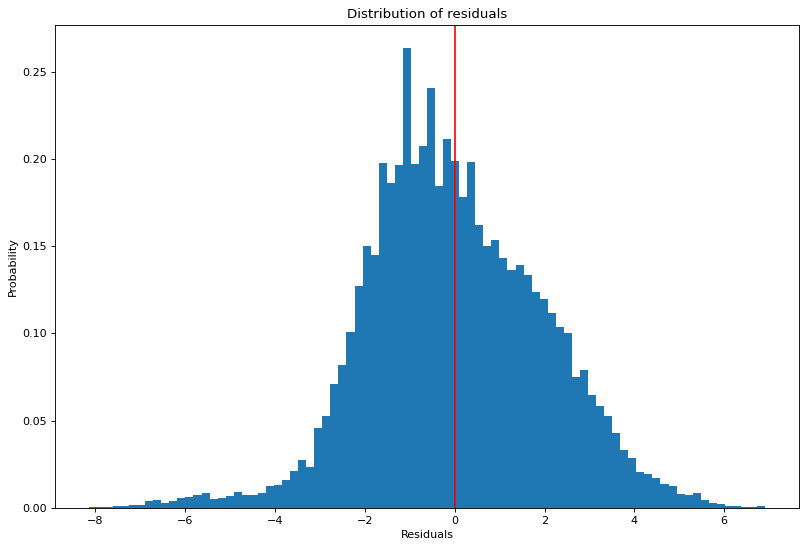

In [ ]:
# distribution of risiduals
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
res = result.resid
plt.hist(res, bins='fd', density=True)
plt.title('Distribution of residuals')
plt.xlabel('Residuals')
plt.ylabel('Probability')
plt.axvline(x=np.mean(res), color='red')
plt.show()

### QQ-Plot

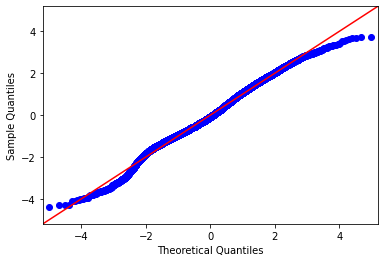

In [ ]:
import scipy.stats as stats
res = result.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()

In [ ]:
# the mean and variance of the residuals
res.mean(), res.var()

(4.101263121987464e-15, 3.8678433864929223)

#### Comment

**Residuals terms are normally distributed with nearly 0 mean.**

### Residuals-vs-Fits Plot

Text(0, 0.5, 'Residuals')

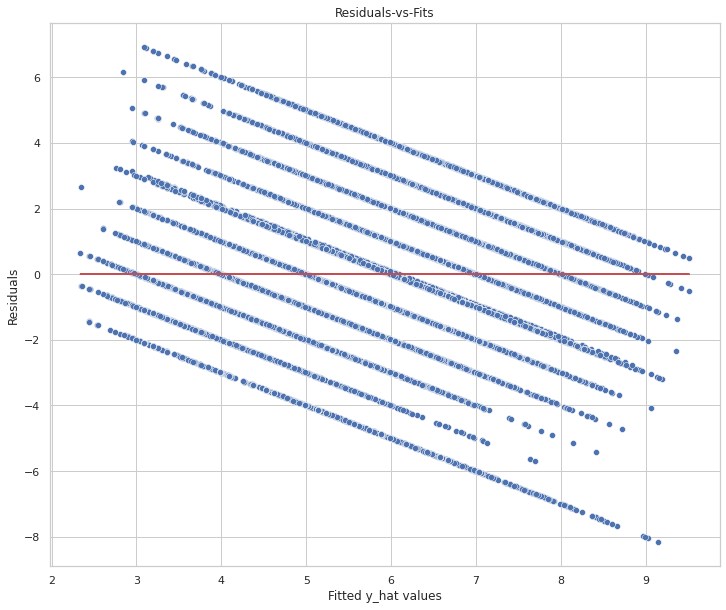

In [ ]:
#risidual distribution against fits
sns.set(rc={'figure.figsize':(12,10)}, style='whitegrid')
y_hat_fits = result.predict(X)
residuals = result.resid
sns.scatterplot(x=y_hat_fits,\
                    y=residuals)
plt.plot(y_hat_fits, np.zeros_like(result.resid), color='r')
plt.title('Residuals-vs-Fits')
plt.xlabel('Fitted y_hat values')
plt.ylabel('Residuals')

#### Comment

* It is shown that the residuals depart from 0 in some systematic manner since they are positive for small values and negative for high values. 
* This systematic (non-random) pattern is sufficient to suggest that the regression function is not linear.

### Risidual-vs-Orders Plot

Text(0, 0.5, 'Residuals')

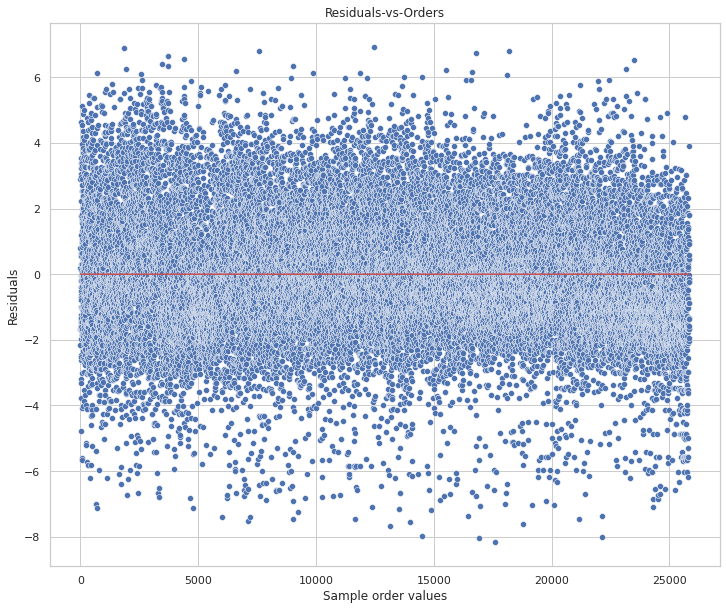

In [ ]:
#risidual distribution against orders


#sns.set(rc={'figure.figsize':(12,10)}, style='whitegrid')
sample_orders = X.index.values
residuals = result.resid
sns.scatterplot(x=sample_orders,\
                    y=residuals)
plt.plot(sample_orders, np.zeros_like(result.resid), color='r')

plt.title('Residuals-vs-Orders')

plt.xlabel('Sample order values')

plt.ylabel('Residuals')


#### Comment

* There is a uniform random variation pattern about the zero residuals line, then the error terms are independent and not correlated.

## Question Answering
1. Report your model’s coefficients and p-values.
2. Which of these variables are good predictors of the variabilities in the target?
Which are bad ones?
3. Are any of these predictors correlated with each other? Assess the quality of your
model.

### 1. Report your model’s coefficients and p-values.

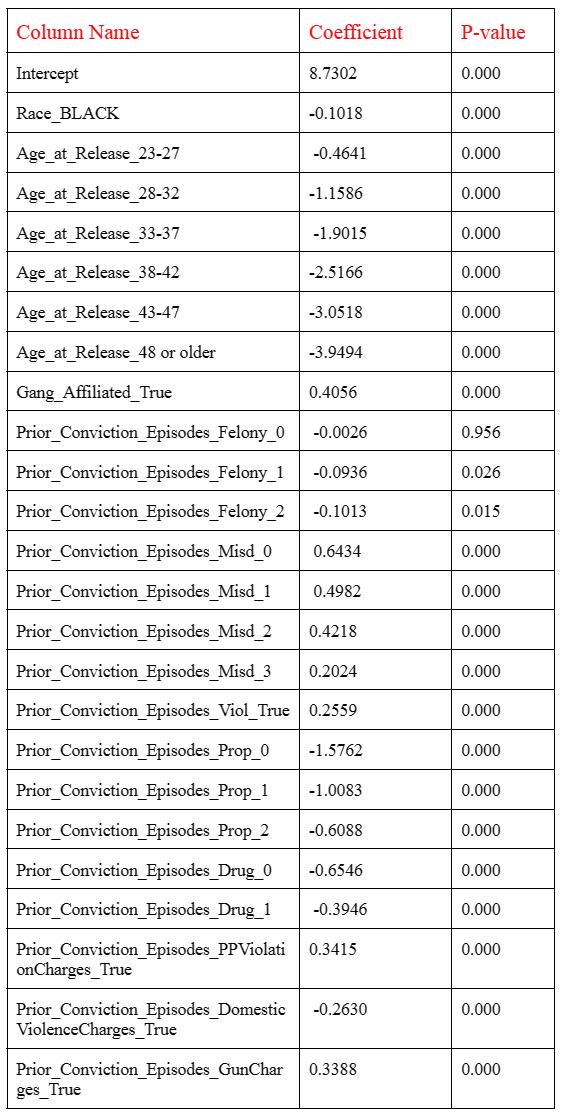

### 2. Which of these variables are good predictors of the variabilities in the target?

* **Variables that have p-value < 0.05 are considered as good predictors, while variables that have p-value > 0.05 are bad predictors.**


---


* Good Predictors: 
1. Intercept 
2. Race_BLACK 
3. Age_at_Release_23-27
4. Age_at_Release_28-32  
5. Age_at_Release_33-37  
6. Age_at_Release_38-42 
7. Age_at_Release_43-47  
8. Age_at_Release_48 or older
9. Gang_Affiliated_True 
10. Prior_Conviction_Episodes_Felony_1 
11. Prior_Conviction_Episodes_Felony_2 
12. Prior_Conviction_Episodes_Misd_0 
13. Prior_Conviction_Episodes_Misd_1
14. Prior_Conviction_Episodes_Misd_2
15. Prior_Conviction_Episodes_Misd_3
16. Prior_Conviction_Episodes_Viol_True 
17. Prior_Conviction_Episodes_Prop_0 
18. Prior_Conviction_Episodes_Prop_1
19. Prior_Conviction_Episodes_Prop_2
20. Prior_Conviction_Episodes_Drug_0 
21. Prior_Conviction_Episodes_Drug_1
22. Prior_Conviction_Episodes_PPViolationCharges_True 
23. Prior_Conviction_Episodes_DomesticViolenceCharges_True 
24. Prior_Conviction_Episodes_GunCharges_True 

---

* Bad Predictors:

1. Prior_Conviction_Episodes_Felony_0



### 3. Are any of these predictors correlated with each other? Assess the quality of your model

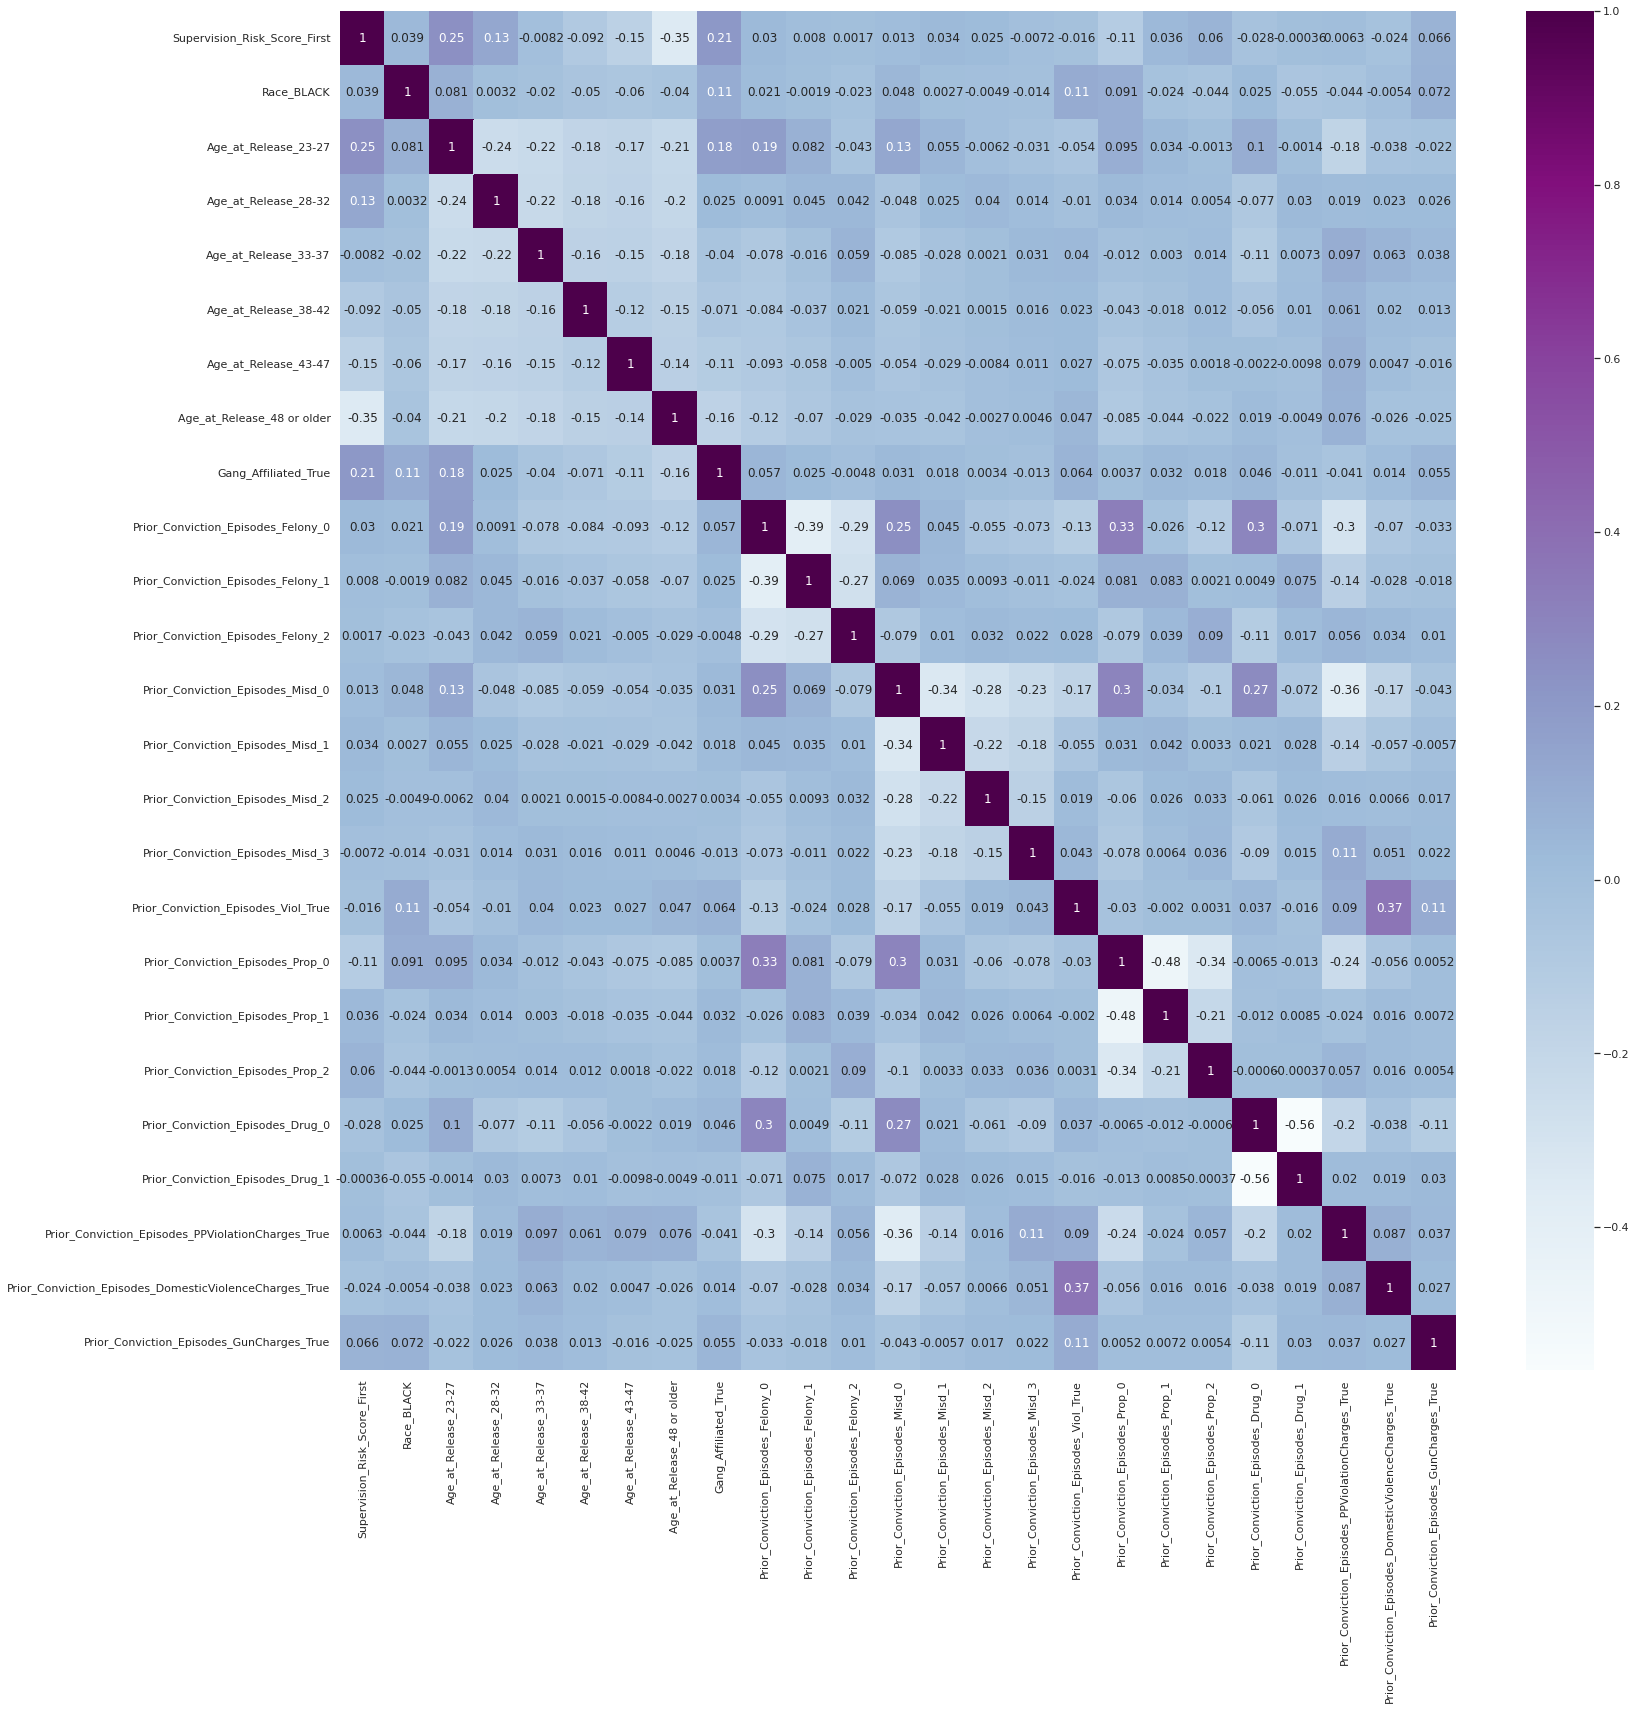

In [ ]:
corr = df_reg.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [ ]:
def print_highly_correlated(df, features, threshold=0.5):
  """Prints highly correlated features pairs in the data frame (helpful for feature engineering)"""
  corr_df = df[features].corr() # get correlations
  correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
  correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
  s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
  if s_corr_list == []:
    print("There are no highly correlated features with correlation above", threshold)
  else:
      for v, i, j in s_corr_list:
        cols = df[features].columns
        print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))

In [ ]:
features = df_reg.columns
print_highly_correlated(df_reg, features, threshold=0.5)

Prior_Conviction_Episodes_Drug_0 and Prior_Conviction_Episodes_Drug_1 = -0.564


# Part 6: Bonus Task

## Task Description
Train a machine/deep learning classifier to predict the likelihood of recidivism
within 3 years of release based on the state of Georgia recidivism records.

## Data Preprocessing 

In [ ]:
df.shape

(25835, 54)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 25835 non-null  int64  
 1   Gender                                             25835 non-null  object 
 2   Race                                               25835 non-null  object 
 3   Age_at_Release                                     25835 non-null  object 
 4   Residence_PUMA                                     25835 non-null  int64  
 5   Gang_Affiliated                                    22668 non-null  object 
 6   Supervision_Risk_Score_First                       25360 non-null  float64
 7   Supervision_Level_First                            24115 non-null  object 
 8   Education_Level                                    25835 non-null  object 
 9   Depend

In [ ]:
df_classifier = df.copy()

In [ ]:
# drop unnecessary columns
cols = ['ID', 'Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2',
       'Recidivism_Arrest_Year3']
df_classifier = df_classifier.drop(columns=cols, axis=1)
df_classifier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 50 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Gender                                             25835 non-null  object 
 1   Race                                               25835 non-null  object 
 2   Age_at_Release                                     25835 non-null  object 
 3   Residence_PUMA                                     25835 non-null  int64  
 4   Gang_Affiliated                                    22668 non-null  object 
 5   Supervision_Risk_Score_First                       25360 non-null  float64
 6   Supervision_Level_First                            24115 non-null  object 
 7   Education_Level                                    25835 non-null  object 
 8   Dependents                                         25835 non-null  object 
 9   Prison

In [ ]:
df_classifier.head(10)

Gender   Race Age_at_Release  Residence_PUMA Gang_Affiliated  \
0      M  BLACK          43-47              16           False   
1      M  BLACK          33-37              16           False   
2      M  BLACK    48 or older              24           False   
3      M  WHITE          38-42              16           False   
4      M  WHITE          33-37              16           False   
5      M  WHITE          38-42              17           False   
6      M  BLACK    48 or older              18           False   
7      M  BLACK          38-42              16           False   
8      F  BLACK          43-47               5             NaN   
9      M  BLACK          43-47              16           False   

   Supervision_Risk_Score_First Supervision_Level_First  \
0                           3.0                Standard   
1                           6.0             Specialized   
2                           7.0                    High   
3                           7.0                    High   
4                           4.0             Specialized   
5                           5.0                Standard   
6                           2.0                Standard   
7                           5.0                    High   
8                           7.0                    High   
9                           5.0                Standard   

         Education_Level Dependents   Prison_Offense  ...  \
0  At least some college  3 or more             Drug  ...   
1   Less than HS diploma          1  Violent/Non-Sex  ...   
2  At least some college  3 or more             Drug  ...   
3   Less than HS diploma          1         Property  ...   
4   Less than HS diploma  3 or more  Violent/Non-Sex  ...   
5    High School Diploma          0         Property  ...   
6   Less than HS diploma          2              NaN  ...   
7    High School Diploma  3 or more             Drug  ...   
8    High School Diploma          0             Drug  ...   
9    High School Diploma  3 or more         Property  ...   

  Avg_Days_per_DrugTest DrugTests_THC_Positive DrugTests_Cocaine_Positive  \
0            612.000000               0.000000                        0.0   
1             35.666667               0.000000                        0.0   
2             93.666667               0.333333                        0.0   
3             25.400000               0.000000                        0.0   
4             23.117647               0.000000                        0.0   
5            474.600000               0.000000                        0.0   
6            238.500000               0.000000                        0.0   
7             34.775000               0.000000                        0.0   
8                   NaN                    NaN                        NaN   
9             27.800000               0.000000                        0.0   

  DrugTests_Meth_Positive DrugTests_Other_Positive Percent_Days_Employed  \
0                0.000000                      0.0              0.488562   
1                0.000000                      0.0              0.425234   
2                0.166667                      0.0              0.000000   
3                0.000000                      0.0              1.000000   
4                0.058824                      0.0              0.203562   
5                0.000000                      0.0              0.674252   
6                0.000000                      0.0              0.000000   
7                0.000000                      0.0              0.469446   
8                     NaN                      NaN              0.000000   
9                0.000000                      0.0              0.359712   

  Jobs_Per_Year  Employment_Exempt  Recidivism_Within_3years Training_Sample  
0      0.447610              False                     False               1  
1      2.000000              False                      True               1  
2      0.000000              Fa

In [ ]:
df_classifier.shape

(25835, 50)

### Checking null values

In [ ]:
df_classifier.isna().sum()

Gender                                                  0
Race                                                    0
Age_at_Release                                          0
Residence_PUMA                                          0
Gang_Affiliated                                      3167
Supervision_Risk_Score_First                          475
Supervision_Level_First                              1720
Education_Level                                         0
Dependents                                              0
Prison_Offense                                       3277
Prison_Years                                            0
Prior_Arrest_Episodes_Felony                            0
Prior_Arrest_Episodes_Misd                              0
Prior_Arrest_Episodes_Violent                           0
Prior_Arrest_Episodes_Property                          0
Prior_Arrest_Episodes_Drug                              0
Prior_Arrest_Episodes_PPViolationCharges                0
Prior_Arrest_E

In [ ]:
# fill the missing values for categorical terms - mode
df_classifier['Gang_Affiliated'] = df_classifier["Gang_Affiliated"].fillna(df_classifier['Gang_Affiliated'].mode()[0])
df_classifier['Supervision_Level_First'] = df_classifier["Supervision_Level_First"].fillna(df_classifier['Supervision_Level_First'].mode()[0])
df_classifier['Prison_Offense'] = df_classifier["Prison_Offense"].fillna(df_classifier['Prison_Offense'].mode()[0])

In [ ]:
# fill the missing values for numerical terms - mean
df_classifier['Supervision_Risk_Score_First'] = df_classifier['Supervision_Risk_Score_First'].fillna(df_classifier['Supervision_Risk_Score_First'].mean())
df_classifier['Avg_Days_per_DrugTest'] = df_classifier['Avg_Days_per_DrugTest'].fillna(df_classifier['Avg_Days_per_DrugTest'].mean())
df_classifier['DrugTests_THC_Positive'] = df_classifier['DrugTests_THC_Positive'].fillna(df_classifier['DrugTests_THC_Positive'].mean())

df_classifier['DrugTests_Cocaine_Positive'] = df_classifier['DrugTests_Cocaine_Positive'].fillna(df_classifier['DrugTests_Cocaine_Positive'].mean())
df_classifier['DrugTests_Meth_Positive'] = df_classifier['DrugTests_Meth_Positive'].fillna(df_classifier['DrugTests_Meth_Positive'].mean())
df_classifier['DrugTests_Other_Positive'] = df_classifier['DrugTests_Other_Positive'].fillna(df_classifier['DrugTests_Other_Positive'].mean())

df_classifier['Percent_Days_Employed'] = df_classifier['Percent_Days_Employed'].fillna(df_classifier['Percent_Days_Employed'].mean())
df_classifier['Jobs_Per_Year'] = df_classifier['Jobs_Per_Year'].fillna(df_classifier['Jobs_Per_Year'].mean())

In [ ]:
df_classifier.isna().sum()

Gender                                               0
Race                                                 0
Age_at_Release                                       0
Residence_PUMA                                       0
Gang_Affiliated                                      0
Supervision_Risk_Score_First                         0
Supervision_Level_First                              0
Education_Level                                      0
Dependents                                           0
Prison_Offense                                       0
Prison_Years                                         0
Prior_Arrest_Episodes_Felony                         0
Prior_Arrest_Episodes_Misd                           0
Prior_Arrest_Episodes_Violent                        0
Prior_Arrest_Episodes_Property                       0
Prior_Arrest_Episodes_Drug                           0
Prior_Arrest_Episodes_PPViolationCharges             0
Prior_Arrest_Episodes_DVCharges                      0
Prior_Arre

In [ ]:
df_classifier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 50 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Gender                                             25835 non-null  object 
 1   Race                                               25835 non-null  object 
 2   Age_at_Release                                     25835 non-null  object 
 3   Residence_PUMA                                     25835 non-null  int64  
 4   Gang_Affiliated                                    25835 non-null  bool   
 5   Supervision_Risk_Score_First                       25835 non-null  float64
 6   Supervision_Level_First                            25835 non-null  object 
 7   Education_Level                                    25835 non-null  object 
 8   Dependents                                         25835 non-null  object 
 9   Prison

In [ ]:
df_classifier.shape

(25835, 50)

### Ordinal Encoding

In [ ]:
ord_enc = OrdinalEncoder()
for i in df_classifier.columns:
  if df_classifier[i].dtype == 'object':
    df_classifier[i+'_E'] = ord_enc.fit_transform(df_classifier[[i]])
    df_classifier = df_classifier.drop(i,axis = 1)

In [ ]:
ord_enc = OrdinalEncoder()
for i in df_classifier.columns:
  if df_classifier[i].dtype == 'bool':
    df_classifier[i+'_E'] = ord_enc.fit_transform(df_classifier[[i]])
    df_classifier = df_classifier.drop(i,axis = 1)

In [ ]:
df_classifier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 50 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Residence_PUMA                                       25835 non-null  int64  
 1   Supervision_Risk_Score_First                         25835 non-null  float64
 2   Avg_Days_per_DrugTest                                25835 non-null  float64
 3   DrugTests_THC_Positive                               25835 non-null  float64
 4   DrugTests_Cocaine_Positive                           25835 non-null  float64
 5   DrugTests_Meth_Positive                              25835 non-null  float64
 6   DrugTests_Other_Positive                             25835 non-null  float64
 7   Percent_Days_Employed                                25835 non-null  float64
 8   Jobs_Per_Year                                        25835 non-nul

In [ ]:
df_classifier.columns

Index(['Residence_PUMA', 'Supervision_Risk_Score_First',
       'Avg_Days_per_DrugTest', 'DrugTests_THC_Positive',
       'DrugTests_Cocaine_Positive', 'DrugTests_Meth_Positive',
       'DrugTests_Other_Positive', 'Percent_Days_Employed', 'Jobs_Per_Year',
       'Training_Sample', 'Gender_E', 'Race_E', 'Age_at_Release_E',
       'Supervision_Level_First_E', 'Education_Level_E', 'Dependents_E',
       'Prison_Offense_E', 'Prison_Years_E', 'Prior_Arrest_Episodes_Felony_E',
       'Prior_Arrest_Episodes_Misd_E', 'Prior_Arrest_Episodes_Violent_E',
       'Prior_Arrest_Episodes_Property_E', 'Prior_Arrest_Episodes_Drug_E',
       'Prior_Arrest_Episodes_PPViolationCharges_E',
       'Prior_Conviction_Episodes_Felony_E',
       'Prior_Conviction_Episodes_Misd_E', 'Prior_Conviction_Episodes_Prop_E',
       'Prior_Conviction_Episodes_Drug_E', 'Delinquency_Reports_E',
       'Program_Attendances_E', 'Program_UnexcusedAbsences_E',
       'Residence_Changes_E', 'Gang_Affiliated_E',
       'Prior_Ar

In [ ]:
df_classifier.shape

(25835, 50)

## Train-Test Split

In [ ]:
df_classifier['Training_Sample'].value_counts()

1    18028
0     7807
Name: Training_Sample, dtype: int64

In [ ]:
df_train = df_classifier[df_classifier['Training_Sample'] == 1]
df_test = df_classifier[df_classifier['Training_Sample'] == 0];
df_train.drop(columns=['Training_Sample'], axis=1)
df_test.drop(columns=['Training_Sample'], axis=1)

Residence_PUMA  Supervision_Risk_Score_First  Avg_Days_per_DrugTest  \
5                  17                           5.0             474.600000   
7                  16                           5.0              34.775000   
11                 16                           5.0               8.040000   
14                  5                           7.0              98.750000   
15                  3                           4.0              74.500000   
...               ...                           ...                    ...   
25820               6                           5.0              20.121951   
25821               8                           5.0             130.000000   
25823               2                           5.0              61.866667   
25826               7                           5.0              92.000000   
25829               5                           5.0              93.890044   

       DrugTests_THC_Positive  DrugTests_Cocaine_Positive  \
5                    0.000000                     0.00000   
7                    0.000000                     0.00000   
11                   0.040000                     0.00000   
14                   0.000000                     0.00000   
15                   0.000000                     0.00000   
...                       ...                         ...   
25820                0.170732                     0.04878   
25821                0.000000                     0.00000   
25823                0.000000                     0.00000   
25826                0.000000                     0.00000   
25829                0.000000                     0.00000   

       DrugTests_Meth_Positive  DrugTests_Other_Positive  \
5                         0.00                  0.000000   
7                         0.00                  0.000000   
11                        0.08                  0.000000   
14                        0.00                  0.000000   
15                        0.00                  0.000000   
...                        ...                       ...   
25820                     0.00                  0.000000   
25821                     0.00                  0.000000   
25823                     0.00                  0.000000   
25826                     0.00                  0.166667   
25829                     0.00                  0.000000   

       Percent_Days_Employed  Jobs_Per_Year  Gender_E  ...  \
5                   0.674252       0.307838       1.0  ...   
7                   0.469446       0.525162       1.0  ...   
11                  0.000000       0.000000       1.0  ...   
14                  0.000000       0.000000       1.0  ...   
15                  0.338926       0.612836       1.0  ...   
...                      ...            ...       ...  ...   
25820               0.000000       0.000000       1.0  ...   
25821               0.381538       1.123846       1.0  ...   
25823               0.335129       1.180765       1.0  ...   
25826               0.757246       0.661685       1.0  ...   
25829               0.000000       0.769295       1.0  ...   

       Prior_Revocations_Probation_E  Condition_MH_SA_E  Condition_Cog_Ed_E  \
5                                0.0                0.0                 0.0   
7                                0.0                0.0                 1.0   
11                               1.0                1.0                 1.0   
14                               0.0                1.0                 1.0   
15                               0.0                1.0                 1.0   
...                              ...                ...                 ...   
25820                            0.0                0.0                 0.0   
25821                            0.0                0.0                 0.0   
25823                            0.0                0.0                 0.0   
25826                            0.0                0.0                 0.0   
25

In [ ]:
df_train.shape

(18028, 50)

In [ ]:
df_test.shape

(7807, 50)

In [ ]:
# specify input and output attributes
y_train = df_train['Recidivism_Within_3years_E']
X_train = df_train.drop(columns=['Recidivism_Within_3years_E'], axis=1)

y_test = df_test['Recidivism_Within_3years_E']
X_test = df_test.drop(columns=['Recidivism_Within_3years_E'], axis=1)

In [ ]:
X_train.shape

(18028, 49)

In [ ]:
y_train.shape

(18028,)

In [ ]:
X_test.shape

(7807, 49)

In [ ]:
y_test.shape

(7807,)

## Model Training

In [ ]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

### 1) Logistic Regression:

Evaluation of Logistic Regression Model
Accuracy: 0.70629
Precision: 0.70498
Recall: 0.84006
F1-score: 0.76662


Text(0.5, 66.5, 'Predicted Label')

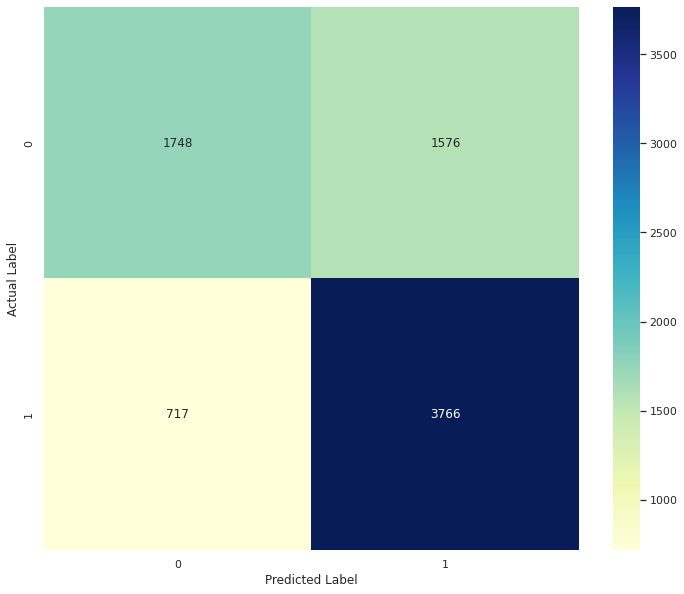

In [ ]:
LR1 = LogisticRegression(solver = 'liblinear', max_iter= 1000)
LR1.fit(X_train,y_train)
y_pred_LR = LR1.predict(X_test)
LR_cnf_matrix = confusion_matrix(y_test, y_pred_LR)
print('Evaluation of Logistic Regression Model')
metrics(y_test, y_pred_LR.round())
sns.heatmap(pd.DataFrame(LR_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### 2) Logistic Regression with Feature Selection: RFE

In [ ]:
LR = LogisticRegression(solver = 'liblinear', max_iter= 1000)
rfe = RFE(estimator= LR, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
selected_features= list(X_train.columns[rfe.support_])

# summarize the selection of the attributes
print(selected_features)

['DrugTests_THC_Positive', 'DrugTests_Cocaine_Positive', 'DrugTests_Meth_Positive', 'DrugTests_Other_Positive', 'Percent_Days_Employed', 'Jobs_Per_Year', 'Gender_E', 'Age_at_Release_E', 'Prior_Arrest_Episodes_Property_E', 'Prior_Arrest_Episodes_PPViolationCharges_E', 'Gang_Affiliated_E', 'Prior_Arrest_Episodes_DVCharges_E', 'Prior_Revocations_Parole_E', 'Condition_MH_SA_E', 'Violations_Instruction_E']


In [ ]:
#split data based on the choosen features
X_train_RFE = X_train[selected_features]
X_test_RFE = X_test[selected_features]
y_train_RFE = y_train
y_test_RFE = y_test

Evaluation of Logistic Regression with Selected Features
Accuracy: 0.70475
Precision: 0.71797
Recall: 0.80013
F1-score: 0.75683


Text(0.5, 66.5, 'Predicted Label')

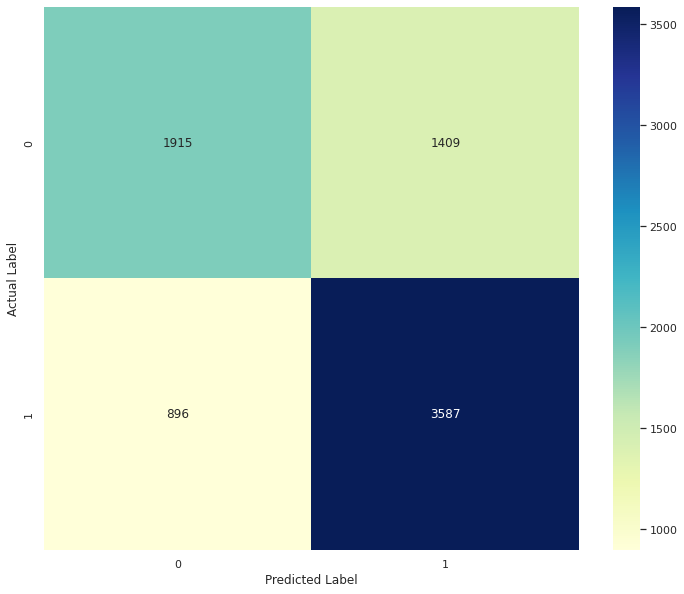

In [ ]:
#test
LR.fit(X_train_RFE,y_train_RFE)
y_pred_LR = LR.predict(X_test_RFE)
LR_cnf_matrix = confusion_matrix(y_test_RFE, y_pred_LR)
print('Evaluation of Logistic Regression with Selected Features')
metrics(y_test_RFE, y_pred_LR.round())
sns.heatmap(pd.DataFrame(LR_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


*   **Logistic Regression Model even after Feature Selection didn't perform well on the imbalanced dataset.**



### 3) Random Forest

Evaluation of Random Forest Model
Accuracy: 0.73344
Precision: 0.73726
Recall: 0.83248
F1-score: 0.78198


Text(0.5, 66.5, 'Predicted Label')

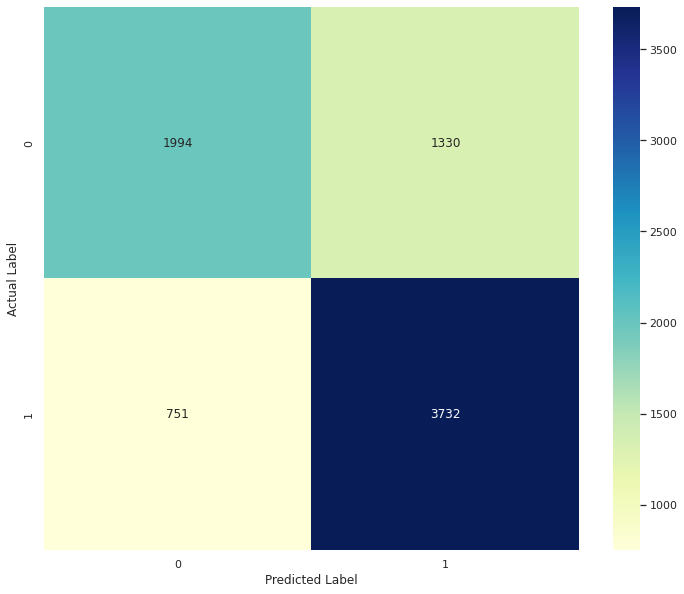

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_cnf_matrix = confusion_matrix(y_test, y_pred)
print('Evaluation of Random Forest Model')
metrics(y_test, y_pred.round())
rf_f1_score = f1_score(y_test, y_pred)
sns.heatmap(pd.DataFrame(rf_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### 4) AdaBoost

Evaluation of Adaptive Boosting Classifier
Accuracy: 0.73344
Precision: 0.74331
Recall: 0.81843
F1-score: 0.77906


Text(0.5, 66.5, 'Predicted Label')

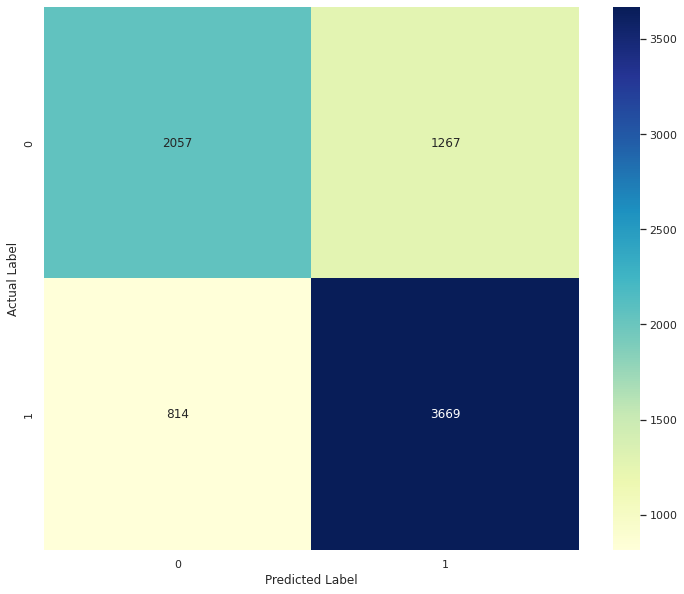

In [ ]:
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
adabc.fit(X_train, y_train)
y_pred = adabc.predict(X_test)
rf_cnf_matrix = confusion_matrix(y_test, y_pred)
print('Evaluation of Adaptive Boosting Classifier')
metrics(y_test, y_pred.round())
rf_f1_score = f1_score(y_test, y_pred)
sns.heatmap(pd.DataFrame(rf_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### 5) Bagging

Evaluation of Bootstrap Aggregating Classifier
Accuracy: 0.73857
Precision: 0.74207
Recall: 0.83493
F1-score: 0.78577


Text(0.5, 66.5, 'Predicted Label')

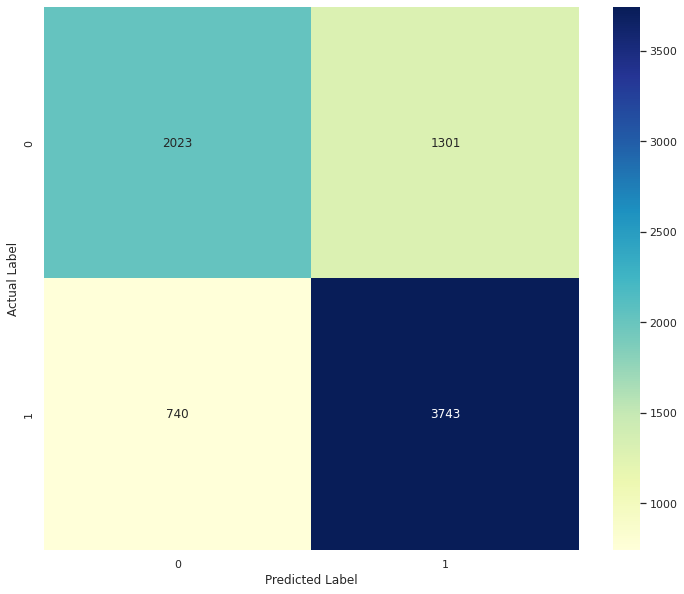

In [ ]:
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier
bgc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500)
bgc.fit(X_train, y_train)
y_pred = bgc.predict(X_test)
rf_cnf_matrix = confusion_matrix(y_test, y_pred)
print('Evaluation of Bootstrap Aggregating Classifier')
metrics(y_test, y_pred.round())
rf_f1_score = f1_score(y_test, y_pred)
sns.heatmap(pd.DataFrame(rf_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
